In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from PIL import Image
from resizeimage import resizeimage
import glob
import statistics
import datetime
import cv2

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns

In [34]:
face_cascade = cv2.CascadeClassifier('E://Techi//Masters in Data Science//Courses//Social Media & Buessines Analytics//Supports//haarcascade_frontalface_default.xml')
PATH="D:\\Instagram\\" 
os.chdir(PATH)

In [35]:
PATH="D:\\Instagram\\instagram-data\\" 
survey=pd.read_csv("D:\\Instagram\\User_Category.csv")

([<matplotlib.axis.XTick at 0x13dd4cf8>,
 <a list of 5 Text xticklabel objects>)

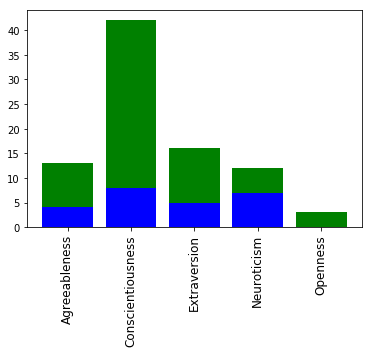

In [36]:
#User & Categories
Category_group_Name=[]
Category_group_Yes=[]
Category_group_No=[]

for category,group_data in survey.groupby(["Category"]) :
    Category_group_Name.append(category)
    Category_group_Yes.append(len(group_data[group_data.JSON_Available=="Yes"]))
    Category_group_No.append(len(group_data[group_data.JSON_Available=="No"]))

Category_group=pd.DataFrame({"Name":Category_group_Name,"Yes":Category_group_Yes,"No":Category_group_No })
Category_group.index=Category_group.Name

plt.bar(Category_group.Name, Category_group.No, color='b')
plt.bar(Category_group.Name, Category_group.Yes,bottom=Category_group.No, color='g')
plt.xticks(Category_group.Name, Category_group.Name, fontsize=12, rotation=90)

In [37]:
#Files in each Users
PATH="D:\\Instagram\\instagram-data\\" 
#os.chdir(PATH)
Username=[]
Jpeg=[]
Mp4=[]
Json=[]
Others=[]
for i in os.listdir(PATH):
    file=PATH+i+"\\"
    if(os.path.isdir(file)):
        Username.append(i)
        jpg=0
        mp=0
        jsn=0
        other=0
        for j in os.listdir(file):
            types=os.path.splitext(file+j)[1]
            if(types==".jpg") :
                jpg+=1
            elif(types==".mp4") :
                mp+=1
            elif(types==".json") :
                jsn+=1
            else :
                other+=1
        Jpeg.append(jpg)
        Mp4.append(mp)
        Json.append(jsn)
        Others.append(other)

Insta_file=pd.DataFrame({"Name":Username, "Jpeg":Jpeg,"Mp4":Mp4,"Json":Json,"Others":Others})
Insta_file.index=Insta_file.Name

<BarContainer object of 91 artists>

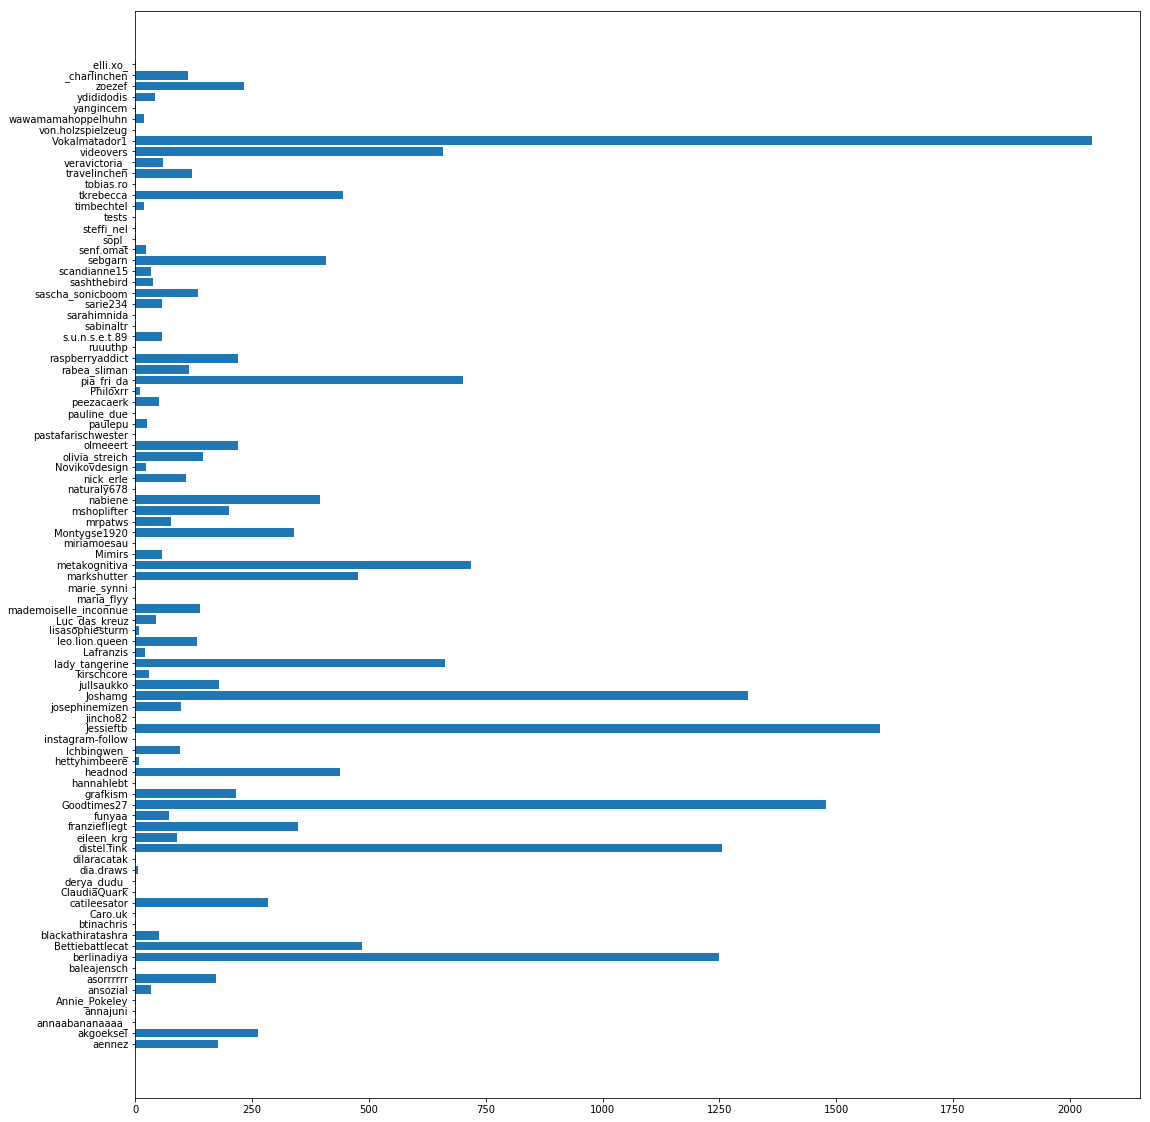

In [38]:
fig, ax = plt.subplots(figsize=(18,20))
ax.barh(Insta_file.Name,Insta_file.Jpeg)
#plt.yticks(Insta_file.Name, Insta_file.Name, fontsize=9)

In [39]:
Whole_Merged=pd.merge(survey,Insta_file,  left_on='User',right_index=True, how='inner')
MergedData=Whole_Merged[['User','Category','JSON_Available']].copy()
MergedData=MergedData.rename(columns={'JSON_Available':'Avaliblity_Description'})
MergedData.index=MergedData.User
MergedData['Path']=PATH+MergedData.User+"\\"


In [66]:
UserName=[]
ImageName=[]
RedPixels=[]
OrangePixels=[]
YellowPixels=[]
GreenPixels=[]
CyanPixels=[]
BluePixels=[]
VioletPixels=[]
SaturationMean=[]
SaturationStd=[]
SaturationMin=[]
SaturationMedian=[]
SaturationMax=[]
ValueMean=[]
ValueStd=[]
ValueMin=[]
ValueMedian=[]
ValueMax=[]
Faces=[]

print(datetime.datetime.now().time())
q=0
for Names in MergedData['User'] :
    x=MergedData.loc[Names].Path
    JPG_PATH=x+'*.jpg'
    files = glob.glob(str(JPG_PATH))
    
    for myFile in files:
        print(myFile)
        try:
            UserName.append(Names)
            ImageName.append(os.path.basename(myFile))
            image = np.array(myFile)
            img = Image.open(myFile)
            img = resizeimage.resize_cover(img, [640, 640],validate=False)
            image = np.array(img) 
            colors.rgb_to_hsv(image)
            img_hsv = colors.rgb_to_hsv(image)
            lu1=img_hsv[...,0].flatten() #Hue - lu1*360
            lu2=img_hsv[...,1].flatten() #Saturation
            lu3=img_hsv[...,2].flatten() #Intensity - lu3*255

            lu=lu1*360
            #Red=len(lu[np.where((lu <= 25) | (lu >= 284))])
            #Orange=len(lu[np.where((lu >= 26) & (lu <= 50))])
            #Yellow=len(lu[np.where((lu >= 50) & (lu <= 70))])
            #Green=len(lu[np.where((lu >= 70) & (lu <= 150))])
            #Cyan=len(lu[np.where((lu >= 150) & (lu <= 190))])
            #Blue=len(lu[np.where((lu >= 190) & (lu <= 265))])
            #Violet=len(lu[np.where((lu >= 265) & (lu <= 285))])

            
            Red=len(lu[np.where((lu <= 60) & (lu >= 0))])
            Yellow=len(lu[np.where((lu >= 60) & (lu <= 120))])
            Orange=len(lu[np.where((lu >= 26) & (lu <= 50))])
            Green=len(lu[np.where((lu >= 120) & (lu <= 180))])
            Cyan=len(lu[np.where((lu >= 180) & (lu <= 240))])
            Blue=len(lu[np.where((lu >= 240) & (lu <= 300))])
            Violet=len(lu[np.where((lu >= 265) & (lu <= 285))])
            
            
            image = cv2.imread(myFile)
            grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(grayImage)

            RedPixels.append(Red)
            OrangePixels.append(Orange)
            YellowPixels.append(Yellow)
            GreenPixels.append(Green)
            CyanPixels.append(Cyan)
            BluePixels.append(Blue)
            VioletPixels.append(Violet)

            SaturationMean.append(np.mean(lu2))
            SaturationStd.append(np.std(lu2))
            SaturationMin.append(np.min(lu2))
            SaturationMedian.append(np.median(lu2))
            SaturationMax.append(np.max(lu2))

            ValueMean.append(np.mean(lu3))
            ValueStd.append(np.std(lu3))
            ValueMin.append(np.min(lu3))
            ValueMedian.append(np.median(lu3))
            ValueMax.append(np.max(lu3))
            Faces.append(len(face))

            print("Time "+str(datetime.datetime.now().time())+" Image Number "+str(q))
            q+=1
        except :
            print("Common Error Occured")

01:21:09.056055
D:\Instagram\instagram-data\_charlinchen\12725004_570419216449742_1656903129_n.jpg
Time 01:21:12.361244 Image Number 0
D:\Instagram\instagram-data\_charlinchen\13113847_130479290698381_1776867606_n.jpg
Time 01:21:15.464422 Image Number 1
D:\Instagram\instagram-data\_charlinchen\13557072_1027788170590081_1914726552_n.jpg
Time 01:21:17.698550 Image Number 2
D:\Instagram\instagram-data\_charlinchen\13704152_919225211533717_29553631_n.jpg
Time 01:21:19.144632 Image Number 3
D:\Instagram\instagram-data\_charlinchen\14597342_692150550933917_9034637687671226368_n.jpg
Time 01:21:20.378703 Image Number 4
D:\Instagram\instagram-data\_charlinchen\14733521_1193009210773903_3892407106631892992_n.jpg
Time 01:21:22.118802 Image Number 5
D:\Instagram\instagram-data\_charlinchen\15258733_545331439007834_4682657196192825344_n.jpg
Time 01:21:22.687835 Image Number 6
D:\Instagram\instagram-data\_charlinchen\17076024_1313121098733816_957356082953453568_n.jpg
Time 01:21:23.801899 Image Numbe

Time 01:22:21.190415 Image Number 63
D:\Instagram\instagram-data\_charlinchen\40752635_686092568456934_3551015810398603791_n.jpg
Time 01:22:21.893619 Image Number 64
D:\Instagram\instagram-data\_charlinchen\40825998_274914883137482_1917428720679273035_n.jpg
Time 01:22:22.844621 Image Number 65
D:\Instagram\instagram-data\_charlinchen\40831426_312326382909802_8178694861196699465_n.jpg
Time 01:22:23.529423 Image Number 66
D:\Instagram\instagram-data\_charlinchen\40851278_137218080554650_6375622765533579415_n.jpg
Time 01:22:24.368626 Image Number 67
D:\Instagram\instagram-data\_charlinchen\40970292_240725999947634_6267531717192617957_n.jpg
Time 01:22:25.278428 Image Number 68
D:\Instagram\instagram-data\_charlinchen\41263120_287108422016149_8362388755149262902_n.jpg
Time 01:22:26.024630 Image Number 69
D:\Instagram\instagram-data\_charlinchen\41410541_533524987100589_1770403008380043940_n.jpg
Time 01:22:26.650032 Image Number 70
D:\Instagram\instagram-data\_charlinchen\41529838_3431078229

Time 01:23:20.278905 Image Number 128
D:\Instagram\instagram-data\aennez\10547359_317601921753800_687501635_n.jpg
Time 01:23:20.762907 Image Number 129
D:\Instagram\instagram-data\aennez\10554191_802362116475332_184924772_n.jpg
Time 01:23:21.355109 Image Number 130
D:\Instagram\instagram-data\aennez\10560959_752532714785267_24169817_n.jpg
Time 01:23:21.907110 Image Number 131
D:\Instagram\instagram-data\aennez\10607882_1504999689744072_1442981767_n.jpg
Time 01:23:22.585912 Image Number 132
D:\Instagram\instagram-data\aennez\10665641_297415077126018_662067377_n.jpg
Time 01:23:23.156914 Image Number 133
D:\Instagram\instagram-data\aennez\10693228_259018277555159_1607802670_n.jpg
Time 01:23:23.809331 Image Number 134
D:\Instagram\instagram-data\aennez\10693583_648456368606319_1623056515_n.jpg
Time 01:23:24.451333 Image Number 135
D:\Instagram\instagram-data\aennez\10693798_723443321078198_978791725_n.jpg
Time 01:23:24.866335 Image Number 136
D:\Instagram\instagram-data\aennez\10748519_388

Time 01:24:13.262560 Image Number 199
D:\Instagram\instagram-data\aennez\15802160_237836373309251_9198411800054333440_n.jpg
Time 01:24:14.233163 Image Number 200
D:\Instagram\instagram-data\aennez\15877007_1856246604590352_4594696081287151616_n.jpg
Time 01:24:15.200766 Image Number 201
D:\Instagram\instagram-data\aennez\1598633_747771741907722_227025150_n.jpg
Time 01:24:15.714373 Image Number 202
D:\Instagram\instagram-data\aennez\16122486_996310940503825_1994779483109851136_n.jpg
Time 01:24:16.340374 Image Number 203
D:\Instagram\instagram-data\aennez\16228938_1888832758018026_7251694319541682176_n.jpg
Time 01:24:17.504776 Image Number 204
D:\Instagram\instagram-data\aennez\1661498_192343734309419_1157085899_n.jpg
Time 01:24:18.045178 Image Number 205
D:\Instagram\instagram-data\aennez\17268295_249360838806880_3051810671692873728_n.jpg
Time 01:24:18.697784 Image Number 206
D:\Instagram\instagram-data\aennez\1740224_423313031138494_1613616196_n.jpg
Time 01:24:19.357386 Image Number 207

Time 01:25:14.369416 Image Number 266
D:\Instagram\instagram-data\aennez\37780598_210746392934117_5720780323831152640_n.jpg
Time 01:25:15.273618 Image Number 267
D:\Instagram\instagram-data\aennez\38072715_250255925601216_4668129104241885184_n.jpg
Time 01:25:16.299021 Image Number 268
D:\Instagram\instagram-data\aennez\38931426_2225958824315159_8276547162171506688_n.jpg
Time 01:25:17.175024 Image Number 269
D:\Instagram\instagram-data\aennez\39052462_1789204281156608_7498622013842391040_n.jpg
Time 01:25:18.416427 Image Number 270
D:\Instagram\instagram-data\aennez\39339409_1811127355607833_4249132324140089344_n.jpg
Time 01:25:18.901829 Image Number 271
D:\Instagram\instagram-data\aennez\39850954_663292144055842_7836512833389985792_n.jpg
Time 01:25:19.494031 Image Number 272
D:\Instagram\instagram-data\aennez\41499854_2267786173452271_4249114641759731712_n.jpg
Time 01:25:20.623233 Image Number 273
D:\Instagram\instagram-data\aennez\42915841_361654434662491_6117322830225866752_n.jpg
Time

Time 01:26:03.979051 Image Number 335
D:\Instagram\instagram-data\akgoeksel\11283381_103650866638622_433372534_n.jpg
Time 01:26:04.643058 Image Number 336
D:\Instagram\instagram-data\akgoeksel\11311144_1056909851005301_1046852939_n.jpg
Time 01:26:05.124060 Image Number 337
D:\Instagram\instagram-data\akgoeksel\11311267_1438043776513869_1066668540_n.jpg
Time 01:26:05.672665 Image Number 338
D:\Instagram\instagram-data\akgoeksel\11311521_410786119128039_369068002_n.jpg
Time 01:26:06.173266 Image Number 339
D:\Instagram\instagram-data\akgoeksel\11312309_1454360981527848_1719110404_n.jpg
Time 01:26:06.701473 Image Number 340
D:\Instagram\instagram-data\akgoeksel\11312494_1435459106772943_1660084452_n.jpg
Time 01:26:07.392276 Image Number 341
D:\Instagram\instagram-data\akgoeksel\11313505_809625809127243_1005612816_n.jpg
Time 01:26:08.122878 Image Number 342
D:\Instagram\instagram-data\akgoeksel\11313721_651406444992835_657507932_n.jpg
Time 01:26:08.716080 Image Number 343
D:\Instagram\inst

Time 01:26:55.936070 Image Number 405
D:\Instagram\instagram-data\akgoeksel\12338764_1087396007967101_1460749678_n.jpg
Time 01:26:56.492873 Image Number 406
D:\Instagram\instagram-data\akgoeksel\12362246_612118525603812_485129556_n.jpg
Time 01:26:56.917876 Image Number 407
D:\Instagram\instagram-data\akgoeksel\12393806_1111074288910360_235613201_n.jpg
Time 01:26:58.191478 Image Number 408
D:\Instagram\instagram-data\akgoeksel\12394105_795721090560988_1169758988_n.jpg
Time 01:26:58.744083 Image Number 409
D:\Instagram\instagram-data\akgoeksel\12519538_1148988558474042_913279770_n.jpg
Time 01:26:59.590287 Image Number 410
D:\Instagram\instagram-data\akgoeksel\12724950_1568549186771247_458249141_n.jpg
Time 01:27:00.139288 Image Number 411
D:\Instagram\instagram-data\akgoeksel\12724956_1708685756075120_1553025572_n.jpg
Time 01:27:01.049090 Image Number 412
D:\Instagram\instagram-data\akgoeksel\12724966_605489199598690_293519411_n.jpg
Time 01:27:01.947895 Image Number 413
D:\Instagram\insta

Time 01:27:56.457168 Image Number 473
D:\Instagram\instagram-data\akgoeksel\1662136_274802112676360_1859793056_n.jpg
Time 01:27:57.163971 Image Number 474
D:\Instagram\instagram-data\akgoeksel\16788496_1448671965205743_780318059293310976_n.jpg
Time 01:27:57.922173 Image Number 475
D:\Instagram\instagram-data\akgoeksel\1689340_229153210542388_1142845270_n.jpg
Time 01:27:58.474576 Image Number 476
D:\Instagram\instagram-data\akgoeksel\1689479_555162831271951_1762020383_n.jpg
Time 01:27:59.168977 Image Number 477
D:\Instagram\instagram-data\akgoeksel\16908928_262879820822396_2857574190230274048_n.jpg
Time 01:28:00.199980 Image Number 478
D:\Instagram\instagram-data\akgoeksel\17125649_610143432504633_3203415093027012608_n.jpg
Time 01:28:01.189782 Image Number 479
D:\Instagram\instagram-data\akgoeksel\17267384_1163488510430299_680231482911883264_n.jpg
Time 01:28:01.949584 Image Number 480
D:\Instagram\instagram-data\akgoeksel\1737227_724566510909507_1982461718_n.jpg
Time 01:28:02.694187 Ima

Time 01:28:55.381998 Image Number 538
D:\Instagram\instagram-data\akgoeksel\35132923_661930087479443_1149699493155831808_n.jpg
Time 01:28:56.135200 Image Number 539
D:\Instagram\instagram-data\akgoeksel\36772881_242095869950800_2014190570624253952_n.jpg
Time 01:28:57.287003 Image Number 540
D:\Instagram\instagram-data\akgoeksel\36993488_843877815821598_8574116158729355264_n.jpg
Time 01:28:58.352206 Image Number 541
D:\Instagram\instagram-data\akgoeksel\37352834_1920725517987348_1342896867410706432_n.jpg
Time 01:28:59.336809 Image Number 542
D:\Instagram\instagram-data\akgoeksel\37631470_828006750736549_4743378967082303488_n.jpg
Time 01:28:59.912812 Image Number 543
D:\Instagram\instagram-data\akgoeksel\42080502_1965447933519676_2514363398245208135_n.jpg
Time 01:29:01.133416 Image Number 544
D:\Instagram\instagram-data\akgoeksel\44442139_2162249007325291_8777486263668198473_n.jpg
Time 01:29:03.277620 Image Number 545
D:\Instagram\instagram-data\akgoeksel\914242_523477171077320_51848274_

Time 01:29:53.642277 Image Number 607
D:\Instagram\instagram-data\asorrrrrr\10467861_1108869072477098_1242568968_n.jpg
Time 01:29:54.604879 Image Number 608
D:\Instagram\instagram-data\asorrrrrr\10507878_313962155433283_39725549_n.jpg
Time 01:29:55.344081 Image Number 609
D:\Instagram\instagram-data\asorrrrrr\10525524_1437317089878457_1875187643_n.jpg
Time 01:29:55.943882 Image Number 610
D:\Instagram\instagram-data\asorrrrrr\10536882_820195288012253_1306201104_n.jpg
Time 01:29:56.511884 Image Number 611
D:\Instagram\instagram-data\asorrrrrr\10561042_314219705422881_1226569088_n.jpg
Time 01:29:56.925486 Image Number 612
D:\Instagram\instagram-data\asorrrrrr\10570187_1389122774669744_74777138_n.jpg
Time 01:29:57.364286 Image Number 613
D:\Instagram\instagram-data\asorrrrrr\10584678_885628411464459_2113167105_n.jpg
Time 01:29:58.118088 Image Number 614
D:\Instagram\instagram-data\asorrrrrr\10584718_478949372242452_2127475278_n.jpg
Time 01:29:58.578489 Image Number 615
D:\Instagram\instag

Time 01:30:36.149451 Image Number 677
D:\Instagram\instagram-data\asorrrrrr\11266450_555593254609938_1321704472_n.jpg
Time 01:30:37.241254 Image Number 678
D:\Instagram\instagram-data\asorrrrrr\11266555_1633703240185161_2059353245_n.jpg
Time 01:30:37.928259 Image Number 679
D:\Instagram\instagram-data\asorrrrrr\11280398_1401818403480204_1068981346_n.jpg
Time 01:30:38.445060 Image Number 680
D:\Instagram\instagram-data\asorrrrrr\11324941_1605076206383992_1077140763_n.jpg
Time 01:30:39.204862 Image Number 681
D:\Instagram\instagram-data\asorrrrrr\11333662_975053795868359_1120468631_n.jpg
Time 01:30:39.745065 Image Number 682
D:\Instagram\instagram-data\asorrrrrr\11372535_1473693712921958_931579659_n.jpg
Time 01:30:40.367467 Image Number 683
D:\Instagram\instagram-data\asorrrrrr\11374436_467249740102459_624141945_n.jpg
Time 01:30:41.945070 Image Number 684
D:\Instagram\instagram-data\asorrrrrr\11379200_849258728477455_824016633_n.jpg
Time 01:30:42.416274 Image Number 685
D:\Instagram\inst

Time 01:31:45.371506 Image Number 745
D:\Instagram\instagram-data\asorrrrrr\29403702_218590312223503_6368848884017397760_n.jpg
Time 01:31:46.951510 Image Number 746
D:\Instagram\instagram-data\asorrrrrr\29416523_1002634606557823_7961010161340907520_n.jpg
Time 01:31:48.526315 Image Number 747
D:\Instagram\instagram-data\asorrrrrr\29737436_356162688205045_374649460359168000_n.jpg
Time 01:31:49.493120 Image Number 748
D:\Instagram\instagram-data\asorrrrrr\29738260_2128486070500201_3637804808284405760_n.jpg
Time 01:31:50.294524 Image Number 749
D:\Instagram\instagram-data\asorrrrrr\30590915_137924197056650_6210341037194346496_n.jpg
Time 01:31:51.435339 Image Number 750
D:\Instagram\instagram-data\asorrrrrr\34074039_228110531118671_8898560659738853376_n.jpg
Time 01:31:52.126141 Image Number 751
D:\Instagram\instagram-data\asorrrrrr\36800153_481961388897042_1934940942180024320_n.jpg
Time 01:31:53.034551 Image Number 752
D:\Instagram\instagram-data\asorrrrrr\37269545_747132112344963_919239228

Time 01:32:34.198126 Image Number 813
D:\Instagram\instagram-data\berlinadiya\10424574_768932516490274_630472876_n.jpg
Time 01:32:34.823330 Image Number 814
D:\Instagram\instagram-data\berlinadiya\10431865_709838772413585_1584400073_n.jpg
Time 01:32:35.496532 Image Number 815
D:\Instagram\instagram-data\berlinadiya\10431935_1430273373913138_706107491_n.jpg
Time 01:32:36.065134 Image Number 816
D:\Instagram\instagram-data\berlinadiya\10432067_278389102333426_904038854_n.jpg
Time 01:32:36.558735 Image Number 817
D:\Instagram\instagram-data\berlinadiya\10448987_1420026004944718_737856569_n.jpg
Time 01:32:37.216936 Image Number 818
D:\Instagram\instagram-data\berlinadiya\10449031_1207337719280904_1950834574_n.jpg
Time 01:32:38.899942 Image Number 819
D:\Instagram\instagram-data\berlinadiya\10453729_673458346037250_1453084338_n.jpg
Time 01:32:39.561945 Image Number 820
D:\Instagram\instagram-data\berlinadiya\10453853_1432456797040576_1923059581_n.jpg
Time 01:32:40.420748 Image Number 821
D:

Time 01:33:18.735925 Image Number 882
D:\Instagram\instagram-data\berlinadiya\10598178_1464748110463697_1757512380_n.jpg
Time 01:33:19.409726 Image Number 883
D:\Instagram\instagram-data\berlinadiya\10598215_801429869894817_559001102_n.jpg
Time 01:33:20.105128 Image Number 884
D:\Instagram\instagram-data\berlinadiya\10598432_760712213987426_1351147748_n.jpg
Time 01:33:20.875530 Image Number 885
D:\Instagram\instagram-data\berlinadiya\10598580_336750683156981_1256271181_n.jpg
Time 01:33:21.448131 Image Number 886
D:\Instagram\instagram-data\berlinadiya\10601860_1461775127414572_2091686578_n.jpg
Time 01:33:21.993533 Image Number 887
D:\Instagram\instagram-data\berlinadiya\10601862_1462128850708166_1911476139_n.jpg
Time 01:33:22.543534 Image Number 888
D:\Instagram\instagram-data\berlinadiya\10601952_775361735854657_681050070_n.jpg
Time 01:33:23.253536 Image Number 889
D:\Instagram\instagram-data\berlinadiya\10607904_1450518998543412_1295586952_n.jpg
Time 01:33:23.903138 Image Number 890


Time 01:34:04.216143 Image Number 951
D:\Instagram\instagram-data\berlinadiya\10785141_906060429412540_588330447_n.jpg
Time 01:34:04.814346 Image Number 952
D:\Instagram\instagram-data\berlinadiya\10787812_304900663029643_133022561_n.jpg
Time 01:34:05.304947 Image Number 953
D:\Instagram\instagram-data\berlinadiya\10802446_750483545000414_84674379_n.jpg
Time 01:34:06.053149 Image Number 954
D:\Instagram\instagram-data\berlinadiya\10802610_577557995723730_1413773023_n.jpg
Time 01:34:06.524150 Image Number 955
D:\Instagram\instagram-data\berlinadiya\10808555_358661594305200_2062844293_n.jpg
Time 01:34:07.278952 Image Number 956
D:\Instagram\instagram-data\berlinadiya\10808921_749915731711813_1108160295_n.jpg
Time 01:34:07.816754 Image Number 957
D:\Instagram\instagram-data\berlinadiya\10809660_990056077681506_291500802_n.jpg
Time 01:34:08.325955 Image Number 958
D:\Instagram\instagram-data\berlinadiya\10809764_580742208692143_52524618_n.jpg
Time 01:34:08.816358 Image Number 959
D:\Instag

Time 01:34:47.048146 Image Number 1020
D:\Instagram\instagram-data\berlinadiya\11004984_1572645972978351_494977330_n.jpg
Time 01:34:47.580547 Image Number 1021
D:\Instagram\instagram-data\berlinadiya\11005078_393996764106501_1574317148_n.jpg
Time 01:34:48.076550 Image Number 1022
D:\Instagram\instagram-data\berlinadiya\11008009_1415860195384622_996665628_n.jpg
Time 01:34:48.598752 Image Number 1023
D:\Instagram\instagram-data\berlinadiya\11015490_420402651471458_876670881_n.jpg
Time 01:34:49.372154 Image Number 1024
D:\Instagram\instagram-data\berlinadiya\11018417_807674952651336_666981101_n.jpg
Time 01:34:50.108355 Image Number 1025
D:\Instagram\instagram-data\berlinadiya\11018560_620678434700273_1868065029_n.jpg
Time 01:34:50.806757 Image Number 1026
D:\Instagram\instagram-data\berlinadiya\11018568_1618104508425904_1209580023_n.jpg
Time 01:34:51.559960 Image Number 1027
D:\Instagram\instagram-data\berlinadiya\11023221_1596582163918964_615967903_n.jpg
Time 01:34:52.344763 Image Number

Time 01:35:31.459131 Image Number 1088
D:\Instagram\instagram-data\berlinadiya\11232622_693090710825000_2058697990_n.jpg
Time 01:35:32.165935 Image Number 1089
D:\Instagram\instagram-data\berlinadiya\11232690_831270440283576_357231947_n.jpg
Time 01:35:32.760736 Image Number 1090
D:\Instagram\instagram-data\berlinadiya\11232694_475796005909600_700031319_n.jpg
Time 01:35:33.243738 Image Number 1091
D:\Instagram\instagram-data\berlinadiya\11232799_738185522974365_313535289_n.jpg
Time 01:35:33.861342 Image Number 1092
D:\Instagram\instagram-data\berlinadiya\11235880_1066464636703962_829387512_n.jpg
Time 01:35:34.508943 Image Number 1093
D:\Instagram\instagram-data\berlinadiya\11236083_1561379480789177_594521408_n.jpg
Time 01:35:35.209345 Image Number 1094
D:\Instagram\instagram-data\berlinadiya\11236118_835395976536147_173675470_n.jpg
Time 01:35:35.927550 Image Number 1095
D:\Instagram\instagram-data\berlinadiya\11236136_1444339795865441_87814196_n.jpg
Time 01:35:36.498152 Image Number 109

Time 01:36:19.398404 Image Number 1156
D:\Instagram\instagram-data\berlinadiya\11325908_1098634933486087_527634567_n.jpg
Time 01:36:19.872608 Image Number 1157
D:\Instagram\instagram-data\berlinadiya\11326054_1642527492657139_1765058584_n.jpg
Time 01:36:20.888011 Image Number 1158
D:\Instagram\instagram-data\berlinadiya\11326356_1604342173158819_1207201503_n.jpg
Time 01:36:22.237614 Image Number 1159
D:\Instagram\instagram-data\berlinadiya\11326372_1437337056571742_1124576248_n.jpg
Time 01:36:22.730418 Image Number 1160
D:\Instagram\instagram-data\berlinadiya\11330665_362887440578338_1501625563_n.jpg
Time 01:36:23.396619 Image Number 1161
D:\Instagram\instagram-data\berlinadiya\11330708_661245447344438_1422456850_n.jpg
Time 01:36:24.636423 Image Number 1162
D:\Instagram\instagram-data\berlinadiya\11330717_1042871272413271_267920864_n.jpg
Time 01:36:25.355425 Image Number 1163
D:\Instagram\instagram-data\berlinadiya\11333386_1577607402502771_1909139464_n.jpg
Time 01:36:25.936829 Image N

Time 01:37:11.184607 Image Number 1224
D:\Instagram\instagram-data\berlinadiya\11385614_1473867872905277_1444001151_n.jpg
Time 01:37:12.013810 Image Number 1225
D:\Instagram\instagram-data\berlinadiya\11385631_954784651234151_590346928_n.jpg
Time 01:37:12.549013 Image Number 1226
D:\Instagram\instagram-data\berlinadiya\11386484_741158979328540_1907669863_n.jpg
Time 01:37:12.999814 Image Number 1227
D:\Instagram\instagram-data\berlinadiya\11410512_1625558854359335_376622489_n.jpg
Time 01:37:14.405619 Image Number 1228
D:\Instagram\instagram-data\berlinadiya\11410771_740842749352983_1118987845_n.jpg
Time 01:37:15.661225 Image Number 1229
D:\Instagram\instagram-data\berlinadiya\11420823_1477626779211486_1625485126_n.jpg
Time 01:37:16.723828 Image Number 1230
D:\Instagram\instagram-data\berlinadiya\11427284_379098172287273_646945486_n.jpg
Time 01:37:17.449633 Image Number 1231
D:\Instagram\instagram-data\berlinadiya\11427460_1670861836470269_669380530_n.jpg
Time 01:37:18.170234 Image Numbe

Time 01:38:08.134700 Image Number 1293
D:\Instagram\instagram-data\berlinadiya\12135194_1480360058940546_961750946_n.jpg
Time 01:38:09.250906 Image Number 1294
D:\Instagram\instagram-data\berlinadiya\12135446_1649855941924214_778134383_n.jpg
Time 01:38:10.106709 Image Number 1295
D:\Instagram\instagram-data\berlinadiya\12144091_469622786561236_2099243998_n.jpg
Time 01:38:11.249313 Image Number 1296
D:\Instagram\instagram-data\berlinadiya\12144328_449139548604080_1700839927_n.jpg
Time 01:38:11.652715 Image Number 1297
D:\Instagram\instagram-data\berlinadiya\12145594_1149711245057977_2084612493_n.jpg
Time 01:38:13.353730 Image Number 1298
D:\Instagram\instagram-data\berlinadiya\12224184_922546434461479_1154295519_n.jpg
Time 01:38:14.287736 Image Number 1299
D:\Instagram\instagram-data\berlinadiya\12224675_917873084965643_316497204_n.jpg
Time 01:38:15.198340 Image Number 1300
D:\Instagram\instagram-data\berlinadiya\12237032_1057660607611931_79617728_n.jpg
Time 01:38:16.697943 Image Number

Time 01:39:27.395078 Image Number 1361
D:\Instagram\instagram-data\berlinadiya\12558679_1140151069337978_1326536942_n.jpg
Time 01:39:28.820081 Image Number 1362
D:\Instagram\instagram-data\berlinadiya\12558826_161197827589488_1772179878_n.jpg
Time 01:39:29.615484 Image Number 1363
D:\Instagram\instagram-data\berlinadiya\12558905_1511982559096728_1853442286_n.jpg
Time 01:39:30.649487 Image Number 1364
D:\Instagram\instagram-data\berlinadiya\12568166_579273145557144_165255464_n.jpg
Time 01:39:32.043291 Image Number 1365
D:\Instagram\instagram-data\berlinadiya\12568835_819101734878510_1609525864_n.jpg
Time 01:39:32.846695 Image Number 1366
D:\Instagram\instagram-data\berlinadiya\12568843_163426717363847_1142945556_n.jpg
Time 01:39:33.580698 Image Number 1367
D:\Instagram\instagram-data\berlinadiya\12627861_1000534396686428_1227119564_n.jpg
Time 01:39:34.894501 Image Number 1368
D:\Instagram\instagram-data\berlinadiya\12628093_490623687813190_1866160035_n.jpg
Time 01:39:36.129903 Image Num

Time 01:40:45.946320 Image Number 1429
D:\Instagram\instagram-data\berlinadiya\13277810_1728245644116480_900116061_n.jpg
Time 01:40:46.522323 Image Number 1430
D:\Instagram\instagram-data\berlinadiya\13391348_1735949189996375_1079887314_n.jpg
Time 01:40:47.344525 Image Number 1431
D:\Instagram\instagram-data\berlinadiya\13394936_251661658539722_732064708_n.jpg
Time 01:40:48.377929 Image Number 1432
D:\Instagram\instagram-data\berlinadiya\13398655_303552233316984_1114255898_n.jpg
Time 01:40:50.004737 Image Number 1433
D:\Instagram\instagram-data\berlinadiya\13402742_300994473573043_1100309786_n.jpg
Time 01:40:51.362142 Image Number 1434
D:\Instagram\instagram-data\berlinadiya\13408902_1750112948603453_1970254336_n.jpg
Time 01:40:52.666147 Image Number 1435
D:\Instagram\instagram-data\berlinadiya\13423014_1748887285393840_815462891_n.jpg
Time 01:40:53.287549 Image Number 1436
D:\Instagram\instagram-data\berlinadiya\13473303_1102877069751784_1318691732_n.jpg
Time 01:40:54.362352 Image Num

Time 01:41:54.331009 Image Number 1497
D:\Instagram\instagram-data\berlinadiya\13743614_286720651687989_2067115129_n.jpg
Time 01:41:55.162810 Image Number 1498
D:\Instagram\instagram-data\berlinadiya\13743650_1757079261234414_1962847365_n.jpg
Time 01:41:55.985413 Image Number 1499
D:\Instagram\instagram-data\berlinadiya\13744199_1342308829120582_651305966_n.jpg
Time 01:41:56.823215 Image Number 1500
D:\Instagram\instagram-data\berlinadiya\13745144_1739071849682866_2027293619_n.jpg
Time 01:41:57.530217 Image Number 1501
D:\Instagram\instagram-data\berlinadiya\13767550_1804112263153788_986391025_n.jpg
Time 01:41:58.222619 Image Number 1502
D:\Instagram\instagram-data\berlinadiya\13767661_284873405210541_850919990_n.jpg
Time 01:41:59.124821 Image Number 1503
D:\Instagram\instagram-data\berlinadiya\13827328_916685151774547_1305161808_n.jpg
Time 01:41:59.904223 Image Number 1504
D:\Instagram\instagram-data\berlinadiya\13827442_1099630103436442_1397105354_n.jpg
Time 01:42:00.675625 Image Num

Time 01:42:53.347685 Image Number 1564
D:\Instagram\instagram-data\berlinadiya\1516246_775270795833914_645800828_n.jpg
Time 01:42:54.088886 Image Number 1565
D:\Instagram\instagram-data\berlinadiya\1516407_236188799884176_1342710272_n.jpg
Time 01:42:54.762895 Image Number 1566
D:\Instagram\instagram-data\berlinadiya\1516429_202131919987006_181118960_n.jpg
Time 01:42:55.486496 Image Number 1567
D:\Instagram\instagram-data\berlinadiya\1516457_524651797642418_148442970_n.jpg
Time 01:42:56.126903 Image Number 1568
D:\Instagram\instagram-data\berlinadiya\1516503_1508087589416293_556209031_n.jpg
Time 01:42:56.721308 Image Number 1569
D:\Instagram\instagram-data\berlinadiya\1516541_385255048277528_2117627665_n.jpg
Time 01:42:57.410709 Image Number 1570
D:\Instagram\instagram-data\berlinadiya\1516796_141567602680638_939321589_n.jpg
Time 01:42:57.980113 Image Number 1571
D:\Instagram\instagram-data\berlinadiya\1516876_495601343887867_1654549201_n.jpg
Time 01:42:58.532515 Image Number 1572
D:\In

Time 01:43:54.802793 Image Number 1630
D:\Instagram\instagram-data\berlinadiya\16123249_1360286484044785_5174038937034817536_n.jpg
Time 01:43:55.789198 Image Number 1631
D:\Instagram\instagram-data\berlinadiya\16123840_1829523943952943_5344180806585679872_n.jpg
Time 01:43:57.204606 Image Number 1632
D:\Instagram\instagram-data\berlinadiya\16124033_1615078108798796_5029578356278951936_n.jpg
Time 01:43:58.277012 Image Number 1633
D:\Instagram\instagram-data\berlinadiya\16124079_403358706722603_8121715725749452800_n.jpg
Time 01:43:59.118017 Image Number 1634
D:\Instagram\instagram-data\berlinadiya\16124190_1879103655654871_4799176592326656000_n.jpg
Time 01:44:00.171620 Image Number 1635
D:\Instagram\instagram-data\berlinadiya\16124207_182698052209465_9076331336100216832_n.jpg
Time 01:44:01.328423 Image Number 1636
D:\Instagram\instagram-data\berlinadiya\16124274_1881546202073903_3322049979597455360_n.jpg
Time 01:44:02.549829 Image Number 1637
D:\Instagram\instagram-data\berlinadiya\162288

Time 01:44:59.177093 Image Number 1695
D:\Instagram\instagram-data\berlinadiya\17883169_1899303740344763_5008538247798718464_n.jpg
Time 01:44:59.881896 Image Number 1696
D:\Instagram\instagram-data\berlinadiya\18160818_622093374667291_5701596259698081792_n.jpg
Time 01:45:00.717099 Image Number 1697
D:\Instagram\instagram-data\berlinadiya\18512499_205692706606338_1655840012937199616_n.jpg
Time 01:45:02.305103 Image Number 1698
D:\Instagram\instagram-data\berlinadiya\18513053_710400969141807_4795033082757382144_n.jpg
Time 01:45:03.043305 Image Number 1699
D:\Instagram\instagram-data\berlinadiya\18513865_799900630186975_3082930810718781440_n.jpg
Time 01:45:04.311709 Image Number 1700
D:\Instagram\instagram-data\berlinadiya\18645710_543822676006512_409695418536951808_n.jpg
Time 01:45:05.275311 Image Number 1701
D:\Instagram\instagram-data\berlinadiya\18646369_635127830030529_8036842116803985408_n.jpg
Time 01:45:06.204114 Image Number 1702
D:\Instagram\instagram-data\berlinadiya\18812579_67

Time 01:46:09.342780 Image Number 1759
D:\Instagram\instagram-data\berlinadiya\21911227_152821305309960_3575188724889157632_n.jpg
Time 01:46:10.242184 Image Number 1760
D:\Instagram\instagram-data\berlinadiya\21911310_148510802417887_7645282378063020032_n.jpg
Time 01:46:11.273187 Image Number 1761
D:\Instagram\instagram-data\berlinadiya\22069532_133440310615919_3952932670530387968_n.jpg
Time 01:46:12.712390 Image Number 1762
D:\Instagram\instagram-data\berlinadiya\22069811_143405452942127_1815329856787841024_n.jpg
Time 01:46:13.901195 Image Number 1763
D:\Instagram\instagram-data\berlinadiya\22070918_886000538217099_7139213257817980928_n.jpg
Time 01:46:14.839804 Image Number 1764
D:\Instagram\instagram-data\berlinadiya\22157227_1835949443382276_1725686450436964352_n.jpg
Time 01:46:16.347847 Image Number 1765
D:\Instagram\instagram-data\berlinadiya\22157331_300017177145864_8989790472390049792_n.jpg
Time 01:46:17.264451 Image Number 1766
D:\Instagram\instagram-data\berlinadiya\22157412_3

Time 01:47:18.050931 Image Number 1822
D:\Instagram\instagram-data\berlinadiya\23667696_1527488700663595_8037303971817193472_n.jpg
Time 01:47:19.324533 Image Number 1823
D:\Instagram\instagram-data\berlinadiya\23667706_715987365259957_1520508853320417280_n.jpg
Time 01:47:20.152736 Image Number 1824
D:\Instagram\instagram-data\berlinadiya\23668207_154153998536153_3995397896949202944_n.jpg
Time 01:47:21.002138 Image Number 1825
D:\Instagram\instagram-data\berlinadiya\25009697_166836573918320_3485168645611454464_n.jpg
Time 01:47:21.726739 Image Number 1826
D:\Instagram\instagram-data\berlinadiya\25011899_2113735275526451_8864418633263087616_n.jpg
Time 01:47:22.662142 Image Number 1827
D:\Instagram\instagram-data\berlinadiya\25023078_1503591319757343_8903600335709274112_n.jpg
Time 01:47:23.676950 Image Number 1828
D:\Instagram\instagram-data\berlinadiya\25026163_167312970704995_8922329472611385344_n.jpg
Time 01:47:25.423554 Image Number 1829
D:\Instagram\instagram-data\berlinadiya\25036187

Time 01:48:31.152668 Image Number 1885
D:\Instagram\instagram-data\berlinadiya\35999614_167478503960380_6296611000137285632_n.jpg
Time 01:48:32.115473 Image Number 1886
D:\Instagram\instagram-data\berlinadiya\36086075_1598665643589354_2426509660128280576_n.jpg
Time 01:48:33.235477 Image Number 1887
D:\Instagram\instagram-data\berlinadiya\36148213_253453318793080_6701502167041179648_n.jpg
Time 01:48:33.868884 Image Number 1888
D:\Instagram\instagram-data\berlinadiya\36148972_189545865056027_1027969906554961920_n.jpg
Time 01:48:35.204886 Image Number 1889
D:\Instagram\instagram-data\berlinadiya\36149057_283512632385661_2170655877030215680_n.jpg
Time 01:48:36.473489 Image Number 1890
D:\Instagram\instagram-data\berlinadiya\36160092_252585605547098_3913032574674403328_n.jpg
Time 01:48:37.445894 Image Number 1891
D:\Instagram\instagram-data\berlinadiya\36160368_2051181638530881_5358529068255936512_n.jpg
Time 01:48:38.456296 Image Number 1892
D:\Instagram\instagram-data\berlinadiya\36160556_

Time 01:49:39.477974 Image Number 1949
D:\Instagram\instagram-data\berlinadiya\916481_789739167797423_1058261361_n.jpg
Time 01:49:40.491377 Image Number 1950
D:\Instagram\instagram-data\berlinadiya\917032_741567839209779_548769189_n.jpg
Time 01:49:41.196378 Image Number 1951
D:\Instagram\instagram-data\berlinadiya\917061_236706049866475_1219831706_n.jpg
Time 01:49:41.819780 Image Number 1952
D:\Instagram\instagram-data\berlinadiya\917118_1512037409020058_1427833734_n.jpg
Time 01:49:42.356181 Image Number 1953
D:\Instagram\instagram-data\berlinadiya\917150_284876315018008_1276113253_n.jpg
Time 01:49:42.983385 Image Number 1954
D:\Instagram\instagram-data\berlinadiya\917367_214695498893182_1609654080_n.jpg
Time 01:49:44.285589 Image Number 1955
D:\Instagram\instagram-data\berlinadiya\917822_487206381397171_347084186_n.jpg
Time 01:49:44.949592 Image Number 1956
D:\Instagram\instagram-data\berlinadiya\923578_598556856901023_241071420_n.jpg
Time 01:49:45.568994 Image Number 1957
D:\Instagra

Time 01:50:25.832450 Image Number 2018
D:\Instagram\instagram-data\Bettiebattlecat\10261235_1497633563792151_1573447549_n.jpg
Time 01:50:26.395452 Image Number 2019
D:\Instagram\instagram-data\Bettiebattlecat\10268760_688805967833081_16450394_n.jpg
Time 01:50:27.008853 Image Number 2020
D:\Instagram\instagram-data\Bettiebattlecat\10296632_665214066909765_1083844940_n.jpg
Time 01:50:27.483854 Image Number 2021
D:\Instagram\instagram-data\Bettiebattlecat\10311167_1512173315670517_1381608688_n.jpg
Time 01:50:27.935656 Image Number 2022
D:\Instagram\instagram-data\Bettiebattlecat\10375602_791386230883737_1308314145_n.jpg
Time 01:50:28.496058 Image Number 2023
D:\Instagram\instagram-data\Bettiebattlecat\10387856_295938307240155_524766250_n.jpg
Time 01:50:28.920259 Image Number 2024
D:\Instagram\instagram-data\Bettiebattlecat\10387926_529435157167805_400563999_n.jpg
Time 01:50:29.605061 Image Number 2025
D:\Instagram\instagram-data\Bettiebattlecat\10413114_329701343855439_581557265_n.jpg
Tim

Time 01:51:02.732632 Image Number 2084
D:\Instagram\instagram-data\Bettiebattlecat\10954095_554124764724286_155926979_n.jpg
Time 01:51:03.239833 Image Number 2085
D:\Instagram\instagram-data\Bettiebattlecat\10956872_799711436772910_497144548_n.jpg
Time 01:51:03.709235 Image Number 2086
D:\Instagram\instagram-data\Bettiebattlecat\10979630_660772754051353_1991928869_n.jpg
Time 01:51:04.145436 Image Number 2087
D:\Instagram\instagram-data\Bettiebattlecat\10986407_938524776158256_1737364101_n.jpg
Time 01:51:04.797038 Image Number 2088
D:\Instagram\instagram-data\Bettiebattlecat\11018441_801260326616907_415114087_n.jpg
Time 01:51:05.635241 Image Number 2089
D:\Instagram\instagram-data\Bettiebattlecat\11055417_642148332595875_79207237_n.jpg
Time 01:51:06.062442 Image Number 2090
D:\Instagram\instagram-data\Bettiebattlecat\11111512_473556399513016_1866837695_n.jpg
Time 01:51:06.667244 Image Number 2091
D:\Instagram\instagram-data\Bettiebattlecat\11116680_1041386279223683_522244743_n.jpg
Time 

Time 01:51:41.698035 Image Number 2150
D:\Instagram\instagram-data\Bettiebattlecat\11313764_1589465451322355_3411741_n.jpg
Time 01:51:42.324036 Image Number 2151
D:\Instagram\instagram-data\Bettiebattlecat\11324500_959333837473866_1364226444_n.jpg
Time 01:51:43.128039 Image Number 2152
D:\Instagram\instagram-data\Bettiebattlecat\11324933_732005170260317_1701273369_n.jpg
Time 01:51:43.771640 Image Number 2153
D:\Instagram\instagram-data\Bettiebattlecat\11324995_374187772779867_712230651_n.jpg
Time 01:51:44.171641 Image Number 2154
D:\Instagram\instagram-data\Bettiebattlecat\11325472_609281122542256_499884056_n.jpg
Time 01:51:44.757843 Image Number 2155
D:\Instagram\instagram-data\Bettiebattlecat\11325477_496589250493816_1859459425_n.jpg
Time 01:51:45.263044 Image Number 2156
D:\Instagram\instagram-data\Bettiebattlecat\11326465_811651862275815_410856830_n.jpg
Time 01:51:45.795846 Image Number 2157
D:\Instagram\instagram-data\Bettiebattlecat\11327144_1156090037749777_464690014_n.jpg
Time 

Time 01:52:26.082872 Image Number 2216
D:\Instagram\instagram-data\Bettiebattlecat\11856621_1621359368123149_930271264_n.jpg
Time 01:52:26.995277 Image Number 2217
D:\Instagram\instagram-data\Bettiebattlecat\11875319_544002642414624_370396709_n.jpg
Time 01:52:28.379080 Image Number 2218
D:\Instagram\instagram-data\Bettiebattlecat\11875535_1482173848753991_924663762_n.jpg
Time 01:52:28.938686 Image Number 2219
D:\Instagram\instagram-data\Bettiebattlecat\11881578_1652006278345291_656216301_n.jpg
Time 01:52:29.661089 Image Number 2220
D:\Instagram\instagram-data\Bettiebattlecat\11909248_966439296712502_2005364770_n.jpg
Time 01:52:30.656891 Image Number 2221
D:\Instagram\instagram-data\Bettiebattlecat\11909267_144278712576387_2032405397_n.jpg
Time 01:52:31.388894 Image Number 2222
D:\Instagram\instagram-data\Bettiebattlecat\11917859_865486876870122_1809523970_n.jpg
Time 01:52:31.902096 Image Number 2223
D:\Instagram\instagram-data\Bettiebattlecat\11917998_1615113958762544_725152263_n.jpg
T

Time 01:53:19.937534 Image Number 2282
D:\Instagram\instagram-data\Bettiebattlecat\15099475_439745233080231_897188311305551872_n.jpg
Time 01:53:20.718337 Image Number 2283
D:\Instagram\instagram-data\Bettiebattlecat\1515740_632782913452032_809185478_n.jpg
Time 01:53:21.242539 Image Number 2284
D:\Instagram\instagram-data\Bettiebattlecat\1516084_824089840953408_205622011_n.jpg
Time 01:53:21.946558 Image Number 2285
D:\Instagram\instagram-data\Bettiebattlecat\1516617_568594199955678_1633926411_n.jpg
Time 01:53:22.770760 Image Number 2286
D:\Instagram\instagram-data\Bettiebattlecat\15253130_1537926186222720_4437351320197791744_n.jpg
Time 01:53:23.399761 Image Number 2287
D:\Instagram\instagram-data\Bettiebattlecat\15275689_257337301352308_6399910624372981760_n.jpg
Time 01:53:24.657165 Image Number 2288
D:\Instagram\instagram-data\Bettiebattlecat\1527770_613645488670562_1399270611_n.jpg
Time 01:53:25.394569 Image Number 2289
D:\Instagram\instagram-data\Bettiebattlecat\15305885_693639574136

Time 01:54:17.541862 Image Number 2344
D:\Instagram\instagram-data\Bettiebattlecat\21879433_118688812121853_8579908574963040256_n.jpg
Time 01:54:18.668064 Image Number 2345
D:\Instagram\instagram-data\Bettiebattlecat\21980835_1672538749485268_5271413546511499264_n.jpg
Time 01:54:19.364466 Image Number 2346
D:\Instagram\instagram-data\Bettiebattlecat\21985120_506190286411064_3508132169295855616_n.jpg
Time 01:54:20.742471 Image Number 2347
D:\Instagram\instagram-data\Bettiebattlecat\22069165_120740741975923_2763647275556143104_n.jpg
Time 01:54:21.733282 Image Number 2348
D:\Instagram\instagram-data\Bettiebattlecat\22159431_118937745452488_2801939348541407232_n.jpg
Time 01:54:22.321484 Image Number 2349
D:\Instagram\instagram-data\Bettiebattlecat\22352491_503895999969438_5102543373827309568_n.jpg
Time 01:54:23.575887 Image Number 2350
D:\Instagram\instagram-data\Bettiebattlecat\22429592_1571082562935660_1102688374566682624_n.jpg
Time 01:54:24.249089 Image Number 2351
D:\Instagram\instagra

Time 01:55:15.303328 Image Number 2406
D:\Instagram\instagram-data\Bettiebattlecat\34350279_1582950215168155_9185873686710714368_n.jpg
Time 01:55:15.845730 Image Number 2407
D:\Instagram\instagram-data\Bettiebattlecat\34459488_2084111901803878_8431983141010276352_n.jpg
Time 01:55:16.269931 Image Number 2408
D:\Instagram\instagram-data\Bettiebattlecat\34520042_241633643236592_8599032049992466432_n.jpg
Time 01:55:17.062933 Image Number 2409
D:\Instagram\instagram-data\Bettiebattlecat\34562830_838430743018415_7938239924069728256_n.jpg
Time 01:55:17.550336 Image Number 2410
D:\Instagram\instagram-data\Bettiebattlecat\34687902_1700193593408668_8150979266377416704_n.jpg
Time 01:55:18.957140 Image Number 2411
D:\Instagram\instagram-data\Bettiebattlecat\34696853_1884678824927258_6300233744921919488_n.jpg
Time 01:55:19.831349 Image Number 2412
D:\Instagram\instagram-data\Bettiebattlecat\34713018_2107335636219025_6398726261371305984_n.jpg
Time 01:55:20.805353 Image Number 2413
D:\Instagram\insta

Time 01:56:09.542383 Image Number 2468
D:\Instagram\instagram-data\Bettiebattlecat\44221453_1172237182929664_6671474532332622689_n.jpg
Time 01:56:10.285584 Image Number 2469
D:\Instagram\instagram-data\Bettiebattlecat\44233268_2156309301363257_1674031711251972322_n.jpg
Time 01:56:11.208788 Image Number 2470
D:\Instagram\instagram-data\Bettiebattlecat\44288122_1307625159379388_581752408526640830_n.jpg
Time 01:56:12.475192 Image Number 2471
D:\Instagram\instagram-data\Bettiebattlecat\44372654_2203146013077510_5459269242989410496_n.jpg
Time 01:56:14.202997 Image Number 2472
D:\Instagram\instagram-data\Bettiebattlecat\45502769_2201148830120617_791779415569613582_n.jpg
Time 01:56:15.046602 Image Number 2473
D:\Instagram\instagram-data\Bettiebattlecat\891439_1431949353753139_1683884155_n.jpg
Time 01:56:15.442003 Image Number 2474
D:\Instagram\instagram-data\Bettiebattlecat\891494_1699638036927479_756537952_n.jpg
Time 01:56:15.809805 Image Number 2475
D:\Instagram\instagram-data\Bettiebattlec

Time 01:57:03.748025 Image Number 2531
D:\Instagram\instagram-data\blackathiratashra\19120369_121246518534312_5191593640899641344_n.jpg
Time 01:57:05.226429 Image Number 2532
D:\Instagram\instagram-data\blackathiratashra\19379318_1364001730348093_7208869527050780672_n.jpg
Time 01:57:06.914835 Image Number 2533
D:\Instagram\instagram-data\blackathiratashra\20225509_1931067480474001_8661120878907490304_n.jpg
Time 01:57:08.437840 Image Number 2534
D:\Instagram\instagram-data\blackathiratashra\20766113_1758629491102810_3143293749975580672_n.jpg
Time 01:57:09.644047 Image Number 2535
D:\Instagram\instagram-data\blackathiratashra\21294973_869757383181188_468878981249105920_n.jpg
Time 01:57:10.532050 Image Number 2536
D:\Instagram\instagram-data\blackathiratashra\21295175_897156443768632_8634103674894811136_n.jpg
Time 01:57:11.632453 Image Number 2537
D:\Instagram\instagram-data\blackathiratashra\21296372_114735992565966_3221786214340231168_n.jpg
Time 01:57:13.058457 Image Number 2538
D:\Inst

Time 01:58:03.586033 Image Number 2596
D:\Instagram\instagram-data\catileesator\14693863_1279180125439127_6537057490004082688_n.jpg
Time 01:58:04.423236 Image Number 2597
D:\Instagram\instagram-data\catileesator\14717645_1242765002462501_3515925889965621248_n.jpg
Time 01:58:05.347039 Image Number 2598
D:\Instagram\instagram-data\catileesator\15101611_1146925492059542_3032169391111274496_n.jpg
Time 01:58:06.513441 Image Number 2599
D:\Instagram\instagram-data\catileesator\15276707_1573089159371522_8541059620813144064_n.jpg
Time 01:58:07.508244 Image Number 2600
D:\Instagram\instagram-data\catileesator\15306029_1241360122574076_6095970782565892096_n.jpg
Time 01:58:08.164846 Image Number 2601
D:\Instagram\instagram-data\catileesator\15625153_364672573890038_5429793459143704576_n.jpg
Time 01:58:09.068449 Image Number 2602
D:\Instagram\instagram-data\catileesator\15802727_767766546714736_4986184609470349312_n.jpg
Time 01:58:10.291252 Image Number 2603
D:\Instagram\instagram-data\catileesato

Time 01:59:00.337472 Image Number 2659
D:\Instagram\instagram-data\catileesator\25014932_131750717517801_926095666000691200_n.jpg
Time 01:59:00.785674 Image Number 2660
D:\Instagram\instagram-data\catileesator\25015928_1936420919707754_3741484086154231808_n.jpg
Time 01:59:01.872077 Image Number 2661
D:\Instagram\instagram-data\catileesator\25017102_1661256440593395_7082846721205600256_n.jpg
Time 01:59:02.924279 Image Number 2662
D:\Instagram\instagram-data\catileesator\25018343_151494028835329_5274567860687994880_n.jpg
Time 01:59:03.996081 Image Number 2663
D:\Instagram\instagram-data\catileesator\26073667_176479882960731_153606593353613312_n.jpg
Time 01:59:04.871084 Image Number 2664
D:\Instagram\instagram-data\catileesator\26155972_545564745818831_8164470201035784192_n.jpg
Time 01:59:06.157286 Image Number 2665
D:\Instagram\instagram-data\catileesator\27576518_2122793871287483_7493493530833190912_n.jpg
Time 01:59:07.302490 Image Number 2666
D:\Instagram\instagram-data\catileesator\27

Time 02:00:03.784340 Image Number 2722
D:\Instagram\instagram-data\catileesator\37971698_298664377556853_9113756615965671424_n.jpg
Time 02:00:04.510743 Image Number 2723
D:\Instagram\instagram-data\catileesator\37980684_1067713440057792_2115541319089651712_n.jpg
Time 02:00:05.111545 Image Number 2724
D:\Instagram\instagram-data\catileesator\38063288_275078196622875_5627144844162891776_n.jpg
Time 02:00:06.071548 Image Number 2725
D:\Instagram\instagram-data\catileesator\38081459_881515432032543_6386386472437547008_n.jpg
Time 02:00:07.171550 Image Number 2726
D:\Instagram\instagram-data\catileesator\38244394_227066484670148_2793968297261924352_n.jpg
Time 02:00:07.995153 Image Number 2727
D:\Instagram\instagram-data\catileesator\38254902_1377023539067028_764749322536353792_n.jpg
Time 02:00:08.810355 Image Number 2728
D:\Instagram\instagram-data\catileesator\38425180_421265421729593_8152523169681375232_n.jpg
Time 02:00:09.500756 Image Number 2729
D:\Instagram\instagram-data\catileesator\39

Time 02:00:58.846790 Image Number 2785
D:\Instagram\instagram-data\catileesator\43072514_312792899519141_1692240428121830652_n.jpg
Time 02:00:59.856193 Image Number 2786
D:\Instagram\instagram-data\catileesator\43156125_2178330455510669_6013424554742403453_n.jpg
Time 02:01:00.984796 Image Number 2787
D:\Instagram\instagram-data\catileesator\43158970_1098666033625766_4515534470765609558_n.jpg
Time 02:01:01.958399 Image Number 2788
D:\Instagram\instagram-data\catileesator\43309200_187022892185731_494650916966085740_n.jpg
Time 02:01:02.788200 Image Number 2789
D:\Instagram\instagram-data\catileesator\43388275_335953997209021_1709186417767103271_n.jpg
Time 02:01:03.716003 Image Number 2790
D:\Instagram\instagram-data\catileesator\43405540_512058559267590_5426914501295353609_n.jpg
Time 02:01:04.836007 Image Number 2791
D:\Instagram\instagram-data\catileesator\43529390_1141863989271908_8777374257696829499_n.jpg
Time 02:01:05.780410 Image Number 2792
D:\Instagram\instagram-data\catileesator\4

Time 02:02:03.287280 Image Number 2848
D:\Instagram\instagram-data\distel.fink\41525756_343175316440975_8663610950621855744_n.jpg
Time 02:02:04.211285 Image Number 2849
D:\Instagram\instagram-data\distel.fink\41698884_303300177066205_7254023884033228800_n.jpg
Time 02:02:04.815087 Image Number 2850
D:\Instagram\instagram-data\distel.fink\41702045_253745228640291_2262793143256612864_n.jpg
Time 02:02:05.757490 Image Number 2851
D:\Instagram\instagram-data\distel.fink\41702049_2294419334120513_7084356002778185728_n.jpg
Time 02:02:06.362291 Image Number 2852
D:\Instagram\instagram-data\distel.fink\41702077_494782904264229_5048461600902610944_n.jpg
Time 02:02:07.698294 Image Number 2853
D:\Instagram\instagram-data\distel.fink\41977772_1660251994078734_7640796774348619776_n.jpg
Time 02:02:09.112500 Image Number 2854
D:\Instagram\instagram-data\distel.fink\42068630_250451732294316_1958569918232316223_n.jpg
Time 02:02:09.900502 Image Number 2855
D:\Instagram\instagram-data\distel.fink\42317904_

Time 02:02:56.585513 Image Number 2911
D:\Instagram\instagram-data\distel.fink\42905524_277236589568480_7588808003411771392_n.jpg
Time 02:02:57.199914 Image Number 2912
D:\Instagram\instagram-data\distel.fink\42908816_349719578929197_4854902800854810624_n.jpg
Time 02:02:58.101117 Image Number 2913
D:\Instagram\instagram-data\distel.fink\42924180_2355166988037812_5016327402918248448_n.jpg
Time 02:02:58.732118 Image Number 2914
D:\Instagram\instagram-data\distel.fink\42925943_302915243629775_4959114701913980928_n.jpg
Time 02:02:59.193519 Image Number 2915
D:\Instagram\instagram-data\distel.fink\42926723_307380009851897_4107892200057077760_n.jpg
Time 02:02:59.739921 Image Number 2916
D:\Instagram\instagram-data\distel.fink\42928588_288674061747935_2726176176979574784_n.jpg
Time 02:03:00.459924 Image Number 2917
D:\Instagram\instagram-data\distel.fink\42934486_1917874601582786_3884958164461813760_n.jpg
Time 02:03:01.684731 Image Number 2918
D:\Instagram\instagram-data\distel.fink\42937070_

Time 02:03:51.432977 Image Number 2974
D:\Instagram\instagram-data\distel.fink\43044118_176491446545215_8385050603142774784_n.jpg
Time 02:03:52.162579 Image Number 2975
D:\Instagram\instagram-data\distel.fink\43045324_108627316746445_2138346942596382720_n.jpg
Time 02:03:52.788382 Image Number 2976
D:\Instagram\instagram-data\distel.fink\43046154_1002442079951417_1707067642654752768_n.jpg
Time 02:03:54.010391 Image Number 2977
D:\Instagram\instagram-data\distel.fink\43046154_487073715034767_2826401128617345024_n.jpg
Time 02:03:54.628194 Image Number 2978
D:\Instagram\instagram-data\distel.fink\43048742_264890850835152_6668311488706379776_n.jpg
Time 02:03:55.128796 Image Number 2979
D:\Instagram\instagram-data\distel.fink\43050623_676305319436327_1043507418899677184_n.jpg
Time 02:03:55.867402 Image Number 2980
D:\Instagram\instagram-data\distel.fink\43050624_262883257764911_5044263820126584832_n.jpg
Time 02:03:56.413007 Image Number 2981
D:\Instagram\instagram-data\distel.fink\43053072_1

Time 02:04:42.440024 Image Number 3037
D:\Instagram\instagram-data\distel.fink\43098083_2294837417211782_8903621067516411904_n.jpg
Time 02:04:43.507429 Image Number 3038
D:\Instagram\instagram-data\distel.fink\43098083_296765414265076_2544772331947950080_n.jpg
Time 02:04:44.079031 Image Number 3039
D:\Instagram\instagram-data\distel.fink\43098086_483080715512109_6265456613042159616_n.jpg
Time 02:04:45.488435 Image Number 3040
D:\Instagram\instagram-data\distel.fink\43099897_2322984687933147_7967352848784556032_n.jpg
Time 02:04:46.593838 Image Number 3041
D:\Instagram\instagram-data\distel.fink\43100788_1110913915735240_6788957936094806016_n.jpg
Time 02:04:47.560643 Image Number 3042
D:\Instagram\instagram-data\distel.fink\43100788_2211463442508944_6194712372758708224_n.jpg
Time 02:04:48.034644 Image Number 3043
D:\Instagram\instagram-data\distel.fink\43100844_322122065009974_444166314953539584_n.jpg
Time 02:04:49.048047 Image Number 3044
D:\Instagram\instagram-data\distel.fink\43102980

Time 02:05:36.171282 Image Number 3100
D:\Instagram\instagram-data\distel.fink\43146014_555491681576144_9077935798443048960_n.jpg
Time 02:05:36.764290 Image Number 3101
D:\Instagram\instagram-data\distel.fink\43146226_326662548066300_3629509993780215808_n.jpg
Time 02:05:37.238291 Image Number 3102
D:\Instagram\instagram-data\distel.fink\43147367_491367138042684_6219882586215284736_n.jpg
Time 02:05:38.145494 Image Number 3103
D:\Instagram\instagram-data\distel.fink\43147369_765338720476534_2431979090526339072_n.jpg
Time 02:05:38.668295 Image Number 3104
D:\Instagram\instagram-data\distel.fink\43147383_717785408597786_7691131226962264064_n.jpg
Time 02:05:39.466297 Image Number 3105
D:\Instagram\instagram-data\distel.fink\43148448_2174434506216788_7818258973273882624_n.jpg
Time 02:05:40.376302 Image Number 3106
D:\Instagram\instagram-data\distel.fink\43148450_399298257274732_2276903412199063552_n.jpg
Time 02:05:41.369104 Image Number 3107
D:\Instagram\instagram-data\distel.fink\43148579_3

Time 02:06:30.839520 Image Number 3163
D:\Instagram\instagram-data\distel.fink\43203950_241432646730078_7011511390343004160_n.jpg
Time 02:06:31.450322 Image Number 3164
D:\Instagram\instagram-data\distel.fink\43205489_267268920589321_1003442130011553792_n.jpg
Time 02:06:32.675728 Image Number 3165
D:\Instagram\instagram-data\distel.fink\43209315_698304050554712_4000358227693797376_n.jpg
Time 02:06:33.776338 Image Number 3166
D:\Instagram\instagram-data\distel.fink\43212451_284850315472560_7143538779511324672_n.jpg
Time 02:06:34.586742 Image Number 3167
D:\Instagram\instagram-data\distel.fink\43212463_257974131575656_3721352109854031872_n.jpg
Time 02:06:35.340557 Image Number 3168
D:\Instagram\instagram-data\distel.fink\43216392_2197812623875248_6998045744452075520_n.jpg
Time 02:06:36.908780 Image Number 3169
D:\Instagram\instagram-data\distel.fink\43220403_542366502843837_1887513362087018496_n.jpg
Time 02:06:37.889983 Image Number 3170
D:\Instagram\instagram-data\distel.fink\43220409_3

Time 02:07:21.810168 Image Number 3226
D:\Instagram\instagram-data\distel.fink\43276465_273005593344042_6172278843743666176_n.jpg
Time 02:07:22.546770 Image Number 3227
D:\Instagram\instagram-data\distel.fink\43276466_351173988786991_6100129844211744768_n.jpg
Time 02:07:23.924974 Image Number 3228
D:\Instagram\instagram-data\distel.fink\43278079_249487635656496_3613831116881920000_n.jpg
Time 02:07:25.102377 Image Number 3229
D:\Instagram\instagram-data\distel.fink\43279673_695856307463643_7810121784069455872_n.jpg
Time 02:07:26.739182 Image Number 3230
D:\Instagram\instagram-data\distel.fink\43279673_940391709487341_6884141382106087424_n.jpg
Time 02:07:27.535387 Image Number 3231
D:\Instagram\instagram-data\distel.fink\43280834_315794825913485_6946107125848342528_n.jpg
Time 02:07:28.027988 Image Number 3232
D:\Instagram\instagram-data\distel.fink\43280838_161837864765359_7415313155972136960_n.jpg
Time 02:07:28.738792 Image Number 3233
D:\Instagram\instagram-data\distel.fink\43281114_31

Time 02:08:10.726622 Image Number 3289
D:\Instagram\instagram-data\distel.fink\43354107_498236204026352_2858054221545078784_n.jpg
Time 02:08:11.397224 Image Number 3290
D:\Instagram\instagram-data\distel.fink\43356471_1927782377523726_7564743872882933760_n.jpg
Time 02:08:12.777230 Image Number 3291
D:\Instagram\instagram-data\distel.fink\43356471_1935937320049292_2205902938461700096_n.jpg
Time 02:08:13.785033 Image Number 3292
D:\Instagram\instagram-data\distel.fink\43358140_246395036226150_2245461086201446400_n.jpg
Time 02:08:14.654436 Image Number 3293
D:\Instagram\instagram-data\distel.fink\43363856_2144401912477149_5597155677400203264_n.jpg
Time 02:08:15.610439 Image Number 3294
D:\Instagram\instagram-data\distel.fink\43371557_2068011936582636_9113106576960389120_n.jpg
Time 02:08:16.633441 Image Number 3295
D:\Instagram\instagram-data\distel.fink\43371745_324721364981139_7006167265615806464_n.jpg
Time 02:08:17.618644 Image Number 3296
D:\Instagram\instagram-data\distel.fink\4337501

Time 02:09:01.395244 Image Number 3352
D:\Instagram\instagram-data\distel.fink\43440355_181463909410652_2479809779069878272_n.jpg
Time 02:09:02.093447 Image Number 3353
D:\Instagram\instagram-data\distel.fink\43441414_486775121805371_8974374275691577344_n.jpg
Time 02:09:02.629249 Image Number 3354
D:\Instagram\instagram-data\distel.fink\43444436_2302952223067276_448492017035509760_n.jpg
Time 02:09:03.841452 Image Number 3355
D:\Instagram\instagram-data\distel.fink\43444440_438631119995552_8381780518122815488_n.jpg
Time 02:09:05.047461 Image Number 3356
D:\Instagram\instagram-data\distel.fink\43445455_313149862810673_8971844874961682432_n.jpg
Time 02:09:06.146864 Image Number 3357
D:\Instagram\instagram-data\distel.fink\43447797_399010677302611_1879718713704316928_n.jpg
Time 02:09:07.006266 Image Number 3358
D:\Instagram\instagram-data\distel.fink\43456536_742708166094387_9035548688889413632_n.jpg
Time 02:09:08.712070 Image Number 3359
D:\Instagram\instagram-data\distel.fink\43456538_27

Time 02:09:54.605524 Image Number 3415
D:\Instagram\instagram-data\distel.fink\43556962_1645552085548678_3295648411902017536_n.jpg
Time 02:09:55.032928 Image Number 3416
D:\Instagram\instagram-data\distel.fink\43560539_2277176849168367_5315580529167302656_n.jpg
Time 02:09:55.591929 Image Number 3417
D:\Instagram\instagram-data\distel.fink\43564232_494899944343415_4366911004685107200_n.jpg
Time 02:09:56.923333 Image Number 3418
D:\Instagram\instagram-data\distel.fink\43564234_2129387357278886_4226354355927777280_n.jpg
Time 02:09:57.473334 Image Number 3419
D:\Instagram\instagram-data\distel.fink\43564528_261236377923911_2981130344817754112_n.jpg
Time 02:09:58.351337 Image Number 3420
D:\Instagram\instagram-data\distel.fink\43564528_311920762957232_2159555542643638272_n.jpg
Time 02:09:59.108539 Image Number 3421
D:\Instagram\instagram-data\distel.fink\43564534_1434516860017499_4770412500560642048_n.jpg
Time 02:09:59.879743 Image Number 3422
D:\Instagram\instagram-data\distel.fink\4356827

Time 02:10:49.144970 Image Number 3478
D:\Instagram\instagram-data\distel.fink\43654662_2180700128867316_5118632411512438784_n.jpg
Time 02:10:50.197573 Image Number 3479
D:\Instagram\instagram-data\distel.fink\43656655_278701032976619_7758213238826729472_n.jpg
Time 02:10:51.527977 Image Number 3480
D:\Instagram\instagram-data\distel.fink\43657121_2146833208862945_8897416725264334848_n.jpg
Time 02:10:52.294180 Image Number 3481
D:\Instagram\instagram-data\distel.fink\43659203_629413864123006_1359165954419851264_n.jpg
Time 02:10:52.782182 Image Number 3482
D:\Instagram\instagram-data\distel.fink\43659209_292020561522785_1990810997752856576_n.jpg
Time 02:10:54.060785 Image Number 3483
D:\Instagram\instagram-data\distel.fink\43660153_172832683646766_1703139203572826112_n.jpg
Time 02:10:54.516587 Image Number 3484
D:\Instagram\instagram-data\distel.fink\43660153_178745906370495_1022939795476709376_n.jpg
Time 02:10:55.231589 Image Number 3485
D:\Instagram\instagram-data\distel.fink\43661789_

Time 02:11:42.358776 Image Number 3541
D:\Instagram\instagram-data\distel.fink\43725077_358572561352413_4887190367826345984_n.jpg
Time 02:11:43.148778 Image Number 3542
D:\Instagram\instagram-data\distel.fink\43725077_731104257231486_6359821369567346688_n.jpg
Time 02:11:44.174182 Image Number 3543
D:\Instagram\instagram-data\distel.fink\43725078_323181711805514_8229454649657131008_n.jpg
Time 02:11:44.653183 Image Number 3544
D:\Instagram\instagram-data\distel.fink\43726854_1359869724149393_5555442568474394624_n.jpg
Time 02:11:45.510585 Image Number 3545
D:\Instagram\instagram-data\distel.fink\43726857_256297798368186_5809794392919113728_n.jpg
Time 02:11:46.453587 Image Number 3546
D:\Instagram\instagram-data\distel.fink\43726864_279007142614381_7758709900254904320_n.jpg
Time 02:11:46.795189 Image Number 3547
D:\Instagram\instagram-data\distel.fink\43727479_244125666459954_1875393737471819776_n.jpg
Time 02:11:47.924792 Image Number 3548
D:\Instagram\instagram-data\distel.fink\43731043_3

Time 02:12:37.185217 Image Number 3604
D:\Instagram\instagram-data\distel.fink\43778532_193766454853430_1605532171940921344_n.jpg
Time 02:12:37.860230 Image Number 3605
D:\Instagram\instagram-data\distel.fink\43778536_2179285892393984_1865938783581503488_n.jpg
Time 02:12:39.155261 Image Number 3606
D:\Instagram\instagram-data\distel.fink\43778538_1173562289485500_7283612871513079808_n.jpg
Time 02:12:39.752864 Image Number 3607
D:\Instagram\instagram-data\distel.fink\43778544_243307189675069_4755034477531496448_n.jpg
Time 02:12:40.334867 Image Number 3608
D:\Instagram\instagram-data\distel.fink\43778549_259338751307574_6961137630188666880_n.jpg
Time 02:12:40.706069 Image Number 3609
D:\Instagram\instagram-data\distel.fink\43778550_1875415919180059_8715475695788097536_n.jpg
Time 02:12:41.221271 Image Number 3610
D:\Instagram\instagram-data\distel.fink\43778562_187763852116564_878766423478894592_n.jpg
Time 02:12:41.800873 Image Number 3611
D:\Instagram\instagram-data\distel.fink\43778577_

Time 02:13:30.146897 Image Number 3667
D:\Instagram\instagram-data\distel.fink\43779543_182134249376720_6922005719298342912_n.jpg
Time 02:13:31.128100 Image Number 3668
D:\Instagram\instagram-data\distel.fink\43779549_487379628422149_1475539033902809088_n.jpg
Time 02:13:32.282304 Image Number 3669
D:\Instagram\instagram-data\distel.fink\43779555_744195032584640_6770684538172473344_n.jpg
Time 02:13:33.267709 Image Number 3670
D:\Instagram\instagram-data\distel.fink\43779564_307325569871077_1870376214942711808_n.jpg
Time 02:13:34.796516 Image Number 3671
D:\Instagram\instagram-data\distel.fink\43779566_2079852832035621_2843926673949196288_n.jpg
Time 02:13:35.421120 Image Number 3672
D:\Instagram\instagram-data\distel.fink\43779573_1969802749978835_6635410256807591936_n.jpg
Time 02:13:36.367524 Image Number 3673
D:\Instagram\instagram-data\distel.fink\43779635_499428963908983_451114116044554240_n.jpg
Time 02:13:36.983925 Image Number 3674
D:\Instagram\instagram-data\distel.fink\43779640_5

Time 02:14:25.836771 Image Number 3730
D:\Instagram\instagram-data\distel.fink\43818105_299846674168934_7801160111468052480_n.jpg
Time 02:14:26.275973 Image Number 3731
D:\Instagram\instagram-data\distel.fink\43818110_2350642094978307_4520531049876291584_n.jpg
Time 02:14:26.718175 Image Number 3732
D:\Instagram\instagram-data\distel.fink\43818142_1181285168701890_3690426897918853120_n.jpg
Time 02:14:27.191577 Image Number 3733
D:\Instagram\instagram-data\distel.fink\43818206_2208492222724845_8481257213443178496_n.jpg
Time 02:14:27.821579 Image Number 3734
D:\Instagram\instagram-data\distel.fink\43818247_325753628236020_3219292255680462848_n.jpg
Time 02:14:28.478982 Image Number 3735
D:\Instagram\instagram-data\distel.fink\43818247_439529186573970_57028764734849024_n.jpg
Time 02:14:29.027384 Image Number 3736
D:\Instagram\instagram-data\distel.fink\43818273_282174409067934_2436808630926835712_n.jpg
Time 02:14:29.780595 Image Number 3737
D:\Instagram\instagram-data\distel.fink\43818284_3

Time 02:15:15.877608 Image Number 3793
D:\Instagram\instagram-data\distel.fink\43913499_1748471445280655_8347192162940616704_n.jpg
Time 02:15:16.618810 Image Number 3794
D:\Instagram\instagram-data\distel.fink\43913516_750738008601641_1798257456275521536_n.jpg
Time 02:15:17.931014 Image Number 3795
D:\Instagram\instagram-data\distel.fink\43913530_527405051065285_2588077752754110464_n.jpg
Time 02:15:18.819819 Image Number 3796
D:\Instagram\instagram-data\distel.fink\43913540_2127168024264872_864585334820700160_n.jpg
Time 02:15:19.271620 Image Number 3797
D:\Instagram\instagram-data\distel.fink\43913558_177634296499462_769924633573982208_n.jpg
Time 02:15:20.395025 Image Number 3798
D:\Instagram\instagram-data\distel.fink\43913558_485738151939903_177234282190733312_n.jpg
Time 02:15:20.971428 Image Number 3799
D:\Instagram\instagram-data\distel.fink\43913631_157588365194711_1033525575601356800_n.jpg
Time 02:15:21.811231 Image Number 3800
D:\Instagram\instagram-data\distel.fink\43913637_228

Time 02:16:04.066886 Image Number 3856
D:\Instagram\instagram-data\distel.fink\43914938_940619446129947_5332598121601957888_n.jpg
Time 02:16:05.061089 Image Number 3857
D:\Instagram\instagram-data\distel.fink\43914983_1579738588839262_3253635883626135552_n.jpg
Time 02:16:05.807291 Image Number 3858
D:\Instagram\instagram-data\distel.fink\43914997_1858092230934216_1340936034451456000_n.jpg
Time 02:16:06.362095 Image Number 3859
D:\Instagram\instagram-data\distel.fink\43915002_1077821909058882_9156099268312825856_n.jpg
Time 02:16:07.044297 Image Number 3860
D:\Instagram\instagram-data\distel.fink\43915003_522654141539997_8407912091289124864_n.jpg
Time 02:16:07.589699 Image Number 3861
D:\Instagram\instagram-data\distel.fink\43915004_1998915103501554_6628717624018599936_n.jpg
Time 02:16:07.981101 Image Number 3862
D:\Instagram\instagram-data\distel.fink\43915022_701844036850030_2369986211180707840_n.jpg
Time 02:16:08.817903 Image Number 3863
D:\Instagram\instagram-data\distel.fink\4391502

Time 02:16:59.569961 Image Number 3919
D:\Instagram\instagram-data\distel.fink\43985137_511656142687264_6775191870126424064_n.jpg
Time 02:17:00.312564 Image Number 3920
D:\Instagram\instagram-data\distel.fink\43985171_526135321183609_5116193664657260544_n.jpg
Time 02:17:01.530767 Image Number 3921
D:\Instagram\instagram-data\distel.fink\43985214_1137091346453871_5255530074551091200_n.jpg
Time 02:17:02.028368 Image Number 3922
D:\Instagram\instagram-data\distel.fink\43985241_2306636809550315_2417935689929719808_n.jpg
Time 02:17:03.449372 Image Number 3923
D:\Instagram\instagram-data\distel.fink\43985248_168942604042274_7709706221783089152_n.jpg
Time 02:17:04.227175 Image Number 3924
D:\Instagram\instagram-data\distel.fink\43985260_959855267539498_5190495559495974912_n.jpg
Time 02:17:04.913977 Image Number 3925
D:\Instagram\instagram-data\distel.fink\43985291_700774603625482_6810556390323519488_n.jpg
Time 02:17:05.849379 Image Number 3926
D:\Instagram\instagram-data\distel.fink\43985293_

Time 02:17:50.822004 Image Number 3982
D:\Instagram\instagram-data\distel.fink\44184864_1987240054697684_8278600070639648768_n.jpg
Time 02:17:51.809414 Image Number 3983
D:\Instagram\instagram-data\distel.fink\44186646_1989331347798126_4134569719401283584_n.jpg
Time 02:17:52.973817 Image Number 3984
D:\Instagram\instagram-data\distel.fink\44191796_675477532852146_1044556683705057280_n.jpg
Time 02:17:53.357826 Image Number 3985
D:\Instagram\instagram-data\distel.fink\44191797_327199658091061_2042176311237017600_n.jpg
Time 02:17:54.113627 Image Number 3986
D:\Instagram\instagram-data\distel.fink\44193986_2200169546662565_2771720894949621760_n.jpg
Time 02:17:55.179430 Image Number 3987
D:\Instagram\instagram-data\distel.fink\44196082_489571074888517_5398553288666775552_n.jpg
Time 02:17:55.652431 Image Number 3988
D:\Instagram\instagram-data\distel.fink\44199535_186309385615951_2935616580677009408_n.jpg
Time 02:17:56.930034 Image Number 3989
D:\Instagram\instagram-data\distel.fink\44201840

Time 02:18:42.588060 Image Number 4045
D:\Instagram\instagram-data\distel.fink\44364825_182491782626780_7775021374296293376_n.jpg
Time 02:18:43.918265 Image Number 4046
D:\Instagram\instagram-data\distel.fink\44364831_277410469557872_2594357128084848640_n.jpg
Time 02:18:44.655467 Image Number 4047
D:\Instagram\instagram-data\distel.fink\44365831_265702520803777_8198211803744211247_n.jpg
Time 02:18:46.028670 Image Number 4048
D:\Instagram\instagram-data\distel.fink\44369285_1873141926128001_8683169441413857280_n.jpg
Time 02:18:46.736072 Image Number 4049
D:\Instagram\instagram-data\distel.fink\44379777_1867652436685410_1069795891516276736_n.jpg
Time 02:18:47.471274 Image Number 4050
D:\Instagram\instagram-data\distel.fink\44384895_937970949729845_196316907786207232_n.jpg
Time 02:18:48.020077 Image Number 4051
D:\Instagram\instagram-data\distel.fink\44384898_108548313421612_3131546249916841984_n.jpg
Time 02:18:48.630879 Image Number 4052
D:\Instagram\instagram-data\distel.fink\44390622_2

Time 02:19:35.602070 Image Number 4109
D:\Instagram\instagram-data\eileen_krg\11262591_453737924775855_761513212_n.jpg
Time 02:19:36.030271 Image Number 4110
D:\Instagram\instagram-data\eileen_krg\11262841_698879830239373_455615122_n.jpg
Time 02:19:36.565073 Image Number 4111
D:\Instagram\instagram-data\eileen_krg\11288018_1140488422634132_786647897_n.jpg
Time 02:19:37.105475 Image Number 4112
D:\Instagram\instagram-data\eileen_krg\11313759_994037733942219_1288534921_n.jpg
Time 02:19:37.648876 Image Number 4113
D:\Instagram\instagram-data\eileen_krg\11325932_1647441692153985_1923808969_n.jpg
Time 02:19:38.141478 Image Number 4114
D:\Instagram\instagram-data\eileen_krg\11330790_1473547149602805_614305235_n.jpg
Time 02:19:38.755082 Image Number 4115
D:\Instagram\instagram-data\eileen_krg\11372528_853446578037342_442874246_n.jpg
Time 02:19:39.430284 Image Number 4116
D:\Instagram\instagram-data\eileen_krg\11379751_700080533452407_1585022633_n.jpg
Time 02:19:39.925286 Image Number 4117
D:\

Time 02:20:46.064618 Image Number 4175
D:\Instagram\instagram-data\eileen_krg\30957243_922010454645936_2154162167526457344_n.jpg
Time 02:20:48.018825 Image Number 4176
D:\Instagram\instagram-data\eileen_krg\31702843_1669554189767070_7862886780150743040_n.jpg
Time 02:20:49.098029 Image Number 4177
D:\Instagram\instagram-data\eileen_krg\31955649_191166248376418_4632072003388440576_n.jpg
Time 02:20:49.828432 Image Number 4178
D:\Instagram\instagram-data\eileen_krg\33839307_2118937118382469_3742346872069554176_n.jpg
Time 02:20:50.403034 Image Number 4179
D:\Instagram\instagram-data\eileen_krg\38853587_223663931663660_8114899269053317120_n.jpg
Time 02:20:51.753038 Image Number 4180
D:\Instagram\instagram-data\eileen_krg\39957943_1985004618186475_6873515031720361984_n.jpg
Time 02:20:54.028254 Image Number 4181
D:\Instagram\instagram-data\eileen_krg\39963641_967030610135672_7000718498305409024_n.jpg
Time 02:20:55.499057 Image Number 4182
D:\Instagram\instagram-data\eileen_krg\40197950_3219814

Time 02:21:38.682473 Image Number 4241
D:\Instagram\instagram-data\franziefliegt\11007786_1377065852612997_388136230_n.jpg
Time 02:21:39.352075 Image Number 4242
D:\Instagram\instagram-data\franziefliegt\11007949_1558877534370231_1449624010_n.jpg
Time 02:21:39.847078 Image Number 4243
D:\Instagram\instagram-data\franziefliegt\11008020_353179221540816_1013822090_n.jpg
Time 02:21:40.456880 Image Number 4244
D:\Instagram\instagram-data\franziefliegt\11008108_1641719809389172_2091667608_n.jpg
Time 02:21:41.119482 Image Number 4245
D:\Instagram\instagram-data\franziefliegt\11084616_1055348047812671_627429723_n.jpg
Time 02:21:41.816884 Image Number 4246
D:\Instagram\instagram-data\franziefliegt\11093136_1408321879488211_1596608345_n.jpg
Time 02:21:42.594286 Image Number 4247
D:\Instagram\instagram-data\franziefliegt\11098374_829813093739406_220174651_n.jpg
Time 02:21:43.220688 Image Number 4248
D:\Instagram\instagram-data\franziefliegt\11111229_448366625332528_1640895260_n.jpg
Time 02:21:43.

Time 02:22:23.634709 Image Number 4308
D:\Instagram\instagram-data\franziefliegt\11421939_701445943293269_94636254_n.jpg
Time 02:22:24.077510 Image Number 4309
D:\Instagram\instagram-data\franziefliegt\11429703_1633240376933706_707166566_n.jpg
Time 02:22:25.088912 Image Number 4310
D:\Instagram\instagram-data\franziefliegt\11821954_1457345621238192_1924533812_n.jpg
Time 02:22:26.341315 Image Number 4311
D:\Instagram\instagram-data\franziefliegt\11849436_1622823081321216_1733836463_n.jpg
Time 02:22:27.418118 Image Number 4312
D:\Instagram\instagram-data\franziefliegt\11850034_1494622644190726_948393093_n.jpg
Time 02:22:28.018721 Image Number 4313
D:\Instagram\instagram-data\franziefliegt\11856698_1660716927529634_250993416_n.jpg
Time 02:22:29.180124 Image Number 4314
D:\Instagram\instagram-data\franziefliegt\11856826_1636429203288334_870937381_n.jpg
Time 02:22:30.073727 Image Number 4315
D:\Instagram\instagram-data\franziefliegt\11881685_947217315372574_544387002_n.jpg
Time 02:22:30.651

Time 02:23:28.234741 Image Number 4375
D:\Instagram\instagram-data\franziefliegt\12816993_1662990400630365_1309515987_n.jpg
Time 02:23:28.988543 Image Number 4376
D:\Instagram\instagram-data\franziefliegt\12822520_1576001532726744_22714225_n.jpg
Time 02:23:30.125173 Image Number 4377
D:\Instagram\instagram-data\franziefliegt\12822572_1760564344163157_969357251_n.jpg
Time 02:23:30.942176 Image Number 4378
D:\Instagram\instagram-data\franziefliegt\12950315_1534106696895058_849932272_n.jpg
Time 02:23:31.547379 Image Number 4379
D:\Instagram\instagram-data\franziefliegt\12976548_204993589882143_826435692_n.jpg
Time 02:23:32.942988 Image Number 4380
D:\Instagram\instagram-data\franziefliegt\13102365_483774975158349_90136976_n.jpg
Time 02:23:33.817004 Image Number 4381
D:\Instagram\instagram-data\franziefliegt\13116656_1313997775282702_863046141_n.jpg
Time 02:23:34.555205 Image Number 4382
D:\Instagram\instagram-data\franziefliegt\13126685_227245584310030_794378245_n.jpg
Time 02:23:35.713008

Time 02:24:33.282123 Image Number 4442
D:\Instagram\instagram-data\franziefliegt\14533763_1766467776944100_2858015871782092800_n.jpg
Time 02:24:34.519526 Image Number 4443
D:\Instagram\instagram-data\franziefliegt\14582251_1103087883137264_7476025301839904768_n.jpg
Time 02:24:35.975531 Image Number 4444
D:\Instagram\instagram-data\franziefliegt\14583529_1630915190547215_3217364644293246976_n.jpg
Time 02:24:36.880936 Image Number 4445
D:\Instagram\instagram-data\franziefliegt\14711875_1618564641771289_4432813197623296000_n.jpg
Time 02:24:38.446940 Image Number 4446
D:\Instagram\instagram-data\franziefliegt\14723701_1704012659915810_1455969281706557440_n.jpg
Time 02:24:39.804345 Image Number 4447
D:\Instagram\instagram-data\franziefliegt\14730613_105175063289556_7094206647710515200_n.jpg
Time 02:24:41.109949 Image Number 4448
D:\Instagram\instagram-data\franziefliegt\14730744_178318449289241_8375801391070838784_n.jpg
Time 02:24:41.761551 Image Number 4449
D:\Instagram\instagram-data\fran

Time 02:25:42.090030 Image Number 4505
D:\Instagram\instagram-data\franziefliegt\27894528_1980607175523266_3331742376459763712_n.jpg
Time 02:25:42.917034 Image Number 4506
D:\Instagram\instagram-data\franziefliegt\28154082_1248596665241914_5496114759285604352_n.jpg
Time 02:25:43.592236 Image Number 4507
D:\Instagram\instagram-data\franziefliegt\28428958_165855484216568_216018360859623424_n.jpg
Time 02:25:44.736440 Image Number 4508
D:\Instagram\instagram-data\franziefliegt\28435131_2270155632998499_789933030780174336_n.jpg
Time 02:25:45.831644 Image Number 4509
D:\Instagram\instagram-data\franziefliegt\28751436_825617164306210_2849318640317104128_n.jpg
Time 02:25:46.647846 Image Number 4510
D:\Instagram\instagram-data\franziefliegt\28753421_183649509027073_676426335161155584_n.jpg
Time 02:25:47.730649 Image Number 4511
D:\Instagram\instagram-data\franziefliegt\28766452_175354116440065_1351370167870816256_n.jpg
Time 02:25:48.719055 Image Number 4512
D:\Instagram\instagram-data\franziefl

Time 02:26:43.356929 Image Number 4572
D:\Instagram\instagram-data\funyaa\11820474_693400767470069_1501433981_n.jpg
Time 02:26:44.238932 Image Number 4573
D:\Instagram\instagram-data\funyaa\11820617_420949981428793_1931456322_n.jpg
Time 02:26:45.231734 Image Number 4574
D:\Instagram\instagram-data\funyaa\11821190_1770081226552538_68166390_n.jpg
Time 02:26:46.025137 Image Number 4575
D:\Instagram\instagram-data\funyaa\11821278_664254760342135_829905244_n.jpg
Time 02:26:46.875940 Image Number 4576
D:\Instagram\instagram-data\funyaa\11821326_174247092913759_322424364_n.jpg
Time 02:26:47.741942 Image Number 4577
D:\Instagram\instagram-data\funyaa\11848923_855228174545342_1815879203_n.jpg
Time 02:26:48.466544 Image Number 4578
D:\Instagram\instagram-data\funyaa\11848993_506057356217396_1763367989_n.jpg
Time 02:26:49.278146 Image Number 4579
D:\Instagram\instagram-data\funyaa\11849008_521100828043955_882801262_n.jpg
Time 02:26:50.189349 Image Number 4580
D:\Instagram\instagram-data\funyaa\11

Time 02:27:42.848559 Image Number 4643
D:\Instagram\instagram-data\grafkism\10895014_918691408173550_1730513185_n.jpg
Time 02:27:43.493561 Image Number 4644
D:\Instagram\instagram-data\grafkism\10895036_1537286599862964_302573768_n.jpg
Time 02:27:44.073762 Image Number 4645
D:\Instagram\instagram-data\grafkism\10895152_308116416043806_125288548_n.jpg
Time 02:27:44.751564 Image Number 4646
D:\Instagram\instagram-data\grafkism\10895251_594099764067916_1027863684_n.jpg
Time 02:27:45.371965 Image Number 4647
D:\Instagram\instagram-data\grafkism\10903506_1534135223522900_205676802_n.jpg
Time 02:27:46.208767 Image Number 4648
D:\Instagram\instagram-data\grafkism\10903778_919723321379706_342869363_n.jpg
Time 02:27:46.865977 Image Number 4649
D:\Instagram\instagram-data\grafkism\10919293_1573451119562814_1787539031_n.jpg
Time 02:27:47.383179 Image Number 4650
D:\Instagram\instagram-data\grafkism\10979670_815153158532768_646259961_n.jpg
Time 02:27:48.131381 Image Number 4651
D:\Instagram\instag

Time 02:28:28.289378 Image Number 4713
D:\Instagram\instagram-data\grafkism\11358162_392669257599037_1070848368_n.jpg
Time 02:28:28.874981 Image Number 4714
D:\Instagram\instagram-data\grafkism\11358306_1653336591555680_1552233991_n.jpg
Time 02:28:29.615583 Image Number 4715
D:\Instagram\instagram-data\grafkism\11363674_887253548013005_1731519658_n.jpg
Time 02:28:30.268185 Image Number 4716
D:\Instagram\instagram-data\grafkism\11372107_595353443940693_2080950390_n.jpg
Time 02:28:30.809587 Image Number 4717
D:\Instagram\instagram-data\grafkism\11372138_1615319595392726_1911773329_n.jpg
Time 02:28:31.341988 Image Number 4718
D:\Instagram\instagram-data\grafkism\11372174_1455389504776140_949252991_n.jpg
Time 02:28:31.907589 Image Number 4719
D:\Instagram\instagram-data\grafkism\11372413_1025779684099805_1088548929_n.jpg
Time 02:28:32.536590 Image Number 4720
D:\Instagram\instagram-data\grafkism\11372413_1559765547623823_984856711_n.jpg
Time 02:28:33.075992 Image Number 4721
D:\Instagram\i

Time 02:29:23.392810 Image Number 4783
D:\Instagram\instagram-data\grafkism\1516389_1463377377225831_884127421_n.jpg
Time 02:29:24.253212 Image Number 4784
D:\Instagram\instagram-data\grafkism\1530779_289009067890507_1224538152_n.jpg
Time 02:29:24.838414 Image Number 4785
D:\Instagram\instagram-data\grafkism\1538507_254150908083713_490365266_n.jpg
Time 02:29:25.546415 Image Number 4786
D:\Instagram\instagram-data\grafkism\1538578_639548849442762_357772369_n.jpg
Time 02:29:26.184417 Image Number 4787
D:\Instagram\instagram-data\grafkism\15538399_575166982677527_2200751181024722944_n.jpg
Time 02:29:27.366420 Image Number 4788
D:\Instagram\instagram-data\grafkism\15624555_754095624755689_4781734691482894336_n.jpg
Time 02:29:28.895425 Image Number 4789
D:\Instagram\instagram-data\grafkism\15802095_211000492640519_7476547028697219072_n.jpg
Time 02:29:29.896228 Image Number 4790
D:\Instagram\instagram-data\grafkism\16465215_1325783297495982_7229570217150513152_n.jpg
Time 02:29:30.763631 Imag

Time 02:30:16.417877 Image Number 4851
D:\Instagram\instagram-data\headnod\10539173_668586733230551_901050357_n.jpg
Time 02:30:16.925078 Image Number 4852
D:\Instagram\instagram-data\headnod\10549764_302214486604978_218021825_n.jpg
Time 02:30:17.378880 Image Number 4853
D:\Instagram\instagram-data\headnod\10570105_1549404031993083_431763274_n.jpg
Time 02:30:17.798481 Image Number 4854
D:\Instagram\instagram-data\headnod\10593419_771626316213361_1220934611_n.jpg
Time 02:30:18.308683 Image Number 4855
D:\Instagram\instagram-data\headnod\10597378_322390674601948_526388759_n.jpg
Time 02:30:18.965285 Image Number 4856
D:\Instagram\instagram-data\headnod\10597500_1526745564210366_1137023199_n.jpg
Time 02:30:19.569086 Image Number 4857
D:\Instagram\instagram-data\headnod\10601863_845914048773517_201144810_n.jpg
Time 02:30:20.091289 Image Number 4858
D:\Instagram\instagram-data\headnod\10607946_1538899666323114_1698841251_n.jpg
Time 02:30:20.607490 Image Number 4859
D:\Instagram\instagram-data

Time 02:30:54.673856 Image Number 4922
D:\Instagram\instagram-data\headnod\11142902_637650869669610_2079895332_n.jpg
Time 02:30:55.299258 Image Number 4923
D:\Instagram\instagram-data\headnod\11142985_848122408587919_1728349295_n.jpg
Time 02:30:55.936061 Image Number 4924
D:\Instagram\instagram-data\headnod\11142995_818585574891635_1721594777_n.jpg
Time 02:30:56.471462 Image Number 4925
D:\Instagram\instagram-data\headnod\11143035_1584864461797499_271274087_n.jpg
Time 02:30:56.993665 Image Number 4926
D:\Instagram\instagram-data\headnod\11176033_638338452933365_405985712_n.jpg
Time 02:30:57.540066 Image Number 4927
D:\Instagram\instagram-data\headnod\11176218_1432051577097147_659173167_n.jpg
Time 02:30:58.041668 Image Number 4928
D:\Instagram\instagram-data\headnod\11176277_488439167976791_1494390787_n.jpg
Time 02:30:58.465270 Image Number 4929
D:\Instagram\instagram-data\headnod\11176296_823593127696104_1946117545_n.jpg
Time 02:30:59.020272 Image Number 4930
D:\Instagram\instagram-dat

Time 02:31:35.441249 Image Number 4993
D:\Instagram\instagram-data\headnod\11205689_253134581523598_1605609980_n.jpg
Time 02:31:36.095851 Image Number 4994
D:\Instagram\instagram-data\headnod\11208399_523940027746708_651773394_n.jpg
Time 02:31:36.810853 Image Number 4995
D:\Instagram\instagram-data\headnod\11226878_367201616813819_973936449_n.jpg
Time 02:31:37.290855 Image Number 4996
D:\Instagram\instagram-data\headnod\11230396_1642314685998266_1826078839_n.jpg
Time 02:31:37.787857 Image Number 4997
D:\Instagram\instagram-data\headnod\11236113_1584454685145919_35978041_n.jpg
Time 02:31:38.228059 Image Number 4998
D:\Instagram\instagram-data\headnod\11236138_1469471746677329_1457228908_n.jpg
Time 02:31:38.739261 Image Number 4999
D:\Instagram\instagram-data\headnod\11236220_428407560664773_13439114_n.jpg
Time 02:31:39.286663 Image Number 5000
D:\Instagram\instagram-data\headnod\11236245_964215590286072_598732620_n.jpg
Time 02:31:39.774665 Image Number 5001
D:\Instagram\instagram-data\h

Time 02:32:16.799492 Image Number 5064
D:\Instagram\instagram-data\headnod\11375259_1043048065712932_1528147434_n.jpg
Time 02:32:17.617693 Image Number 5065
D:\Instagram\instagram-data\headnod\11375279_405801459623764_923507109_n.jpg
Time 02:32:18.375495 Image Number 5066
D:\Instagram\instagram-data\headnod\11375338_771010296350760_1700637831_n.jpg
Time 02:32:19.047098 Image Number 5067
D:\Instagram\instagram-data\headnod\11376684_1594594834124934_1509215240_n.jpg
Time 02:32:19.611902 Image Number 5068
D:\Instagram\instagram-data\headnod\11378733_1462570634042102_2112605726_n.jpg
Time 02:32:20.230304 Image Number 5069
D:\Instagram\instagram-data\headnod\11378864_1455657364732226_1344738758_n.jpg
Time 02:32:20.690705 Image Number 5070
D:\Instagram\instagram-data\headnod\11379065_1459625981022240_1316682151_n.jpg
Time 02:32:21.423307 Image Number 5071
D:\Instagram\instagram-data\headnod\11379309_466571460174852_1353816065_n.jpg
Time 02:32:21.921909 Image Number 5072
D:\Instagram\instagra

Time 02:33:18.620340 Image Number 5135
D:\Instagram\instagram-data\headnod\13385735_616317821858824_1847974280_n.jpg
Time 02:33:19.542544 Image Number 5136
D:\Instagram\instagram-data\headnod\13473356_143603166045877_149752128_n.jpg
Time 02:33:20.761549 Image Number 5137
D:\Instagram\instagram-data\headnod\13557220_262163564158400_11438887_n.jpg
Time 02:33:21.553951 Image Number 5138
D:\Instagram\instagram-data\headnod\13597745_602909676549601_886858354_n.jpg
Time 02:33:22.721557 Image Number 5139
D:\Instagram\instagram-data\headnod\13658753_1774796592805386_1299263879_n.jpg
Time 02:33:24.063560 Image Number 5140
D:\Instagram\instagram-data\headnod\13707291_1046018175433393_632348626_n.jpg
Time 02:33:24.959564 Image Number 5141
D:\Instagram\instagram-data\headnod\13725553_165976937157691_948120100_n.jpg
Time 02:33:26.030366 Image Number 5142
D:\Instagram\instagram-data\headnod\1389519_1410822495815698_1438695755_n.jpg
Time 02:33:26.675968 Image Number 5143
D:\Instagram\instagram-data\h

Time 02:34:20.710812 Image Number 5202
D:\Instagram\instagram-data\headnod\19429151_1849532278700976_447549589541617664_n.jpg
Time 02:34:21.672617 Image Number 5203
D:\Instagram\instagram-data\headnod\19762091_703435133190801_2313830974074388480_n.jpg
Time 02:34:22.434622 Image Number 5204
D:\Instagram\instagram-data\headnod\20184771_157746594792303_97817012583006208_n.jpg
Time 02:34:23.060024 Image Number 5205
D:\Instagram\instagram-data\headnod\20214377_140787803169501_8609130377098821632_n.jpg
Time 02:34:24.347226 Image Number 5206
D:\Instagram\instagram-data\headnod\20398683_1649943711745552_5777064105013673984_n.jpg
Time 02:34:25.124430 Image Number 5207
D:\Instagram\instagram-data\headnod\20759683_1914702455453119_1461542530054094848_n.jpg
Time 02:34:26.068833 Image Number 5208
D:\Instagram\instagram-data\headnod\20838788_354550578307849_931544751138668544_n.jpg
Time 02:34:27.524037 Image Number 5209
D:\Instagram\instagram-data\headnod\20905045_145889792662675_3206951023637692416

Time 02:35:24.836270 Image Number 5269
D:\Instagram\instagram-data\hettyhimbeere\16228698_1214003302047658_4556070813328998400_n.jpg
Time 02:35:25.569273 Image Number 5270
D:\Instagram\instagram-data\hettyhimbeere\16790027_1824273057790220_920243893318975488_n.jpg
Time 02:35:26.332076 Image Number 5271
D:\Instagram\instagram-data\hettyhimbeere\17333323_1239637186155162_5420852166162120704_n.jpg
Time 02:35:27.253878 Image Number 5272
D:\Instagram\instagram-data\hettyhimbeere\17438629_1467340859965274_3909299779942744064_n.jpg
Time 02:35:28.379481 Image Number 5273
D:\Instagram\instagram-data\hettyhimbeere\21569404_257922658063036_8777102296027758592_n.jpg
Time 02:35:28.961682 Image Number 5274
D:\Instagram\instagram-data\hettyhimbeere\23824682_150328249030219_4474211081719382016_n.jpg
Time 02:35:29.843284 Image Number 5275
D:\Instagram\instagram-data\hettyhimbeere\35515155_370963633428427_2550215545865633792_n.jpg
Time 02:35:30.894487 Image Number 5276
D:\Instagram\instagram-data\hettyh

Time 02:36:24.392542 Image Number 5332
D:\Instagram\instagram-data\Ichbingwen_\42947324_2064420310264292_736982964558102528_n.jpg
Time 02:36:25.161943 Image Number 5333
D:\Instagram\instagram-data\Ichbingwen_\42969267_292597538243097_2982037772623151104_n.jpg
Time 02:36:26.361546 Image Number 5334
D:\Instagram\instagram-data\Ichbingwen_\42978237_464477110711657_2035155207939162112_n.jpg
Time 02:36:27.129750 Image Number 5335
D:\Instagram\instagram-data\Ichbingwen_\42986980_263841291003077_5507392527361114112_n.jpg
Time 02:36:28.130552 Image Number 5336
D:\Instagram\instagram-data\Ichbingwen_\43020812_2112432455663639_7192148021071577088_n.jpg
Time 02:36:28.989955 Image Number 5337
D:\Instagram\instagram-data\Ichbingwen_\43021035_2157141614297078_3133867245948633088_n.jpg
Time 02:36:29.809558 Image Number 5338
D:\Instagram\instagram-data\Ichbingwen_\43054388_274188886563631_572693670847840256_n.jpg
Time 02:36:30.766560 Image Number 5339
D:\Instagram\instagram-data\Ichbingwen_\43065812_2

Time 02:37:17.628358 Image Number 5398
D:\Instagram\instagram-data\Jessieftb\10431811_762584767112018_1355178235_n.jpg
Time 02:37:18.146560 Image Number 5399
D:\Instagram\instagram-data\Jessieftb\10431884_609735562477565_1969498190_n.jpg
Time 02:37:18.634562 Image Number 5400
D:\Instagram\instagram-data\Jessieftb\10431990_1647983982143681_866703825_n.jpg
Time 02:37:20.021766 Image Number 5401
D:\Instagram\instagram-data\Jessieftb\10467905_248000475396163_98955806_n.jpg
Time 02:37:20.419767 Image Number 5402
D:\Instagram\instagram-data\Jessieftb\10471898_1443144075947391_396152811_n.jpg
Time 02:37:21.022568 Image Number 5403
D:\Instagram\instagram-data\Jessieftb\10471953_266079016909586_118768591_n.jpg
Time 02:37:21.669170 Image Number 5404
D:\Instagram\instagram-data\Jessieftb\10472048_566640656788915_1643860743_n.jpg
Time 02:37:22.256372 Image Number 5405
D:\Instagram\instagram-data\Jessieftb\10474951_315201398643494_2020560329_n.jpg
Time 02:37:22.807183 Image Number 5406
D:\Instagram

Time 02:37:59.481796 Image Number 5467
D:\Instagram\instagram-data\Jessieftb\10654856_717389351661980_60174778_n.jpg
Time 02:38:00.009598 Image Number 5468
D:\Instagram\instagram-data\Jessieftb\10654920_576309499147304_912283144_n.jpg
Time 02:38:00.683399 Image Number 5469
D:\Instagram\instagram-data\Jessieftb\10654968_576158925823956_1254799867_n.jpg
Time 02:38:01.271601 Image Number 5470
D:\Instagram\instagram-data\Jessieftb\10655059_373806012772424_1762646397_n.jpg
Time 02:38:01.858803 Image Number 5471
D:\Instagram\instagram-data\Jessieftb\10655085_501382586632179_1966575021_n.jpg
Time 02:38:02.516004 Image Number 5472
D:\Instagram\instagram-data\Jessieftb\10655137_510453209058465_686394410_n.jpg
Time 02:38:03.183206 Image Number 5473
D:\Instagram\instagram-data\Jessieftb\10661026_326903174148374_1885835166_n.jpg
Time 02:38:03.797409 Image Number 5474
D:\Instagram\instagram-data\Jessieftb\10661117_747813385264540_1897300677_n.jpg
Time 02:38:04.562612 Image Number 5475
D:\Instagram\

Time 02:38:41.523163 Image Number 5537
D:\Instagram\instagram-data\Jessieftb\10784958_1391196621171905_1427382814_n.jpg
Time 02:38:42.229165 Image Number 5538
D:\Instagram\instagram-data\Jessieftb\10787990_774095559328491_482723618_n.jpg
Time 02:38:42.685372 Image Number 5539
D:\Instagram\instagram-data\Jessieftb\10802456_723086431117453_1839000199_n.jpg
Time 02:38:43.147773 Image Number 5540
D:\Instagram\instagram-data\Jessieftb\10802547_736505239735925_694159556_n.jpg
Time 02:38:43.617175 Image Number 5541
D:\Instagram\instagram-data\Jessieftb\10802825_746343912125644_941443074_n.jpg
Time 02:38:44.080577 Image Number 5542
D:\Instagram\instagram-data\Jessieftb\10808576_1542339009316139_1503438659_n.jpg
Time 02:38:44.584179 Image Number 5543
D:\Instagram\instagram-data\Jessieftb\10808583_823227881060692_1667343030_n.jpg
Time 02:38:45.139180 Image Number 5544
D:\Instagram\instagram-data\Jessieftb\10808598_106395263029763_1676189847_n.jpg
Time 02:38:45.745184 Image Number 5545
D:\Instagr

Time 02:39:22.525954 Image Number 5606
D:\Instagram\instagram-data\Jessieftb\11098425_346532198878779_796115149_n.jpg
Time 02:39:23.009956 Image Number 5607
D:\Instagram\instagram-data\Jessieftb\11111260_821076381279642_386168378_n.jpg
Time 02:39:23.577958 Image Number 5608
D:\Instagram\instagram-data\Jessieftb\11111274_1623720534531732_1790503041_n.jpg
Time 02:39:24.318561 Image Number 5609
D:\Instagram\instagram-data\Jessieftb\11111436_1594963320751318_1284115586_n.jpg
Time 02:39:24.887162 Image Number 5610
D:\Instagram\instagram-data\Jessieftb\11116712_1672082319686581_1691610670_n.jpg
Time 02:39:25.616165 Image Number 5611
D:\Instagram\instagram-data\Jessieftb\11116816_736256659805933_1422083900_n.jpg
Time 02:39:26.249167 Image Number 5612
D:\Instagram\instagram-data\Jessieftb\11116927_390457541137258_1797620188_n.jpg
Time 02:39:26.838368 Image Number 5613
D:\Instagram\instagram-data\Jessieftb\11116973_1049195275091250_1390887582_n.jpg
Time 02:39:27.528770 Image Number 5614
D:\Inst

Time 02:40:04.431004 Image Number 5675
D:\Instagram\instagram-data\Jessieftb\11190287_1598754923675114_2045052717_n.jpg
Time 02:40:05.019606 Image Number 5676
D:\Instagram\instagram-data\Jessieftb\11190303_1432921407009373_2043287471_n.jpg
Time 02:40:05.631408 Image Number 5677
D:\Instagram\instagram-data\Jessieftb\11190307_694268974018384_1547224582_n.jpg
Time 02:40:06.296610 Image Number 5678
D:\Instagram\instagram-data\Jessieftb\11190684_820439601374284_1406107728_n.jpg
Time 02:40:06.880014 Image Number 5679
D:\Instagram\instagram-data\Jessieftb\11190697_602542049883022_1312393549_n.jpg
Time 02:40:07.390216 Image Number 5680
D:\Instagram\instagram-data\Jessieftb\11190753_1091299170896614_1445205502_n.jpg
Time 02:40:07.828417 Image Number 5681
D:\Instagram\instagram-data\Jessieftb\11190808_1463055963986114_1246103222_n.jpg
Time 02:40:08.340619 Image Number 5682
D:\Instagram\instagram-data\Jessieftb\11190864_1580916328850283_1431003593_n.jpg
Time 02:40:08.997221 Image Number 5683
D:\I

Time 02:40:45.554586 Image Number 5744
D:\Instagram\instagram-data\Jessieftb\11199558_1443829065927618_1587468252_n.jpg
Time 02:40:46.166388 Image Number 5745
D:\Instagram\instagram-data\Jessieftb\11199627_678090615654288_417788949_n.jpg
Time 02:40:46.782190 Image Number 5746
D:\Instagram\instagram-data\Jessieftb\11199647_379340105605052_1256562918_n.jpg
Time 02:40:47.414192 Image Number 5747
D:\Instagram\instagram-data\Jessieftb\11199652_1643270749241323_1520772412_n.jpg
Time 02:40:48.064794 Image Number 5748
D:\Instagram\instagram-data\Jessieftb\11201566_723969507729798_1591134012_n.jpg
Time 02:40:48.712395 Image Number 5749
D:\Instagram\instagram-data\Jessieftb\11201579_101964170138241_1660611308_n.jpg
Time 02:40:49.300597 Image Number 5750
D:\Instagram\instagram-data\Jessieftb\11201589_722497301192552_138024527_n.jpg
Time 02:40:49.887199 Image Number 5751
D:\Instagram\instagram-data\Jessieftb\11201648_1831645550394161_1140332503_n.jpg
Time 02:40:50.497600 Image Number 5752
D:\Insta

Time 02:41:27.128163 Image Number 5813
D:\Instagram\instagram-data\Jessieftb\11208561_874852955894357_1116183851_n.jpg
Time 02:41:27.794365 Image Number 5814
D:\Instagram\instagram-data\Jessieftb\11208581_429503693895056_435047162_n.jpg
Time 02:41:28.351367 Image Number 5815
D:\Instagram\instagram-data\Jessieftb\11208591_1444387132539042_2001931707_n.jpg
Time 02:41:28.998770 Image Number 5816
D:\Instagram\instagram-data\Jessieftb\11226640_460558390769825_2120837524_n.jpg
Time 02:41:29.627172 Image Number 5817
D:\Instagram\instagram-data\Jessieftb\11226661_1429099594061173_380208884_n.jpg
Time 02:41:30.309974 Image Number 5818
D:\Instagram\instagram-data\Jessieftb\11226680_1429841080655316_786180805_n.jpg
Time 02:41:30.840177 Image Number 5819
D:\Instagram\instagram-data\Jessieftb\11226729_713316425446520_241040068_n.jpg
Time 02:41:31.369979 Image Number 5820
D:\Instagram\instagram-data\Jessieftb\11226756_366236153576633_235112103_n.jpg
Time 02:41:31.809180 Image Number 5821
D:\Instagra

Time 02:42:07.104568 Image Number 5882
D:\Instagram\instagram-data\Jessieftb\11244979_974292805944779_1467498373_n.jpg
Time 02:42:07.839584 Image Number 5883
D:\Instagram\instagram-data\Jessieftb\11245076_921742724535250_826107202_n.jpg
Time 02:42:08.290386 Image Number 5884
D:\Instagram\instagram-data\Jessieftb\11245865_1585666128385586_783711639_n.jpg
Time 02:42:09.006388 Image Number 5885
D:\Instagram\instagram-data\Jessieftb\11245866_828182007272009_1734398098_n.jpg
Time 02:42:09.535190 Image Number 5886
D:\Instagram\instagram-data\Jessieftb\11245898_638052309663486_1639861637_n.jpg
Time 02:42:10.320191 Image Number 5887
D:\Instagram\instagram-data\Jessieftb\11245913_832978770128298_1345588689_n.jpg
Time 02:42:10.898793 Image Number 5888
D:\Instagram\instagram-data\Jessieftb\11246071_1447976028832920_648709817_n.jpg
Time 02:42:11.371794 Image Number 5889
D:\Instagram\instagram-data\Jessieftb\11246092_1433639233607063_171192532_n.jpg
Time 02:42:11.901596 Image Number 5890
D:\Instagr

Time 02:42:48.252975 Image Number 5951
D:\Instagram\instagram-data\Jessieftb\11256790_832176003540199_1236687452_n.jpg
Time 02:42:48.784187 Image Number 5952
D:\Instagram\instagram-data\Jessieftb\11256825_398850746986889_126995355_n.jpg
Time 02:42:49.301388 Image Number 5953
D:\Instagram\instagram-data\Jessieftb\11256920_111060285897522_1594807445_n.jpg
Time 02:42:49.731590 Image Number 5954
D:\Instagram\instagram-data\Jessieftb\11257085_1636505533245772_81259844_n.jpg
Time 02:42:50.234791 Image Number 5955
D:\Instagram\instagram-data\Jessieftb\11257224_1397883440538261_778337691_n.jpg
Time 02:42:50.917394 Image Number 5956
D:\Instagram\instagram-data\Jessieftb\11257865_757289884387708_1351424455_n.jpg
Time 02:42:51.623797 Image Number 5957
D:\Instagram\instagram-data\Jessieftb\11257871_592766310826351_886730716_n.jpg
Time 02:42:52.244199 Image Number 5958
D:\Instagram\instagram-data\Jessieftb\11257872_1635885806628554_717672841_n.jpg
Time 02:42:52.786001 Image Number 5959
D:\Instagram

Time 02:43:30.481974 Image Number 6020
D:\Instagram\instagram-data\Jessieftb\11273121_389946227855659_1038664641_n.jpg
Time 02:43:31.046976 Image Number 6021
D:\Instagram\instagram-data\Jessieftb\11273339_1445334769094946_503026405_n.jpg
Time 02:43:31.706177 Image Number 6022
D:\Instagram\instagram-data\Jessieftb\11274304_427634914084320_2130295501_n.jpg
Time 02:43:32.154979 Image Number 6023
D:\Instagram\instagram-data\Jessieftb\11274346_831784100209735_1319330819_n.jpg
Time 02:43:32.653580 Image Number 6024
D:\Instagram\instagram-data\Jessieftb\11274469_640652972735102_1145193953_n.jpg
Time 02:43:33.213582 Image Number 6025
D:\Instagram\instagram-data\Jessieftb\11279944_1504484036478056_1750159588_n.jpg
Time 02:43:33.825984 Image Number 6026
D:\Instagram\instagram-data\Jessieftb\11280021_720271031438511_56590988_n.jpg
Time 02:43:34.600385 Image Number 6027
D:\Instagram\instagram-data\Jessieftb\11280049_746653642110099_581918221_n.jpg
Time 02:43:35.281588 Image Number 6028
D:\Instagra

Time 02:44:13.403185 Image Number 6089
D:\Instagram\instagram-data\Jessieftb\11311340_1424770271177175_217982289_n.jpg
Time 02:44:14.041186 Image Number 6090
D:\Instagram\instagram-data\Jessieftb\11311346_1605168516406269_770026494_n.jpg
Time 02:44:14.647389 Image Number 6091
D:\Instagram\instagram-data\Jessieftb\11311408_884796094891805_1666440702_n.jpg
Time 02:44:15.226590 Image Number 6092
D:\Instagram\instagram-data\Jessieftb\11311457_835345099889248_919931198_n.jpg
Time 02:44:15.722192 Image Number 6093
D:\Instagram\instagram-data\Jessieftb\11311503_466348953523898_572955329_n.jpg
Time 02:44:16.341994 Image Number 6094
D:\Instagram\instagram-data\Jessieftb\11311666_1659244110963908_1741372396_n.jpg
Time 02:44:17.067596 Image Number 6095
D:\Instagram\instagram-data\Jessieftb\11312003_1003464366361208_947357923_n.jpg
Time 02:44:17.738798 Image Number 6096
D:\Instagram\instagram-data\Jessieftb\11312009_1456817494616871_626507874_n.jpg
Time 02:44:18.342600 Image Number 6097
D:\Instagr

Time 02:44:57.059584 Image Number 6158
D:\Instagram\instagram-data\Jessieftb\11326493_1437659126535779_2103150444_n.jpg
Time 02:44:57.612585 Image Number 6159
D:\Instagram\instagram-data\Jessieftb\11326567_457784017714725_1116035476_n.jpg
Time 02:44:58.177186 Image Number 6160
D:\Instagram\instagram-data\Jessieftb\11326571_698721656939513_792270229_n.jpg
Time 02:44:58.782596 Image Number 6161
D:\Instagram\instagram-data\Jessieftb\11326590_858721770851938_2114238123_n.jpg
Time 02:44:59.406998 Image Number 6162
D:\Instagram\instagram-data\Jessieftb\11326650_406003422931467_1253899452_n.jpg
Time 02:44:59.900000 Image Number 6163
D:\Instagram\instagram-data\Jessieftb\11326719_1442891092698493_2123781629_n.jpg
Time 02:45:00.492202 Image Number 6164
D:\Instagram\instagram-data\Jessieftb\11326762_1623005811303188_942468981_n.jpg
Time 02:45:00.999804 Image Number 6165
D:\Instagram\instagram-data\Jessieftb\11326832_108299866170162_1814599191_n.jpg
Time 02:45:01.828006 Image Number 6166
D:\Insta

Time 02:45:40.604800 Image Number 6227
D:\Instagram\instagram-data\Jessieftb\11355032_919977084732614_616972929_n.jpg
Time 02:45:41.175401 Image Number 6228
D:\Instagram\instagram-data\Jessieftb\11355052_915147991882544_597050267_n.jpg
Time 02:45:41.672404 Image Number 6229
D:\Instagram\instagram-data\Jessieftb\11355179_114383268895066_1418045477_n.jpg
Time 02:45:42.322406 Image Number 6230
D:\Instagram\instagram-data\Jessieftb\11355226_496399840526300_1090885418_n.jpg
Time 02:45:42.907608 Image Number 6231
D:\Instagram\instagram-data\Jessieftb\11355235_1419054668419385_1427017135_n.jpg
Time 02:45:43.412809 Image Number 6232
D:\Instagram\instagram-data\Jessieftb\11355237_1626160344288795_1134613787_n.jpg
Time 02:45:44.023611 Image Number 6233
D:\Instagram\instagram-data\Jessieftb\11355276_1672450142982956_215904470_n.jpg
Time 02:45:44.624412 Image Number 6234
D:\Instagram\instagram-data\Jessieftb\11355800_869920966408172_319521262_n.jpg
Time 02:45:45.177414 Image Number 6235
D:\Instagr

Time 02:46:25.819628 Image Number 6296
D:\Instagram\instagram-data\Jessieftb\11376431_1608625576089050_605803983_n.jpg
Time 02:46:26.359030 Image Number 6297
D:\Instagram\instagram-data\Jessieftb\11376436_405319309649972_1989386595_n.jpg
Time 02:46:27.050832 Image Number 6298
D:\Instagram\instagram-data\Jessieftb\11376437_1585114898380107_690636846_n.jpg
Time 02:46:27.649034 Image Number 6299
D:\Instagram\instagram-data\Jessieftb\11376512_903242429740238_1782652742_n.jpg
Time 02:46:28.302636 Image Number 6300
D:\Instagram\instagram-data\Jessieftb\11377505_1441046149531491_698846513_n.jpg
Time 02:46:28.909839 Image Number 6301
D:\Instagram\instagram-data\Jessieftb\11377616_634475533355418_1112999688_n.jpg
Time 02:46:30.003841 Image Number 6302
D:\Instagram\instagram-data\Jessieftb\11377621_374104262779403_325985695_n.jpg
Time 02:46:30.848445 Image Number 6303
D:\Instagram\instagram-data\Jessieftb\11377642_392724190912387_735580068_n.jpg
Time 02:46:31.614648 Image Number 6304
D:\Instagra

Time 02:47:11.433846 Image Number 6365
D:\Instagram\instagram-data\Jessieftb\11420453_1587959394806982_53202917_n.jpg
Time 02:47:12.187652 Image Number 6366
D:\Instagram\instagram-data\Jessieftb\11420453_1681041295452477_1148318879_n.jpg
Time 02:47:12.907456 Image Number 6367
D:\Instagram\instagram-data\Jessieftb\11420784_708617239264886_1723097750_n.jpg
Time 02:47:13.677857 Image Number 6368
D:\Instagram\instagram-data\Jessieftb\11424691_277377469099104_1564512983_n.jpg
Time 02:47:14.162859 Image Number 6369
D:\Instagram\instagram-data\Jessieftb\11426390_370807956456905_525547568_n.jpg
Time 02:47:14.724861 Image Number 6370
D:\Instagram\instagram-data\Jessieftb\11427312_721870467922943_923455039_n.jpg
Time 02:47:15.367462 Image Number 6371
D:\Instagram\instagram-data\Jessieftb\11427357_569562363184965_911912519_n.jpg
Time 02:47:15.909265 Image Number 6372
D:\Instagram\instagram-data\Jessieftb\11427387_1115114855169998_837471100_n.jpg
Time 02:47:16.489867 Image Number 6373
D:\Instagram

Time 02:48:08.012805 Image Number 6435
D:\Instagram\instagram-data\Jessieftb\12135337_179455189061188_180755247_n.jpg
Time 02:48:08.603007 Image Number 6436
D:\Instagram\instagram-data\Jessieftb\12139664_971854139539941_1011957645_n.jpg
Time 02:48:09.830219 Image Number 6437
D:\Instagram\instagram-data\Jessieftb\12141821_153931791628112_630266698_n.jpg
Time 02:48:11.185822 Image Number 6438
D:\Instagram\instagram-data\Jessieftb\12141979_541387439347994_393100492_n.jpg
Time 02:48:12.799837 Image Number 6439
D:\Instagram\instagram-data\Jessieftb\12142180_937238589687720_478703001_n.jpg
Time 02:48:13.772242 Image Number 6440
D:\Instagram\instagram-data\Jessieftb\12142218_1650706788543951_1767282216_n.jpg
Time 02:48:14.369043 Image Number 6441
D:\Instagram\instagram-data\Jessieftb\12142452_1248563191840409_1380925545_n.jpg
Time 02:48:14.861446 Image Number 6442
D:\Instagram\instagram-data\Jessieftb\12144062_529168670603800_735196700_n.jpg
Time 02:48:15.580448 Image Number 6443
D:\Instagram

Time 02:49:09.684896 Image Number 6504
D:\Instagram\instagram-data\Jessieftb\12545389_1700928310154335_384821079_n.jpg
Time 02:49:10.455297 Image Number 6505
D:\Instagram\instagram-data\Jessieftb\12547314_1545217009103315_35695610_n.jpg
Time 02:49:11.550700 Image Number 6506
D:\Instagram\instagram-data\Jessieftb\12547424_1655179771413172_1655566584_n.jpg
Time 02:49:12.478503 Image Number 6507
D:\Instagram\instagram-data\Jessieftb\12547552_219592115048398_788246391_n.jpg
Time 02:49:13.520106 Image Number 6508
D:\Instagram\instagram-data\Jessieftb\12547653_181012525589190_1212517814_n.jpg
Time 02:49:14.511710 Image Number 6509
D:\Instagram\instagram-data\Jessieftb\12552432_993664984032933_1638977968_n.jpg
Time 02:49:15.445513 Image Number 6510
D:\Instagram\instagram-data\Jessieftb\12552457_533281353499917_232787149_n.jpg
Time 02:49:16.363117 Image Number 6511
D:\Instagram\instagram-data\Jessieftb\12552486_434741456732141_960185675_n.jpg
Time 02:49:16.904320 Image Number 6512
D:\Instagram

Time 02:50:13.329365 Image Number 6573
D:\Instagram\instagram-data\Jessieftb\13129663_279701725701077_612077925_n.jpg
Time 02:50:14.018568 Image Number 6574
D:\Instagram\instagram-data\Jessieftb\13130005_2109822399157052_265727255_n.jpg
Time 02:50:14.958570 Image Number 6575
D:\Instagram\instagram-data\Jessieftb\13166838_1601419796838071_789165008_n.jpg
Time 02:50:15.980379 Image Number 6576
D:\Instagram\instagram-data\Jessieftb\13166862_467246303471418_1860328521_n.jpg
Time 02:50:17.220781 Image Number 6577
D:\Instagram\instagram-data\Jessieftb\13166865_877887699005307_628336131_n.jpg
Time 02:50:18.008783 Image Number 6578
D:\Instagram\instagram-data\Jessieftb\13166918_1174572282574713_1288128538_n.jpg
Time 02:50:18.677985 Image Number 6579
D:\Instagram\instagram-data\Jessieftb\13167289_266212447053357_1864583341_n.jpg
Time 02:50:19.094586 Image Number 6580
D:\Instagram\instagram-data\Jessieftb\13181259_1773215442912239_819824352_n.jpg
Time 02:50:20.244389 Image Number 6581
D:\Instagr

Time 02:51:17.733245 Image Number 6642
D:\Instagram\instagram-data\Jessieftb\13696692_1196945257024926_1358895408_n.jpg
Time 02:51:18.786654 Image Number 6643
D:\Instagram\instagram-data\Jessieftb\13696776_1150109615049973_1434974192_n.jpg
Time 02:51:19.458856 Image Number 6644
D:\Instagram\instagram-data\Jessieftb\13703044_1043878292316317_1493479039_n.jpg
Time 02:51:20.390259 Image Number 6645
D:\Instagram\instagram-data\Jessieftb\13703051_152789898488357_552625168_n.jpg
Time 02:51:21.495261 Image Number 6646
D:\Instagram\instagram-data\Jessieftb\13704229_529996997199163_131373623_n.jpg
Time 02:51:22.050263 Image Number 6647
D:\Instagram\instagram-data\Jessieftb\13707221_1259622870714436_615942855_n.jpg
Time 02:51:23.554267 Image Number 6648
D:\Instagram\instagram-data\Jessieftb\13712201_1231742406836100_1617196243_n.jpg
Time 02:51:24.278670 Image Number 6649
D:\Instagram\instagram-data\Jessieftb\13714209_729368477217678_25325139_n.jpg
Time 02:51:24.822472 Image Number 6650
D:\Instag

Time 02:52:14.043930 Image Number 6710
D:\Instagram\instagram-data\Jessieftb\14723738_609484779236154_3433282361184223232_n.jpg
Time 02:52:15.268733 Image Number 6711
D:\Instagram\instagram-data\Jessieftb\14727438_648057532031883_8330381265807081472_n.jpg
Time 02:52:16.222736 Image Number 6712
D:\Instagram\instagram-data\Jessieftb\14733321_1606995662929489_7269563646940807168_n.jpg
Time 02:52:16.999138 Image Number 6713
D:\Instagram\instagram-data\Jessieftb\14736257_559508824233362_2852268990791680000_n.jpg
Time 02:52:17.859139 Image Number 6714
D:\Instagram\instagram-data\Jessieftb\15046928_1151948011525428_5205923932426731520_n.jpg
Time 02:52:18.492141 Image Number 6715
D:\Instagram\instagram-data\Jessieftb\1515293_1647974395468114_1538788250_n.jpg
Time 02:52:19.346543 Image Number 6716
D:\Instagram\instagram-data\Jessieftb\1515694_521630197945483_847415318_n.jpg
Time 02:52:19.963345 Image Number 6717
D:\Instagram\instagram-data\Jessieftb\1516691_1479652792312029_390340242_n.jpg
Time

Time 02:53:07.182974 Image Number 6777
D:\Instagram\instagram-data\Jessieftb\18947779_645934615600122_3196942783470370816_n.jpg
Time 02:53:08.564578 Image Number 6778
D:\Instagram\instagram-data\Jessieftb\19120513_1972065196342818_274862183068729344_n.jpg
Time 02:53:09.457181 Image Number 6779
D:\Instagram\instagram-data\Jessieftb\19120728_1959148724303643_864389600276119552_n.jpg
Time 02:53:10.481183 Image Number 6780
D:\Instagram\instagram-data\Jessieftb\19120889_1113234635476116_3892114039538450432_n.jpg
Time 02:53:11.341185 Image Number 6781
D:\Instagram\instagram-data\Jessieftb\19122148_1831300203854144_8494558228942684160_n.jpg
Time 02:53:12.566988 Image Number 6782
D:\Instagram\instagram-data\Jessieftb\1921922_510960685687323_992015921_n.jpg
Time 02:53:13.206990 Image Number 6783
D:\Instagram\instagram-data\Jessieftb\1922052_1383701321899083_2135767843_n.jpg
Time 02:53:13.748391 Image Number 6784
D:\Instagram\instagram-data\Jessieftb\19367713_1450941334991787_6423716021776941056

Time 02:54:12.509483 Image Number 6842
D:\Instagram\instagram-data\Jessieftb\24838836_302611413576834_978139549957881856_n.jpg
Time 02:54:13.321086 Image Number 6843
D:\Instagram\instagram-data\Jessieftb\24845385_161630054449690_1075287488240549888_n.jpg
Time 02:54:14.626889 Image Number 6844
D:\Instagram\instagram-data\Jessieftb\25005492_1891247191189592_1647817254546440192_n.jpg
Time 02:54:15.443090 Image Number 6845
D:\Instagram\instagram-data\Jessieftb\25006424_201910053691535_6932635514247839744_n.jpg
Time 02:54:16.181292 Image Number 6846
D:\Instagram\instagram-data\Jessieftb\25009193_160595934457566_7714448466973294592_n.jpg
Time 02:54:17.353695 Image Number 6847
D:\Instagram\instagram-data\Jessieftb\25010104_883189515193204_5099100686956625920_n.jpg
Time 02:54:18.394297 Image Number 6848
D:\Instagram\instagram-data\Jessieftb\25015831_906769862824034_3085323154747293696_n.jpg
Time 02:54:19.287301 Image Number 6849
D:\Instagram\instagram-data\Jessieftb\25016250_144916516283696_48

Time 02:55:18.940535 Image Number 6906
D:\Instagram\instagram-data\Jessieftb\40618247_2127810550815803_2446926156594335106_n.jpg
Time 02:55:20.163337 Image Number 6907
D:\Instagram\instagram-data\Jessieftb\41113477_234755427198305_2825013057272487881_n.jpg
Time 02:55:21.038339 Image Number 6908
D:\Instagram\instagram-data\Jessieftb\41381169_336270670459448_8254662168941016084_n.jpg
Time 02:55:21.858541 Image Number 6909
D:\Instagram\instagram-data\Jessieftb\42069079_2273023419647889_4617623079838774994_n.jpg
Time 02:55:22.597743 Image Number 6910
D:\Instagram\instagram-data\Jessieftb\42475280_1548416308592585_7114713258649215304_n.jpg
Time 02:55:23.534146 Image Number 6911
D:\Instagram\instagram-data\Jessieftb\43913408_561873897603123_2595061583627048396_n.jpg
Time 02:55:24.467548 Image Number 6912
D:\Instagram\instagram-data\Jessieftb\44260673_447848355620487_1710601967184133422_n.jpg
Time 02:55:25.041150 Image Number 6913
D:\Instagram\instagram-data\Jessieftb\44323373_343547816229071

Time 02:56:06.632340 Image Number 6975
D:\Instagram\instagram-data\Joshamg\10354570_1430310997230235_66477345_n.jpg
Time 02:56:07.190342 Image Number 6976
D:\Instagram\instagram-data\Joshamg\10358192_695281100537683_262732355_n.jpg
Time 02:56:07.740149 Image Number 6977
D:\Instagram\instagram-data\Joshamg\10375532_246357365557228_804315815_n.jpg
Time 02:56:08.213150 Image Number 6978
D:\Instagram\instagram-data\Joshamg\10401737_303654573126792_2055008245_n.jpg
Time 02:56:08.808753 Image Number 6979
D:\Instagram\instagram-data\Joshamg\10412976_336910266460909_414337994_n.jpg
Time 02:56:09.325554 Image Number 6980
D:\Instagram\instagram-data\Joshamg\10413766_1504608393139305_880178622_n.jpg
Time 02:56:09.946357 Image Number 6981
D:\Instagram\instagram-data\Joshamg\10449002_302127146640422_918412632_n.jpg
Time 02:56:10.366959 Image Number 6982
D:\Instagram\instagram-data\Joshamg\10449077_268124836707716_1925618399_n.jpg
Time 02:56:11.003361 Image Number 6983
D:\Instagram\instagram-data\Jo

Time 02:56:48.828734 Image Number 7046
D:\Instagram\instagram-data\Joshamg\10729208_321019874747352_1059808285_n.jpg
Time 02:56:49.213536 Image Number 7047
D:\Instagram\instagram-data\Joshamg\10729262_1557783831099868_38787273_n.jpg
Time 02:56:49.569737 Image Number 7048
D:\Instagram\instagram-data\Joshamg\10729323_1642488709311016_1014642678_n.jpg
Time 02:56:50.046139 Image Number 7049
D:\Instagram\instagram-data\Joshamg\10729423_1485780098362442_1538248663_n.jpg
Time 02:56:50.528141 Image Number 7050
D:\Instagram\instagram-data\Joshamg\10731490_600798906713598_421379186_n.jpg
Time 02:56:51.105346 Image Number 7051
D:\Instagram\instagram-data\Joshamg\10731502_476013122550197_1863610945_n.jpg
Time 02:56:51.765548 Image Number 7052
D:\Instagram\instagram-data\Joshamg\10731861_193541250994022_806370823_n.jpg
Time 02:56:52.385950 Image Number 7053
D:\Instagram\instagram-data\Joshamg\10735354_1504732363116689_688102025_n.jpg
Time 02:56:52.971953 Image Number 7054
D:\Instagram\instagram-dat

Time 02:57:28.797142 Image Number 7117
D:\Instagram\instagram-data\Joshamg\10903539_411285472363703_1481209816_n.jpg
Time 02:57:29.199144 Image Number 7118
D:\Instagram\instagram-data\Joshamg\10914278_1523589541242742_775485082_n.jpg
Time 02:57:29.819546 Image Number 7119
D:\Instagram\instagram-data\Joshamg\10914288_775991315819104_508911915_n.jpg
Time 02:57:30.325747 Image Number 7120
D:\Instagram\instagram-data\Joshamg\10919246_353671941485351_744543330_n.jpg
Time 02:57:30.653748 Image Number 7121
D:\Instagram\instagram-data\Joshamg\10932309_1362455527114071_1325152926_n.jpg
Time 02:57:31.669151 Image Number 7122
D:\Instagram\instagram-data\Joshamg\10932476_792419210805717_1349443374_n.jpg
Time 02:57:32.362953 Image Number 7123
D:\Instagram\instagram-data\Joshamg\10946304_750743985001708_1034789761_n.jpg
Time 02:57:32.858555 Image Number 7124
D:\Instagram\instagram-data\Joshamg\10946458_1086033444743995_2051936202_n.jpg
Time 02:57:33.312357 Image Number 7125
D:\Instagram\instagram-da

Time 02:58:04.842371 Image Number 7188
D:\Instagram\instagram-data\Joshamg\11138026_461860203990844_1404547211_n.jpg
Time 02:58:05.294172 Image Number 7189
D:\Instagram\instagram-data\Joshamg\11142311_539658996175103_1306585741_n.jpg
Time 02:58:05.792774 Image Number 7190
D:\Instagram\instagram-data\Joshamg\11142410_695278497265912_1283543037_n.jpg
Time 02:58:06.306976 Image Number 7191
D:\Instagram\instagram-data\Joshamg\11142934_1481991102021661_784504553_n.jpg
Time 02:58:06.687178 Image Number 7192
D:\Instagram\instagram-data\Joshamg\11176237_635798716522425_1209712953_n.jpg
Time 02:58:07.127979 Image Number 7193
D:\Instagram\instagram-data\Joshamg\11176288_1096261060388112_623923266_n.jpg
Time 02:58:07.624581 Image Number 7194
D:\Instagram\instagram-data\Joshamg\11187062_102826350050778_1972941567_n.jpg
Time 02:58:08.187583 Image Number 7195
D:\Instagram\instagram-data\Joshamg\11187084_440544369438099_1000927275_n.jpg
Time 02:58:08.675184 Image Number 7196
D:\Instagram\instagram-da

Time 02:58:42.321736 Image Number 7259
D:\Instagram\instagram-data\Joshamg\11247545_1635540536666351_985660950_n.jpg
Time 02:58:42.682938 Image Number 7260
D:\Instagram\instagram-data\Joshamg\11247915_1448160028822255_1333020715_n.jpg
Time 02:58:43.235939 Image Number 7261
D:\Instagram\instagram-data\Joshamg\11249803_1595199730692709_996454415_n.jpg
Time 02:58:43.850742 Image Number 7262
D:\Instagram\instagram-data\Joshamg\11250224_468381393329887_2067356694_n.jpg
Time 02:58:44.793744 Image Number 7263
D:\Instagram\instagram-data\Joshamg\11250252_458041187706776_865832329_n.jpg
Time 02:58:45.384945 Image Number 7264
D:\Instagram\instagram-data\Joshamg\11250940_731605383607123_1298150008_n.jpg
Time 02:58:45.983549 Image Number 7265
D:\Instagram\instagram-data\Joshamg\11251641_943797432349884_1221358900_n.jpg
Time 02:58:46.411750 Image Number 7266
D:\Instagram\instagram-data\Joshamg\11251740_485619261591202_2077134479_n.jpg
Time 02:58:46.859551 Image Number 7267
D:\Instagram\instagram-da

Time 02:59:21.671105 Image Number 7330
D:\Instagram\instagram-data\Joshamg\11311554_737719869688491_1976137317_n.jpg
Time 02:59:22.266307 Image Number 7331
D:\Instagram\instagram-data\Joshamg\11311641_365590756965190_1641257567_n.jpg
Time 02:59:22.860509 Image Number 7332
D:\Instagram\instagram-data\Joshamg\11311930_1175783429114627_1676659353_n.jpg
Time 02:59:23.245911 Image Number 7333
D:\Instagram\instagram-data\Joshamg\11311956_1105068786176296_28207700_n.jpg
Time 02:59:23.551312 Image Number 7334
D:\Instagram\instagram-data\Joshamg\11312556_385315808322161_601015429_n.jpg
Time 02:59:24.040314 Image Number 7335
D:\Instagram\instagram-data\Joshamg\11313405_1612614712310289_153833520_n.jpg
Time 02:59:24.648115 Image Number 7336
D:\Instagram\instagram-data\Joshamg\11313460_1694109420826258_1491733979_n.jpg
Time 02:59:25.218118 Image Number 7337
D:\Instagram\instagram-data\Joshamg\11313501_1595513157363585_20114612_n.jpg
Time 02:59:25.943521 Image Number 7338
D:\Instagram\instagram-dat

Time 03:00:03.513336 Image Number 7401
D:\Instagram\instagram-data\Joshamg\11355125_392150117660634_2015258670_n.jpg
Time 03:00:04.128738 Image Number 7402
D:\Instagram\instagram-data\Joshamg\11355299_487847428038232_2015447511_n.jpg
Time 03:00:04.699339 Image Number 7403
D:\Instagram\instagram-data\Joshamg\11355730_856970804377082_1294479134_n.jpg
Time 03:00:05.328341 Image Number 7404
D:\Instagram\instagram-data\Joshamg\11355784_1634529126826236_1210759009_n.jpg
Time 03:00:06.186144 Image Number 7405
D:\Instagram\instagram-data\Joshamg\11355849_886762041395230_1561793620_n.jpg
Time 03:00:06.770147 Image Number 7406
D:\Instagram\instagram-data\Joshamg\11355995_1049636395061674_1512754576_n.jpg
Time 03:00:07.759152 Image Number 7407
D:\Instagram\instagram-data\Joshamg\11356696_1844434972449061_1679824897_n.jpg
Time 03:00:08.362953 Image Number 7408
D:\Instagram\instagram-data\Joshamg\11356927_1666115020286452_1058785542_n.jpg
Time 03:00:09.025556 Image Number 7409
D:\Instagram\instagra

Time 03:00:46.586327 Image Number 7471
D:\Instagram\instagram-data\Joshamg\11378976_1632048457042057_1012742955_n.jpg
Time 03:00:47.179529 Image Number 7472
D:\Instagram\instagram-data\Joshamg\11379008_1589352128003630_13086980_n.jpg
Time 03:00:47.920731 Image Number 7473
D:\Instagram\instagram-data\Joshamg\11379139_1608779426078466_1664078610_n.jpg
Time 03:00:48.356932 Image Number 7474
D:\Instagram\instagram-data\Joshamg\11379194_1434752150179787_564347091_n.jpg
Time 03:00:48.821334 Image Number 7475
D:\Instagram\instagram-data\Joshamg\11379324_1667477746872015_359890234_n.jpg
Time 03:00:49.522736 Image Number 7476
D:\Instagram\instagram-data\Joshamg\11379699_493051427512389_537503339_n.jpg
Time 03:00:50.430740 Image Number 7477
D:\Instagram\instagram-data\Joshamg\11379736_973023232722031_206261239_n.jpg
Time 03:00:50.999742 Image Number 7478
D:\Instagram\instagram-data\Joshamg\11379741_532308120241110_57507008_n.jpg
Time 03:00:51.736944 Image Number 7479
D:\Instagram\instagram-data\

Time 03:01:32.580752 Image Number 7542
D:\Instagram\instagram-data\Joshamg\11850123_836386873144216_919707089_n.jpg
Time 03:01:33.318755 Image Number 7543
D:\Instagram\instagram-data\Joshamg\11850381_1618462055088188_1873362188_n.jpg
Time 03:01:34.464359 Image Number 7544
D:\Instagram\instagram-data\Joshamg\11875448_1520140188307630_1191582287_n.jpg
Time 03:01:35.061561 Image Number 7545
D:\Instagram\instagram-data\Joshamg\11875490_1162791353747754_1901784476_n.jpg
Time 03:01:36.268764 Image Number 7546
D:\Instagram\instagram-data\Joshamg\11881638_1652504248341717_1845478399_n.jpg
Time 03:01:37.095966 Image Number 7547
D:\Instagram\instagram-data\Joshamg\11881655_481366842044572_2003657321_n.jpg
Time 03:01:37.881968 Image Number 7548
D:\Instagram\instagram-data\Joshamg\11881907_498451753666559_340740800_n.jpg
Time 03:01:38.619169 Image Number 7549
D:\Instagram\instagram-data\Joshamg\11887013_900989033328166_2027862871_n.jpg
Time 03:01:39.481572 Image Number 7550
D:\Instagram\instagram-

Time 03:02:27.216436 Image Number 7613
D:\Instagram\instagram-data\Joshamg\12424511_168104426893033_694513593_n.jpg
Time 03:02:28.061239 Image Number 7614
D:\Instagram\instagram-data\Joshamg\12424521_1551327245181205_844500064_n.jpg
Time 03:02:28.783840 Image Number 7615
D:\Instagram\instagram-data\Joshamg\12446148_790369974408055_1940326048_n.jpg
Time 03:02:29.439442 Image Number 7616
D:\Instagram\instagram-data\Joshamg\12479059_1533654836936941_107616010_n.jpg
Time 03:02:30.432245 Image Number 7617
D:\Instagram\instagram-data\Joshamg\12479120_1542393906073047_1565983554_n.jpg
Time 03:02:31.447648 Image Number 7618
D:\Instagram\instagram-data\Joshamg\12479167_502526649950948_626771170_n.jpg
Time 03:02:32.294450 Image Number 7619
D:\Instagram\instagram-data\Joshamg\12479232_1727722517439621_661960250_n.jpg
Time 03:02:32.985852 Image Number 7620
D:\Instagram\instagram-data\Joshamg\12479436_1564617403828677_806231488_n.jpg
Time 03:02:33.967054 Image Number 7621
D:\Instagram\instagram-dat

Time 03:03:25.580704 Image Number 7684
D:\Instagram\instagram-data\Joshamg\12729429_1031860923523594_813947650_n.jpg
Time 03:03:26.252906 Image Number 7685
D:\Instagram\instagram-data\Joshamg\12729554_1510264179278836_2067631444_n.jpg
Time 03:03:27.142509 Image Number 7686
D:\Instagram\instagram-data\Joshamg\12729694_1529486287351604_792180193_n.jpg
Time 03:03:28.033719 Image Number 7687
D:\Instagram\instagram-data\Joshamg\12747598_1678262602422523_1056675529_n.jpg
Time 03:03:28.702921 Image Number 7688
D:\Instagram\instagram-data\Joshamg\12747642_561256677365788_935356249_n.jpg
Time 03:03:29.588523 Image Number 7689
D:\Instagram\instagram-data\Joshamg\12747645_1047616825279426_26088378_n.jpg
Time 03:03:30.674327 Image Number 7690
D:\Instagram\instagram-data\Joshamg\12747664_1525413901085501_1799331191_n.jpg
Time 03:03:31.620730 Image Number 7691
D:\Instagram\instagram-data\Joshamg\12747705_1502815576694074_258104059_n.jpg
Time 03:03:32.669333 Image Number 7692
D:\Instagram\instagram-d

Time 03:04:22.029881 Image Number 7755
D:\Instagram\instagram-data\Joshamg\13256979_1800259313539921_2137178330_n.jpg
Time 03:04:22.560683 Image Number 7756
D:\Instagram\instagram-data\Joshamg\13258900_746840628749586_1229549426_n.jpg
Time 03:04:23.626485 Image Number 7757
D:\Instagram\instagram-data\Joshamg\13260961_1608688769445177_1395157745_n.jpg
Time 03:04:24.626887 Image Number 7758
D:\Instagram\instagram-data\Joshamg\13261061_260112421005841_1614961053_n.jpg
Time 03:04:25.315288 Image Number 7759
D:\Instagram\instagram-data\Joshamg\13266910_2084368795121945_1566583470_n.jpg
Time 03:04:26.332691 Image Number 7760
D:\Instagram\instagram-data\Joshamg\13266957_1036238269801609_1988303374_n.jpg
Time 03:04:27.164695 Image Number 7761
D:\Instagram\instagram-data\Joshamg\13285376_578357385670800_1688506445_n.jpg
Time 03:04:27.897297 Image Number 7762
D:\Instagram\instagram-data\Joshamg\13298134_534679480048829_933108334_n.jpg
Time 03:04:28.617299 Image Number 7763
D:\Instagram\instagram

Time 03:05:16.216104 Image Number 7826
D:\Instagram\instagram-data\Joshamg\13707213_1735922923341685_2077637364_n.jpg
Time 03:05:17.351307 Image Number 7827
D:\Instagram\instagram-data\Joshamg\13707337_1757874561117866_220624279_n.jpg
Time 03:05:18.157310 Image Number 7828
D:\Instagram\instagram-data\Joshamg\13712165_1026438117463497_1234421882_n.jpg
Time 03:05:19.035912 Image Number 7829
D:\Instagram\instagram-data\Joshamg\13712192_163387700753112_697652751_n.jpg
Time 03:05:19.710118 Image Number 7830
D:\Instagram\instagram-data\Joshamg\13712539_1811610285749803_1142338767_n.jpg
Time 03:05:20.710921 Image Number 7831
D:\Instagram\instagram-data\Joshamg\13712596_607134659454608_1881383589_n.jpg
Time 03:05:21.635125 Image Number 7832
D:\Instagram\instagram-data\Joshamg\13715218_311439752526893_500779546_n.jpg
Time 03:05:22.722527 Image Number 7833
D:\Instagram\instagram-data\Joshamg\13721052_1660640187588038_475475904_n.jpg
Time 03:05:23.342330 Image Number 7834
D:\Instagram\instagram-d

Time 03:06:09.339142 Image Number 7897
D:\Instagram\instagram-data\Joshamg\14334770_854230768010996_4728731994731577344_n.jpg
Time 03:06:10.153344 Image Number 7898
D:\Instagram\instagram-data\Joshamg\14359477_325021144517413_5648676082153422848_n.jpg
Time 03:06:11.110946 Image Number 7899
D:\Instagram\instagram-data\Joshamg\14373953_1324436340909714_5396980866779971584_n.jpg
Time 03:06:11.762949 Image Number 7900
D:\Instagram\instagram-data\Joshamg\14374271_1777603319188460_1145586237336190976_n.jpg
Time 03:06:12.867951 Image Number 7901
D:\Instagram\instagram-data\Joshamg\14374482_343556125988806_3187202983054016512_n.jpg
Time 03:06:13.720353 Image Number 7902
D:\Instagram\instagram-data\Joshamg\14449365_189336061500331_4627607818675945472_n.jpg
Time 03:06:14.381555 Image Number 7903
D:\Instagram\instagram-data\Joshamg\14478335_1842742452605405_283836826471366656_n.jpg
Time 03:06:14.814157 Image Number 7904
D:\Instagram\instagram-data\Joshamg\14488123_1167263413346547_394926035323322

Time 03:06:57.733553 Image Number 7963
D:\Instagram\instagram-data\Joshamg\15534682_282531712150147_3872960671536644096_n.jpg
Time 03:06:58.617155 Image Number 7964
D:\Instagram\instagram-data\Joshamg\15535420_753752918116312_8323311414630416384_n.jpg
Time 03:06:59.373957 Image Number 7965
D:\Instagram\instagram-data\Joshamg\15535606_1111569338942288_538501912945754112_n.jpg
Time 03:07:00.389760 Image Number 7966
D:\Instagram\instagram-data\Joshamg\15623653_136755190151776_408190904378064896_n.jpg
Time 03:07:01.094163 Image Number 7967
D:\Instagram\instagram-data\Joshamg\15623797_354584671577624_2852404677398495232_n.jpg
Time 03:07:01.890165 Image Number 7968
D:\Instagram\instagram-data\Joshamg\15625243_1500068516689822_2622181201833623552_n.jpg
Time 03:07:02.955368 Image Number 7969
D:\Instagram\instagram-data\Joshamg\15801839_1290013327723314_6097433755801092096_n.jpg
Time 03:07:03.473570 Image Number 7970
D:\Instagram\instagram-data\Joshamg\15803629_244431525981016_34231964980729610

Time 03:07:47.206555 Image Number 8029
D:\Instagram\instagram-data\Joshamg\19955694_1947665918835251_4478101394376622080_n.jpg
Time 03:07:47.738357 Image Number 8030
D:\Instagram\instagram-data\Joshamg\19984649_1213297472107833_3950268498021711872_n.jpg
Time 03:07:48.442358 Image Number 8031
D:\Instagram\instagram-data\Joshamg\19985632_1505371489549601_5434094070026731520_n.jpg
Time 03:07:49.111961 Image Number 8032
D:\Instagram\instagram-data\Joshamg\20065765_1875286716127528_6274086456470274048_n.jpg
Time 03:07:49.762563 Image Number 8033
D:\Instagram\instagram-data\Joshamg\20066102_251103072046123_4767712907456675840_n.jpg
Time 03:07:50.723566 Image Number 8034
D:\Instagram\instagram-data\Joshamg\20181411_228343931021918_2565080986022838272_n.jpg
Time 03:07:51.604780 Image Number 8035
D:\Instagram\instagram-data\Joshamg\20184082_116756088951738_2158693783225499648_n.jpg
Time 03:07:52.325782 Image Number 8036
D:\Instagram\instagram-data\Joshamg\20214114_102586463760760_52634422031742

Time 03:08:36.758230 Image Number 8094
D:\Instagram\instagram-data\Joshamg\22351612_287494828418622_5580919695998976000_n.jpg
Time 03:08:37.379632 Image Number 8095
D:\Instagram\instagram-data\Joshamg\22427014_132531930805045_2817239989144780800_n.jpg
Time 03:08:37.966234 Image Number 8096
D:\Instagram\instagram-data\Joshamg\22429926_2015504238683933_6789947981891108864_n.jpg
Time 03:08:38.470436 Image Number 8097
D:\Instagram\instagram-data\Joshamg\22430194_105829780156413_6673812289545568256_n.jpg
Time 03:08:39.143638 Image Number 8098
D:\Instagram\instagram-data\Joshamg\22580205_288038231714394_7484824435698958336_n.jpg
Time 03:08:39.785640 Image Number 8099
D:\Instagram\instagram-data\Joshamg\22637298_139931243308379_4739031150213726208_n.jpg
Time 03:08:40.759243 Image Number 8100
D:\Instagram\instagram-data\Joshamg\22637477_1414046092042866_5527368686542782464_n.jpg
Time 03:08:41.823446 Image Number 8101
D:\Instagram\instagram-data\Joshamg\22638629_1344137105709471_507581230912582

Time 03:09:24.933624 Image Number 8159
D:\Instagram\instagram-data\Joshamg\32038971_253970495170284_1222452558363099136_n.jpg
Time 03:09:25.530425 Image Number 8160
D:\Instagram\instagram-data\Joshamg\32063790_234445173992839_5600448504271994880_n.jpg
Time 03:09:26.363227 Image Number 8161
D:\Instagram\instagram-data\Joshamg\32247666_1951894654821645_4741659159097769984_n.jpg
Time 03:09:27.181429 Image Number 8162
D:\Instagram\instagram-data\Joshamg\32345066_214306269372467_3574426587237449728_n.jpg
Time 03:09:28.310631 Image Number 8163
D:\Instagram\instagram-data\Joshamg\32625181_183127259053582_3472274629802852352_n.jpg
Time 03:09:28.940434 Image Number 8164
D:\Instagram\instagram-data\Joshamg\32979922_874647952746239_280457408763920384_n.jpg
Time 03:09:29.725643 Image Number 8165
D:\Instagram\instagram-data\Joshamg\33090879_179060442751515_4744874272831307776_n.jpg
Time 03:09:30.329445 Image Number 8166
D:\Instagram\instagram-data\Joshamg\33133461_453682038401724_576150017432512102

Time 03:10:21.615313 Image Number 8224
D:\Instagram\instagram-data\Joshamg\42556293_326735231437157_6603537654745771308_n.jpg
Time 03:10:22.446516 Image Number 8225
D:\Instagram\instagram-data\Joshamg\42645379_2145683262364780_7614134219970275993_n.jpg
Time 03:10:23.513719 Image Number 8226
D:\Instagram\instagram-data\Joshamg\42849962_241768259838094_3593978846657637272_n.jpg
Time 03:10:24.095321 Image Number 8227
D:\Instagram\instagram-data\Joshamg\42922034_295652581035634_7276066660138965379_n.jpg
Time 03:10:25.029340 Image Number 8228
D:\Instagram\instagram-data\Joshamg\43334341_362038474531538_7974640658154616115_n.jpg
Time 03:10:25.831942 Image Number 8229
D:\Instagram\instagram-data\Joshamg\43630902_196552534563916_1946824083371557970_n.jpg
Time 03:10:26.179543 Image Number 8230
D:\Instagram\instagram-data\Joshamg\43675278_259159731449482_257821429493590563_n.jpg
Time 03:10:27.025561 Image Number 8231
D:\Instagram\instagram-data\Joshamg\43817897_1113393992172247_66807676527187630

Time 03:11:10.197942 Image Number 8293
D:\Instagram\instagram-data\jullsaukko\10808990_1489595514651575_1147517537_n.jpg
Time 03:11:10.796346 Image Number 8294
D:\Instagram\instagram-data\jullsaukko\10817577_316292198573078_372213889_n.jpg
Time 03:11:11.379949 Image Number 8295
D:\Instagram\instagram-data\jullsaukko\10817872_801077826600525_1369659859_n.jpg
Time 03:11:11.960551 Image Number 8296
D:\Instagram\instagram-data\jullsaukko\10899489_1514549365485325_583577833_n.jpg
Time 03:11:12.512552 Image Number 8297
D:\Instagram\instagram-data\jullsaukko\10903753_1635099550042727_623888095_n.jpg
Time 03:11:13.095555 Image Number 8298
D:\Instagram\instagram-data\jullsaukko\10948839_824551087616355_1939631666_n.jpg
Time 03:11:13.646556 Image Number 8299
D:\Instagram\instagram-data\jullsaukko\10986227_1407704032868655_292427245_n.jpg
Time 03:11:14.118557 Image Number 8300
D:\Instagram\instagram-data\jullsaukko\10986367_1395535540761308_1979790704_n.jpg
Time 03:11:14.694163 Image Number 8301


Time 03:11:54.173566 Image Number 8362
D:\Instagram\instagram-data\jullsaukko\12224178_1653612538250433_1950771591_n.jpg
Time 03:11:55.102968 Image Number 8363
D:\Instagram\instagram-data\jullsaukko\12224232_924828944219603_1312089031_n.jpg
Time 03:11:55.728370 Image Number 8364
D:\Instagram\instagram-data\jullsaukko\12269997_1634612196788931_2087903342_n.jpg
Time 03:11:56.262771 Image Number 8365
D:\Instagram\instagram-data\jullsaukko\12292896_780431168769166_1431231146_n.jpg
Time 03:11:57.211773 Image Number 8366
D:\Instagram\instagram-data\jullsaukko\12338556_561715130657947_41900503_n.jpg
Time 03:11:57.702776 Image Number 8367
D:\Instagram\instagram-data\jullsaukko\12346081_1699552600261130_1804850327_n.jpg
Time 03:11:59.616182 Image Number 8368
D:\Instagram\instagram-data\jullsaukko\12446210_207815189565099_177271196_n.jpg
Time 03:12:00.679385 Image Number 8369
D:\Instagram\instagram-data\jullsaukko\12530964_222500561449419_457586037_n.jpg
Time 03:12:01.559189 Image Number 8370
D:

Time 03:12:58.408268 Image Number 8428
D:\Instagram\instagram-data\jullsaukko\20634831_117035065614673_8341947827483574272_n.jpg
Time 03:12:59.583473 Image Number 8429
D:\Instagram\instagram-data\jullsaukko\20902783_1976188879319136_4560059154319802368_n.jpg
Time 03:13:00.957879 Image Number 8430
D:\Instagram\instagram-data\jullsaukko\22802835_1817066695250512_9209469949272129536_n.jpg
Time 03:13:01.757885 Image Number 8431
D:\Instagram\instagram-data\jullsaukko\23416947_840482619453348_1519692414397186048_n.jpg
Time 03:13:02.670088 Image Number 8432
D:\Instagram\instagram-data\jullsaukko\23417000_324758521332096_4320945607553318912_n.jpg
Time 03:13:03.740891 Image Number 8433
D:\Instagram\instagram-data\jullsaukko\23498534_800278660176255_1454312541021798400_n.jpg
Time 03:13:04.511292 Image Number 8434
D:\Instagram\instagram-data\jullsaukko\23594663_308194876253117_4036270094228127744_n.jpg
Time 03:13:05.356496 Image Number 8435
D:\Instagram\instagram-data\jullsaukko\23735478_17706480

Time 03:14:00.634312 Image Number 8494
D:\Instagram\instagram-data\lady_tangerine\10533009_613197895464713_25524802_n.jpg
Time 03:14:01.253713 Image Number 8495
D:\Instagram\instagram-data\lady_tangerine\10537948_1517385881806865_1767343810_n.jpg
Time 03:14:01.979315 Image Number 8496
D:\Instagram\instagram-data\lady_tangerine\10540243_1623169451261656_688412465_n.jpg
Time 03:14:02.588117 Image Number 8497
D:\Instagram\instagram-data\lady_tangerine\10544259_327574244059854_885541822_n.jpg
Time 03:14:03.095318 Image Number 8498
D:\Instagram\instagram-data\lady_tangerine\10584696_1454668784811987_266409813_n.jpg
Time 03:14:03.594920 Image Number 8499
D:\Instagram\instagram-data\lady_tangerine\10616311_1520779364822741_1428757826_n.jpg
Time 03:14:04.204722 Image Number 8500
D:\Instagram\instagram-data\lady_tangerine\10727819_996573297028170_692861434_n.jpg
Time 03:14:04.843737 Image Number 8501
D:\Instagram\instagram-data\lady_tangerine\10755709_750954464998710_1118371674_n.jpg
Time 03:14

Time 03:14:39.152508 Image Number 8561
D:\Instagram\instagram-data\lady_tangerine\11116816_906686176041469_132152587_n.jpg
Time 03:14:39.581709 Image Number 8562
D:\Instagram\instagram-data\lady_tangerine\11116820_906429652752779_17147666_n.jpg
Time 03:14:40.077311 Image Number 8563
D:\Instagram\instagram-data\lady_tangerine\11116821_1579044312383975_172486213_n.jpg
Time 03:14:40.878115 Image Number 8564
D:\Instagram\instagram-data\lady_tangerine\11116899_1404756369846028_1557927895_n.jpg
Time 03:14:41.299717 Image Number 8565
D:\Instagram\instagram-data\lady_tangerine\11116902_1652261021660846_1426665299_n.jpg
Time 03:14:41.708120 Image Number 8566
D:\Instagram\instagram-data\lady_tangerine\11116987_820268684724529_1777693355_n.jpg
Time 03:14:42.318521 Image Number 8567
D:\Instagram\instagram-data\lady_tangerine\11117001_814652885236974_295407023_n.jpg
Time 03:14:42.803329 Image Number 8568
D:\Instagram\instagram-data\lady_tangerine\11117055_1580479765561234_1927062748_n.jpg
Time 03:1

Time 03:15:16.807673 Image Number 8628
D:\Instagram\instagram-data\lady_tangerine\11142743_1585497015072648_1624836259_n.jpg
Time 03:15:17.496475 Image Number 8629
D:\Instagram\instagram-data\lady_tangerine\11142794_1592562450986257_1042396491_n.jpg
Time 03:15:18.040877 Image Number 8630
D:\Instagram\instagram-data\lady_tangerine\11142908_874724589252464_858275748_n.jpg
Time 03:15:18.573278 Image Number 8631
D:\Instagram\instagram-data\lady_tangerine\11142918_1415531015431647_1292222286_n.jpg
Time 03:15:18.998479 Image Number 8632
D:\Instagram\instagram-data\lady_tangerine\11142961_1633020490262957_395071990_n.jpg
Time 03:15:19.399480 Image Number 8633
D:\Instagram\instagram-data\lady_tangerine\11176009_394032980789423_1560004928_n.jpg
Time 03:15:20.064682 Image Number 8634
D:\Instagram\instagram-data\lady_tangerine\11176051_828504120564304_833026215_n.jpg
Time 03:15:20.496883 Image Number 8635
D:\Instagram\instagram-data\lady_tangerine\11176052_1578012799116943_1962544841_n.jpg
Time 0

Time 03:15:55.510897 Image Number 8695
D:\Instagram\instagram-data\lady_tangerine\11189143_763564697090255_908351198_n.jpg
Time 03:15:55.961100 Image Number 8696
D:\Instagram\instagram-data\lady_tangerine\11189145_395503600651689_320784981_n.jpg
Time 03:15:56.607102 Image Number 8697
D:\Instagram\instagram-data\lady_tangerine\11189253_1446913982273224_655643411_n.jpg
Time 03:15:57.466505 Image Number 8698
D:\Instagram\instagram-data\lady_tangerine\11189257_419402044900106_1020354098_n.jpg
Time 03:15:57.942506 Image Number 8699
D:\Instagram\instagram-data\lady_tangerine\11189272_1573657096229292_1298904043_n.jpg
Time 03:15:58.535708 Image Number 8700
D:\Instagram\instagram-data\lady_tangerine\11189280_1606822769534164_45524785_n.jpg
Time 03:15:59.120112 Image Number 8701
D:\Instagram\instagram-data\lady_tangerine\11189299_1635714469995184_602835624_n.jpg
Time 03:15:59.765713 Image Number 8702
D:\Instagram\instagram-data\lady_tangerine\11189343_1831566763734655_84104943_n.jpg
Time 03:16:

Time 03:16:34.863504 Image Number 8762
D:\Instagram\instagram-data\lady_tangerine\11192926_1425150297791635_884828250_n.jpg
Time 03:16:35.294705 Image Number 8763
D:\Instagram\instagram-data\lady_tangerine\11192940_1577770512503203_716045866_n.jpg
Time 03:16:35.996107 Image Number 8764
D:\Instagram\instagram-data\lady_tangerine\11195581_1642234422673811_1808154444_n.jpg
Time 03:16:36.630510 Image Number 8765
D:\Instagram\instagram-data\lady_tangerine\11195650_374092082795854_1215740731_n.jpg
Time 03:16:37.295711 Image Number 8766
D:\Instagram\instagram-data\lady_tangerine\11195763_1581718138762639_1934052241_n.jpg
Time 03:16:37.886913 Image Number 8767
D:\Instagram\instagram-data\lady_tangerine\11195787_1572322306355766_1589929975_n.jpg
Time 03:16:38.483714 Image Number 8768
D:\Instagram\instagram-data\lady_tangerine\11195806_1584816395127272_1811648991_n.jpg
Time 03:16:39.099116 Image Number 8769
D:\Instagram\instagram-data\lady_tangerine\11199454_1587622124845694_660313522_n.jpg
Time

Time 03:17:18.241878 Image Number 8829
D:\Instagram\instagram-data\lady_tangerine\11330764_869323573137682_131096308_n.jpg
Time 03:17:18.959880 Image Number 8830
D:\Instagram\instagram-data\lady_tangerine\11333316_1013913245299670_1698036794_n.jpg
Time 03:17:19.564682 Image Number 8831
D:\Instagram\instagram-data\lady_tangerine\11334470_851320074940155_497405119_n.jpg
Time 03:17:20.304884 Image Number 8832
D:\Instagram\instagram-data\lady_tangerine\11335235_1578104535768605_473604921_n.jpg
Time 03:17:20.978086 Image Number 8833
D:\Instagram\instagram-data\lady_tangerine\11335249_1431107747197456_1243998870_n.jpg
Time 03:17:21.831488 Image Number 8834
D:\Instagram\instagram-data\lady_tangerine\11350726_397920640409816_169596089_n.jpg
Time 03:17:22.496690 Image Number 8835
D:\Instagram\instagram-data\lady_tangerine\11352104_1632261720343649_261751137_n.jpg
Time 03:17:23.067291 Image Number 8836
D:\Instagram\instagram-data\lady_tangerine\11352144_1577885439132841_1717753063_n.jpg
Time 03:

Time 03:18:18.680135 Image Number 8896
D:\Instagram\instagram-data\lady_tangerine\13731215_308481896167102_1608907659_n.jpg
Time 03:18:19.953341 Image Number 8897
D:\Instagram\instagram-data\lady_tangerine\13731254_939087662886455_481858816_n.jpg
Time 03:18:21.993988 Image Number 8898
D:\Instagram\instagram-data\lady_tangerine\13732174_157100284713017_647262501_n.jpg
Time 03:18:22.889392 Image Number 8899
D:\Instagram\instagram-data\lady_tangerine\13736801_744786995662310_1990024792_n.jpg
Time 03:18:24.073395 Image Number 8900
D:\Instagram\instagram-data\lady_tangerine\13741503_154276394978936_1474608645_n.jpg
Time 03:18:25.418200 Image Number 8901
D:\Instagram\instagram-data\lady_tangerine\13745056_1759476064341891_932268572_n.jpg
Time 03:18:26.465803 Image Number 8902
D:\Instagram\instagram-data\lady_tangerine\1389106_400113406804910_347252487_n.jpg
Time 03:18:26.955404 Image Number 8903
D:\Instagram\instagram-data\lady_tangerine\1389999_252253294927541_546027817_n.jpg
Time 03:18:27.

Time 03:19:33.915374 Image Number 8959
D:\Instagram\instagram-data\lady_tangerine\15535286_1187143944695584_8703791361813381120_n.jpg
Time 03:19:34.589576 Image Number 8960
D:\Instagram\instagram-data\lady_tangerine\15876749_1840840419521411_2364557582971961344_n.jpg
Time 03:19:35.912979 Image Number 8961
D:\Instagram\instagram-data\lady_tangerine\1597034_212685072252023_698868035_n.jpg
Time 03:19:36.764381 Image Number 8962
D:\Instagram\instagram-data\lady_tangerine\1598768_450545055098505_374923298_n.jpg
Time 03:19:37.423983 Image Number 8963
D:\Instagram\instagram-data\lady_tangerine\1599250_1573890746183689_1089255380_n.jpg
Time 03:19:38.089586 Image Number 8964
D:\Instagram\instagram-data\lady_tangerine\16110666_156548148178124_2523071721922101248_n.jpg
Time 03:19:39.381789 Image Number 8965
D:\Instagram\instagram-data\lady_tangerine\16110704_1713729488957630_8080564162322759680_n.jpg
Time 03:19:40.555192 Image Number 8966
D:\Instagram\instagram-data\lady_tangerine\16122864_115576

Time 03:20:41.603475 Image Number 9022
D:\Instagram\instagram-data\lady_tangerine\19051318_240931859731159_681135977254617088_n.jpg
Time 03:20:42.850878 Image Number 9023
D:\Instagram\instagram-data\lady_tangerine\19379512_1895511610691236_4416045129903636480_n.jpg
Time 03:20:44.118683 Image Number 9024
D:\Instagram\instagram-data\lady_tangerine\19379575_110659086220913_3897891530760781824_n.jpg
Time 03:20:46.123888 Image Number 9025
D:\Instagram\instagram-data\lady_tangerine\19379830_255598221589664_5149948379572207616_n.jpg
Time 03:20:47.385292 Image Number 9026
D:\Instagram\instagram-data\lady_tangerine\19379957_655083961344023_5994602128381837312_n.jpg
Time 03:20:48.877097 Image Number 9027
D:\Instagram\instagram-data\lady_tangerine\19380156_988784197890669_2441302807395958784_n.jpg
Time 03:20:49.932299 Image Number 9028
D:\Instagram\instagram-data\lady_tangerine\19424884_1923389711276972_3052232252797747200_n.jpg
Time 03:20:51.175504 Image Number 9029
D:\Instagram\instagram-data\l

Time 03:21:54.249911 Image Number 9084
D:\Instagram\instagram-data\lady_tangerine\22344389_857035737788854_3003675366888833024_n.jpg
Time 03:21:55.060514 Image Number 9085
D:\Instagram\instagram-data\lady_tangerine\22344665_491622814552703_8292364998441697280_n.jpg
Time 03:21:55.515915 Image Number 9086
D:\Instagram\instagram-data\lady_tangerine\22427180_138346620131582_6385663109750587392_n.jpg
Time 03:21:56.669718 Image Number 9087
D:\Instagram\instagram-data\lady_tangerine\22427356_696027473919368_1813302967231578112_n.jpg
Time 03:21:57.523120 Image Number 9088
D:\Instagram\instagram-data\lady_tangerine\22430304_374028663052767_8884188217402720256_n.jpg
Time 03:21:58.481722 Image Number 9089
D:\Instagram\instagram-data\lady_tangerine\22500351_1544550008970818_7834456145350623232_n.jpg
Time 03:21:59.683325 Image Number 9090
D:\Instagram\instagram-data\lady_tangerine\22637421_2359157874310244_8880227742159732736_n.jpg
Time 03:22:00.750131 Image Number 9091
D:\Instagram\instagram-data\

Time 03:22:59.400002 Image Number 9146
D:\Instagram\instagram-data\lady_tangerine\925613_688950251251035_1410773123_n.jpg
Time 03:22:59.973603 Image Number 9147
D:\Instagram\instagram-data\lady_tangerine\925621_595243123937523_739431958_n.jpg
Time 03:23:00.651405 Image Number 9148
D:\Instagram\instagram-data\lady_tangerine\927948_306564726167551_1029730626_n.jpg
Time 03:23:01.301007 Image Number 9149
D:\Instagram\instagram-data\Lafranzis\11374463_1656268657978976_691827614_n.jpg
Time 03:23:01.998409 Image Number 9150
D:\Instagram\instagram-data\Lafranzis\11909375_631540876988307_2079099118_n.jpg
Time 03:23:02.726217 Image Number 9151
D:\Instagram\instagram-data\Lafranzis\11917816_1673395039569732_244557995_n.jpg
Time 03:23:03.432620 Image Number 9152
D:\Instagram\instagram-data\Lafranzis\12132745_1034532276578473_1965281006_n.jpg
Time 03:23:04.224622 Image Number 9153
D:\Instagram\instagram-data\Lafranzis\12145045_1650994325185444_1572269122_n.jpg
Time 03:23:05.185026 Image Number 9154

Time 03:23:59.891693 Image Number 9211
D:\Instagram\instagram-data\leo.lion.queen\17493923_270942006696388_3108378805480194048_n.jpg
Time 03:24:01.064096 Image Number 9212
D:\Instagram\instagram-data\leo.lion.queen\17882259_423371354689575_4306549886494441472_n.jpg
Time 03:24:01.949698 Image Number 9213
D:\Instagram\instagram-data\leo.lion.queen\18013498_186058011914310_1039906849031192576_n.jpg
Time 03:24:03.129701 Image Number 9214
D:\Instagram\instagram-data\leo.lion.queen\18095231_1672321583070386_847944844809601024_n.jpg
Time 03:24:04.501904 Image Number 9215
D:\Instagram\instagram-data\leo.lion.queen\18096205_1546852505386327_5036539738056556544_n.jpg
Time 03:24:05.757907 Image Number 9216
D:\Instagram\instagram-data\leo.lion.queen\18096496_230402174105907_49798625378697216_n.jpg
Time 03:24:07.133110 Image Number 9217
D:\Instagram\instagram-data\leo.lion.queen\18160850_377920809268601_4102525226103865344_n.jpg
Time 03:24:08.081914 Image Number 9218
D:\Instagram\instagram-data\leo

Time 03:25:06.649366 Image Number 9273
D:\Instagram\instagram-data\leo.lion.queen\29400441_164388437578070_5839346868881981440_n.jpg
Time 03:25:07.686968 Image Number 9274
D:\Instagram\instagram-data\leo.lion.queen\29400829_178871766243268_4212151053698727936_n.jpg
Time 03:25:08.720570 Image Number 9275
D:\Instagram\instagram-data\leo.lion.queen\29404234_401635830241965_8612092581683134464_n.jpg
Time 03:25:09.770772 Image Number 9276
D:\Instagram\instagram-data\leo.lion.queen\29416030_1993730534226977_3871188924512600064_n.jpg
Time 03:25:10.671578 Image Number 9277
D:\Instagram\instagram-data\leo.lion.queen\29418050_215558712530211_2345857368379621376_n.jpg
Time 03:25:11.938581 Image Number 9278
D:\Instagram\instagram-data\leo.lion.queen\30079043_156425275035881_7893778422621536256_n.jpg
Time 03:25:12.470982 Image Number 9279
D:\Instagram\instagram-data\leo.lion.queen\30084021_183767162266691_5491044640586989568_n.jpg
Time 03:25:13.224185 Image Number 9280
D:\Instagram\instagram-data\l

Time 03:26:07.886643 Image Number 9336
D:\Instagram\instagram-data\Luc_das_kreuz\18949619_442936252746512_1740257053974200320_n.jpg
Time 03:26:08.766244 Image Number 9337
D:\Instagram\instagram-data\Luc_das_kreuz\21227233_139010380036282_8230198903065018368_n.jpg
Time 03:26:09.664248 Image Number 9338
D:\Instagram\instagram-data\Luc_das_kreuz\24845440_1510745172296255_2284154532470456320_n.jpg
Time 03:26:10.453651 Image Number 9339
D:\Instagram\instagram-data\Luc_das_kreuz\24845778_1997472693875855_6952901768405581824_n.jpg
Time 03:26:11.111852 Image Number 9340
D:\Instagram\instagram-data\Luc_das_kreuz\26265044_1722969174435346_4660477542694649856_n.jpg
Time 03:26:11.857054 Image Number 9341
D:\Instagram\instagram-data\Luc_das_kreuz\26866302_327446997761779_4395830986584096768_n.jpg
Time 03:26:12.692257 Image Number 9342
D:\Instagram\instagram-data\Luc_das_kreuz\27576693_762577800609936_3977904001231355904_n.jpg
Time 03:26:13.518860 Image Number 9343
D:\Instagram\instagram-data\Luc_da

Time 03:27:04.081498 Image Number 9399
D:\Instagram\instagram-data\mademoiselle_inconnue\13643096_1049439735125750_908974858_n.jpg
Time 03:27:05.027703 Image Number 9400
D:\Instagram\instagram-data\mademoiselle_inconnue\13649116_301519790198353_1444469900_n.jpg
Time 03:27:06.020328 Image Number 9401
D:\Instagram\instagram-data\mademoiselle_inconnue\13651819_1726386497622982_1051565149_n.jpg
Time 03:27:07.990333 Image Number 9402
D:\Instagram\instagram-data\mademoiselle_inconnue\13651893_887122961388697_1649230901_n.jpg
Time 03:27:09.329138 Image Number 9403
D:\Instagram\instagram-data\mademoiselle_inconnue\13658485_1632317550419882_45388503_n.jpg
Time 03:27:10.103341 Image Number 9404
D:\Instagram\instagram-data\mademoiselle_inconnue\13658583_1657338981251772_635444353_n.jpg
Time 03:27:10.931544 Image Number 9405
D:\Instagram\instagram-data\mademoiselle_inconnue\13658845_981942318590388_1860368533_n.jpg
Time 03:27:12.110947 Image Number 9406
D:\Instagram\instagram-data\mademoiselle_inc

Time 03:28:10.818196 Image Number 9460
D:\Instagram\instagram-data\mademoiselle_inconnue\39739474_1097617043728479_417268987773059072_n.jpg
Time 03:28:11.711799 Image Number 9461
D:\Instagram\instagram-data\mademoiselle_inconnue\40071437_1986563158070663_413800664242585600_n.jpg
Time 03:28:13.048603 Image Number 9462
D:\Instagram\instagram-data\mademoiselle_inconnue\40125577_685165348505653_2728720103288864768_n.jpg
Time 03:28:14.036211 Image Number 9463
D:\Instagram\instagram-data\mademoiselle_inconnue\40204119_1483644971781232_3674594102277570560_n.jpg
Time 03:28:15.536215 Image Number 9464
D:\Instagram\instagram-data\mademoiselle_inconnue\40394668_268007027157931_3623776232505605029_n.jpg
Time 03:28:17.068419 Image Number 9465
D:\Instagram\instagram-data\mademoiselle_inconnue\41555090_285172385425361_2591090454347968868_n.jpg
Time 03:28:17.697222 Image Number 9466
D:\Instagram\instagram-data\mademoiselle_inconnue\41555842_720658098314785_8047162482385543791_n.jpg
Time 03:28:18.52942

Time 03:29:04.248635 Image Number 9523
D:\Instagram\instagram-data\markshutter\11137686_824095140997903_2086809695_n.jpg
Time 03:29:04.848040 Image Number 9524
D:\Instagram\instagram-data\markshutter\11137827_826200424100495_813174205_n.jpg
Time 03:29:05.287841 Image Number 9525
D:\Instagram\instagram-data\markshutter\11137884_1559889777610389_2103381993_n.jpg
Time 03:29:05.753243 Image Number 9526
D:\Instagram\instagram-data\markshutter\11142100_1421368858170979_782791518_n.jpg
Time 03:29:06.250844 Image Number 9527
D:\Instagram\instagram-data\markshutter\11142181_679085732217110_15307223_n.jpg
Time 03:29:06.688046 Image Number 9528
D:\Instagram\instagram-data\markshutter\11142187_978898152142548_1234617566_n.jpg
Time 03:29:07.074447 Image Number 9529
D:\Instagram\instagram-data\markshutter\11142255_1567097190216904_1597356488_n.jpg
Time 03:29:07.574049 Image Number 9530
D:\Instagram\instagram-data\markshutter\11142719_832578933493977_723165709_n.jpg
Time 03:29:08.302853 Image Number 

Time 03:29:43.934614 Image Number 9591
D:\Instagram\instagram-data\markshutter\11334492_990985200914308_1706052758_n.jpg
Time 03:29:44.495616 Image Number 9592
D:\Instagram\instagram-data\markshutter\11334624_406566919544396_315713876_n.jpg
Time 03:29:45.078817 Image Number 9593
D:\Instagram\instagram-data\markshutter\11348229_112945585705216_277090650_n.jpg
Time 03:29:45.706818 Image Number 9594
D:\Instagram\instagram-data\markshutter\11350929_1411265479202887_669447237_n.jpg
Time 03:29:46.371020 Image Number 9595
D:\Instagram\instagram-data\markshutter\11350939_1017407888272516_701485626_n.jpg
Time 03:29:46.881221 Image Number 9596
D:\Instagram\instagram-data\markshutter\11351643_1592907577638303_201172508_n.jpg
Time 03:29:47.398423 Image Number 9597
D:\Instagram\instagram-data\markshutter\11351722_1407289662931674_498111609_n.jpg
Time 03:29:48.164226 Image Number 9598
D:\Instagram\instagram-data\markshutter\11351887_918719768209895_1372607888_n.jpg
Time 03:29:48.853028 Image Number 

Time 03:30:32.594040 Image Number 9659
D:\Instagram\instagram-data\markshutter\11931053_752480721555390_985947140_n.jpg
Time 03:30:33.300843 Image Number 9660
D:\Instagram\instagram-data\markshutter\12063027_1640029119612153_1928337131_n.jpg
Time 03:30:33.954445 Image Number 9661
D:\Instagram\instagram-data\markshutter\12070719_1257780614250866_1738073333_n.jpg
Time 03:30:34.844047 Image Number 9662
D:\Instagram\instagram-data\markshutter\12080581_521925851314714_374420148_n.jpg
Time 03:30:35.378448 Image Number 9663
D:\Instagram\instagram-data\markshutter\12080622_957201777689838_89846964_n.jpg
Time 03:30:36.209651 Image Number 9664
D:\Instagram\instagram-data\markshutter\12081301_1663406917260861_1633570147_n.jpg
Time 03:30:37.571854 Image Number 9665
D:\Instagram\instagram-data\markshutter\12105196_155506218135253_81975675_n.jpg
Time 03:30:38.408457 Image Number 9666
D:\Instagram\instagram-data\markshutter\12132698_473071162817941_858811881_n.jpg
Time 03:30:39.210460 Image Number 96

Time 03:31:25.894441 Image Number 9727
D:\Instagram\instagram-data\markshutter\13687083_650078655151034_1013993493_n.jpg
Time 03:31:26.879644 Image Number 9728
D:\Instagram\instagram-data\markshutter\13696879_523240184535558_1866738738_n.jpg
Time 03:31:27.706846 Image Number 9729
D:\Instagram\instagram-data\markshutter\13704135_1044879702255441_1230812495_n.jpg
Time 03:31:28.664448 Image Number 9730
D:\Instagram\instagram-data\markshutter\13714260_1574043096231721_609878573_n.jpg
Time 03:31:29.788051 Image Number 9731
D:\Instagram\instagram-data\markshutter\13732331_677147459105381_1911412895_n.jpg
Time 03:31:30.451253 Image Number 9732
D:\Instagram\instagram-data\markshutter\13735872_1088903737844296_339970973_n.jpg
Time 03:31:31.242255 Image Number 9733
D:\Instagram\instagram-data\markshutter\13735915_170098733399314_1902199584_n.jpg
Time 03:31:31.937057 Image Number 9734
D:\Instagram\instagram-data\markshutter\13743642_141923109570764_246072814_n.jpg
Time 03:31:32.883059 Image Numbe

Time 03:32:25.445682 Image Number 9792
D:\Instagram\instagram-data\markshutter\15535076_1030317647095426_5076712319522701312_n.jpg
Time 03:32:26.303485 Image Number 9793
D:\Instagram\instagram-data\markshutter\15535092_751802631662242_3830116233865330688_n.jpg
Time 03:32:27.569290 Image Number 9794
D:\Instagram\instagram-data\markshutter\15535393_1175296332555754_287262917588418560_n.jpg
Time 03:32:28.609293 Image Number 9795
D:\Instagram\instagram-data\markshutter\15624578_150102285472980_1455664691215859712_n.jpg
Time 03:32:29.444298 Image Number 9796
D:\Instagram\instagram-data\markshutter\15624701_1836560619920387_3730968704838533120_n.jpg
Time 03:32:30.633503 Image Number 9797
D:\Instagram\instagram-data\markshutter\15625085_717586475076389_5305779821819723776_n.jpg
Time 03:32:31.409306 Image Number 9798
D:\Instagram\instagram-data\markshutter\15802367_1340837572627293_3323931334186893312_n.jpg
Time 03:32:32.332109 Image Number 9799
D:\Instagram\instagram-data\markshutter\15802774

Time 03:33:30.985393 Image Number 9855
D:\Instagram\instagram-data\markshutter\17587368_106347676575978_2477336968829075456_n.jpg
Time 03:33:31.753196 Image Number 9856
D:\Instagram\instagram-data\markshutter\17596542_1826374507615753_5047999595565547520_n.jpg
Time 03:33:32.982999 Image Number 9857
D:\Instagram\instagram-data\markshutter\17662086_414053665620293_4367612424384151552_n.jpg
Time 03:33:34.042003 Image Number 9858
D:\Instagram\instagram-data\markshutter\17662513_1469396903102624_263992926512611328_n.jpg
Time 03:33:35.106206 Image Number 9859
D:\Instagram\instagram-data\markshutter\17663376_694624857407593_1952508535241703424_n.jpg
Time 03:33:36.289010 Image Number 9860
D:\Instagram\instagram-data\markshutter\17882980_1890226851225874_7547895940246405120_n.jpg
Time 03:33:37.235414 Image Number 9861
D:\Instagram\instagram-data\markshutter\17932116_1775657579429651_3790641442850865152_n.jpg
Time 03:33:38.185416 Image Number 9862
D:\Instagram\instagram-data\markshutter\17932373

Time 03:34:40.185736 Image Number 9918
D:\Instagram\instagram-data\markshutter\22280454_123109781710346_7596136424504557568_n.jpg
Time 03:34:41.294343 Image Number 9919
D:\Instagram\instagram-data\markshutter\22344563_135680463742146_7078242932876115968_n.jpg
Time 03:34:42.414945 Image Number 9920
D:\Instagram\instagram-data\markshutter\22345010_123569721683226_6836138916345544704_n.jpg
Time 03:34:43.682949 Image Number 9921
D:\Instagram\instagram-data\markshutter\22345014_166761857236681_3264066138690027520_n.jpg
Time 03:34:45.112353 Image Number 9922
D:\Instagram\instagram-data\markshutter\22430424_549125442093855_2973664012325093376_n.jpg
Time 03:34:46.423760 Image Number 9923
D:\Instagram\instagram-data\markshutter\22500245_181646005739120_3519761772502319104_n.jpg
Time 03:34:47.837565 Image Number 9924
D:\Instagram\instagram-data\markshutter\22580197_223626531505415_3421815962440040448_n.jpg
Time 03:34:49.200168 Image Number 9925
D:\Instagram\instagram-data\markshutter\22582277_51

Time 03:35:48.705053 Image Number 9982
D:\Instagram\instagram-data\metakognitiva\10349820_746121375453104_688508979_n.jpg
Time 03:35:49.345055 Image Number 9983
D:\Instagram\instagram-data\metakognitiva\10354393_257822014555414_999026356_n.jpg
Time 03:35:50.084658 Image Number 9984
D:\Instagram\instagram-data\metakognitiva\10362315_625236177567334_36496967_n.jpg
Time 03:35:50.761459 Image Number 9985
D:\Instagram\instagram-data\metakognitiva\10369351_775295835905578_601230839_n.jpg
Time 03:35:51.493466 Image Number 9986
D:\Instagram\instagram-data\metakognitiva\10369449_1405332133083272_893137686_n.jpg
Time 03:35:52.284874 Image Number 9987
D:\Instagram\instagram-data\metakognitiva\10401534_833048736705373_1873576111_n.jpg
Time 03:35:52.650877 Image Number 9988
D:\Instagram\instagram-data\metakognitiva\10401680_1733625916866345_209859634_n.jpg
Time 03:35:53.216879 Image Number 9989
D:\Instagram\instagram-data\metakognitiva\10401703_1250975161600151_917476021_n.jpg
Time 03:35:54.149691 

Time 03:36:28.051888 Image Number 10049
D:\Instagram\instagram-data\metakognitiva\10729446_612697092172760_311146379_n.jpg
Time 03:36:28.620489 Image Number 10050
D:\Instagram\instagram-data\metakognitiva\10731659_520318721403908_1416140250_n.jpg
Time 03:36:29.135691 Image Number 10051
D:\Instagram\instagram-data\metakognitiva\10731956_850890388276365_803928406_n.jpg
Time 03:36:29.590493 Image Number 10052
D:\Instagram\instagram-data\metakognitiva\10732002_1492096031057072_1459944031_n.jpg
Time 03:36:30.181496 Image Number 10053
D:\Instagram\instagram-data\metakognitiva\10732031_836971403012045_1595247956_n.jpg
Time 03:36:30.767099 Image Number 10054
D:\Instagram\instagram-data\metakognitiva\10735010_1556363644601493_494564195_n.jpg
Time 03:36:31.598301 Image Number 10055
D:\Instagram\instagram-data\metakognitiva\10735256_732987473437416_359121859_n.jpg
Time 03:36:32.056103 Image Number 10056
D:\Instagram\instagram-data\metakognitiva\10735364_303877556465328_986074505_n.jpg
Time 03:36:

Time 03:37:05.767444 Image Number 10116
D:\Instagram\instagram-data\metakognitiva\10946312_1399612143677306_1138677054_n.jpg
Time 03:37:06.352447 Image Number 10117
D:\Instagram\instagram-data\metakognitiva\10946502_1565378053718619_81352926_n.jpg
Time 03:37:06.961249 Image Number 10118
D:\Instagram\instagram-data\metakognitiva\10946606_653244518155235_2057923418_n.jpg
Time 03:37:07.609850 Image Number 10119
D:\Instagram\instagram-data\metakognitiva\10946679_1583082485237325_673920059_n.jpg
Time 03:37:08.242852 Image Number 10120
D:\Instagram\instagram-data\metakognitiva\10948702_1603717919850035_1010725686_n.jpg
Time 03:37:08.813453 Image Number 10121
D:\Instagram\instagram-data\metakognitiva\10948900_927738100593677_2111424934_n.jpg
Time 03:37:09.398056 Image Number 10122
D:\Instagram\instagram-data\metakognitiva\10950412_1603904919831744_1613467061_n.jpg
Time 03:37:09.871458 Image Number 10123
D:\Instagram\instagram-data\metakognitiva\10950445_632667146860545_1563060495_n.jpg
Time 0

Time 03:37:44.608857 Image Number 10183
D:\Instagram\instagram-data\metakognitiva\11116695_1565249930408345_138246132_n.jpg
Time 03:37:45.039058 Image Number 10184
D:\Instagram\instagram-data\metakognitiva\11116906_447077668788984_1902550542_n.jpg
Time 03:37:45.519060 Image Number 10185
D:\Instagram\instagram-data\metakognitiva\11116971_1086819294680988_291710472_n.jpg
Time 03:37:46.095662 Image Number 10186
D:\Instagram\instagram-data\metakognitiva\11117206_1568329750115664_1044627213_n.jpg
Time 03:37:46.459462 Image Number 10187
D:\Instagram\instagram-data\metakognitiva\11123765_1427701157543693_1123995857_n.jpg
Time 03:37:46.966664 Image Number 10188
D:\Instagram\instagram-data\metakognitiva\11142204_952125428171221_1186851215_n.jpg
Time 03:37:47.530666 Image Number 10189
D:\Instagram\instagram-data\metakognitiva\11176254_290246427765914_2135335057_n.jpg
Time 03:37:48.282467 Image Number 10190
D:\Instagram\instagram-data\metakognitiva\11189305_653181104812158_1180669243_n.jpg
Time 0

Time 03:38:30.760890 Image Number 10250
D:\Instagram\instagram-data\metakognitiva\11428805_1635183760060566_1852020123_n.jpg
Time 03:38:31.828093 Image Number 10251
D:\Instagram\instagram-data\metakognitiva\11430188_1456387591347641_1933309145_n.jpg
Time 03:38:32.332294 Image Number 10252
D:\Instagram\instagram-data\metakognitiva\1171207_799118416888962_290826780_n.jpg
Time 03:38:33.487498 Image Number 10253
D:\Instagram\instagram-data\metakognitiva\11809523_1472193056434580_1044700379_n.jpg
Time 03:38:34.217100 Image Number 10254
D:\Instagram\instagram-data\metakognitiva\11820485_1057668967585171_2090534256_n.jpg
Time 03:38:34.988902 Image Number 10255
D:\Instagram\instagram-data\metakognitiva\11820577_922061871193882_1339866910_n.jpg
Time 03:38:35.609304 Image Number 10256
D:\Instagram\instagram-data\metakognitiva\11820673_482319208613278_1202055316_n.jpg
Time 03:38:36.755107 Image Number 10257
D:\Instagram\instagram-data\metakognitiva\11821721_1026420694075844_719078945_n.jpg
Time 0

Time 03:39:33.118131 Image Number 10317
D:\Instagram\instagram-data\metakognitiva\12353473_1648555395404104_418359159_n.jpg
Time 03:39:33.790333 Image Number 10318
D:\Instagram\instagram-data\metakognitiva\12356439_1061459417232377_259182591_n.jpg
Time 03:39:34.234134 Image Number 10319
D:\Instagram\instagram-data\metakognitiva\12356573_1542515429406539_1080015783_n.jpg
Time 03:39:35.202737 Image Number 10320
D:\Instagram\instagram-data\metakognitiva\12357891_200703960276037_1956748045_n.jpg
Time 03:39:36.323141 Image Number 10321
D:\Instagram\instagram-data\metakognitiva\12362142_1688689138082642_1937717053_n.jpg
Time 03:39:37.023345 Image Number 10322
D:\Instagram\instagram-data\metakognitiva\12362577_448059472054519_1168758214_n.jpg
Time 03:39:38.237548 Image Number 10323
D:\Instagram\instagram-data\metakognitiva\12393698_1099504950073214_421709498_n.jpg
Time 03:39:39.005350 Image Number 10324
D:\Instagram\instagram-data\metakognitiva\12393852_167607513600385_533208188_n.jpg
Time 03

Time 03:40:34.643433 Image Number 10384
D:\Instagram\instagram-data\metakognitiva\12960020_640110249487765_1979784578_n.jpg
Time 03:40:35.520435 Image Number 10385
D:\Instagram\instagram-data\metakognitiva\12976227_775233479280860_1555260284_n.jpg
Time 03:40:36.574638 Image Number 10386
D:\Instagram\instagram-data\metakognitiva\13098864_1617134401938946_2052440981_n.jpg
Time 03:40:37.924240 Image Number 10387
D:\Instagram\instagram-data\metakognitiva\13108833_993078377408810_333974427_n.jpg
Time 03:40:38.646842 Image Number 10388
D:\Instagram\instagram-data\metakognitiva\13109019_222688008113764_1441520454_n.jpg
Time 03:40:39.177644 Image Number 10389
D:\Instagram\instagram-data\metakognitiva\13129733_1073185189386559_1182363638_n.jpg
Time 03:40:39.947446 Image Number 10390
D:\Instagram\instagram-data\metakognitiva\13249689_228799864166916_383287467_n.jpg
Time 03:40:41.600450 Image Number 10391
D:\Instagram\instagram-data\metakognitiva\13249728_1701678150098330_745934550_n.jpg
Time 03:

Time 03:41:38.837149 Image Number 10451
D:\Instagram\instagram-data\metakognitiva\14309854_247332512328867_1620157938_n.jpg
Time 03:41:39.800153 Image Number 10452
D:\Instagram\instagram-data\metakognitiva\14359508_930517753726425_5266259143374667776_n.jpg
Time 03:41:40.829759 Image Number 10453
D:\Instagram\instagram-data\metakognitiva\14359565_102535900211432_3503342679465394176_n.jpg
Time 03:41:41.530161 Image Number 10454
D:\Instagram\instagram-data\metakognitiva\14360035_1116466935099172_3080266122814029824_n.jpg
Time 03:41:42.246163 Image Number 10455
D:\Instagram\instagram-data\metakognitiva\14474021_1272577376096843_6907496808671346688_n.jpg
Time 03:41:43.259565 Image Number 10456
D:\Instagram\instagram-data\metakognitiva\14482976_1119408554773896_7189995825844453376_n.jpg
Time 03:41:43.989969 Image Number 10457
D:\Instagram\instagram-data\metakognitiva\14499050_368760126808423_4903850232434917376_n.jpg
Time 03:41:44.781976 Image Number 10458
D:\Instagram\instagram-data\metakog

Time 03:42:32.409605 Image Number 10513
D:\Instagram\instagram-data\metakognitiva\1661504_659094840876173_819574219_n.jpg
Time 03:42:33.098209 Image Number 10514
D:\Instagram\instagram-data\metakognitiva\16908442_872935879515519_3586590312576843776_n.jpg
Time 03:42:33.738013 Image Number 10515
D:\Instagram\instagram-data\metakognitiva\16908803_275401789547279_2616990128266018816_n.jpg
Time 03:42:34.366014 Image Number 10516
D:\Instagram\instagram-data\metakognitiva\17076571_363745697352380_4592666919693189120_n.jpg
Time 03:42:35.626418 Image Number 10517
D:\Instagram\instagram-data\metakognitiva\17077068_390028744696552_2079648818562859008_n.jpg
Time 03:42:37.117223 Image Number 10518
D:\Instagram\instagram-data\metakognitiva\17125769_770436669789567_4171710479158214656_n.jpg
Time 03:42:38.286260 Image Number 10519
D:\Instagram\instagram-data\metakognitiva\1723763_1498522613729538_331395101_n.jpg
Time 03:42:38.883466 Image Number 10520
D:\Instagram\instagram-data\metakognitiva\17265328

Time 03:43:29.895091 Image Number 10576
D:\Instagram\instagram-data\metakognitiva\23596545_123966964964971_178574887512702976_n.jpg
Time 03:43:31.109293 Image Number 10577
D:\Instagram\instagram-data\metakognitiva\24125153_2091451134416373_184596706539601920_n.jpg
Time 03:43:31.857496 Image Number 10578
D:\Instagram\instagram-data\metakognitiva\24126834_1946239785696403_4901307899558494208_n.jpg
Time 03:43:32.704699 Image Number 10579
D:\Instagram\instagram-data\metakognitiva\24254026_381056572325269_5215635179900502016_n.jpg
Time 03:43:33.846902 Image Number 10580
D:\Instagram\instagram-data\metakognitiva\25017042_152155162177854_6023061088491274240_n.jpg
Time 03:43:34.609704 Image Number 10581
D:\Instagram\instagram-data\metakognitiva\26068693_868704943331844_391832404739751936_n.jpg
Time 03:43:35.404706 Image Number 10582
D:\Instagram\instagram-data\metakognitiva\26073783_1777038145935179_1560176995172614144_n.jpg
Time 03:43:36.124709 Image Number 10583
D:\Instagram\instagram-data\m

Time 03:44:25.066771 Image Number 10638
D:\Instagram\instagram-data\metakognitiva\35617407_211241869505831_3707873965608271872_n.jpg
Time 03:44:25.728374 Image Number 10639
D:\Instagram\instagram-data\metakognitiva\36148937_203959287122641_6873992108097667072_n.jpg
Time 03:44:26.395576 Image Number 10640
D:\Instagram\instagram-data\metakognitiva\36567198_219289465381858_4428775614832443392_n.jpg
Time 03:44:27.153778 Image Number 10641
D:\Instagram\instagram-data\metakognitiva\37690440_507068356404417_3823499982774730752_n.jpg
Time 03:44:28.302581 Image Number 10642
D:\Instagram\instagram-data\metakognitiva\37979634_1995650834079970_2807382223156674560_n.jpg
Time 03:44:29.477984 Image Number 10643
D:\Instagram\instagram-data\metakognitiva\38009430_2031027563880201_2397973880233787392_n.jpg
Time 03:44:30.409386 Image Number 10644
D:\Instagram\instagram-data\metakognitiva\38072633_227038541485346_2265469083975680000_n.jpg
Time 03:44:31.830993 Image Number 10645
D:\Instagram\instagram-data

Time 03:45:19.134001 Image Number 10703
D:\Instagram\instagram-data\Mimirs\10785091_344855569020659_2073056669_n.jpg
Time 03:45:19.700003 Image Number 10704
D:\Instagram\instagram-data\Mimirs\10817688_831722276939180_117927713_a.jpg
Time 03:45:20.807010 Image Number 10705
D:\Instagram\instagram-data\Mimirs\10817714_1675528052722429_542957852_n.jpg
Time 03:45:21.865213 Image Number 10706
D:\Instagram\instagram-data\Mimirs\10953307_537658636415170_5516965_n.jpg
Time 03:45:22.588815 Image Number 10707
D:\Instagram\instagram-data\Mimirs\10964016_648971258575489_391218242_n.jpg
Time 03:45:23.181016 Image Number 10708
D:\Instagram\instagram-data\Mimirs\11379089_883888928357424_592545491_n.jpg
Time 03:45:23.876819 Image Number 10709
D:\Instagram\instagram-data\Mimirs\11381875_604096703064670_1954714817_n.jpg
Time 03:45:24.573221 Image Number 10710
D:\Instagram\instagram-data\Mimirs\12545259_570294869792066_1591538183_n.jpg
Time 03:45:26.037425 Image Number 10711
D:\Instagram\instagram-data\Mi

Time 03:46:17.522952 Image Number 10771
D:\Instagram\instagram-data\Montygse1920\10522263_752594734763608_939280881_n.jpg
Time 03:46:17.987353 Image Number 10772
D:\Instagram\instagram-data\Montygse1920\10537712_332889153536570_2003150216_n.jpg
Time 03:46:18.518155 Image Number 10773
D:\Instagram\instagram-data\Montygse1920\10540295_1438409103130083_1398215957_n.jpg
Time 03:46:18.878357 Image Number 10774
D:\Instagram\instagram-data\Montygse1920\10542984_346117485536239_1096334167_n.jpg
Time 03:46:19.384558 Image Number 10775
D:\Instagram\instagram-data\Montygse1920\10554167_271822333024712_1503110051_n.jpg
Time 03:46:19.900760 Image Number 10776
D:\Instagram\instagram-data\Montygse1920\10554186_701490199924201_870228003_n.jpg
Time 03:46:20.370162 Image Number 10777
D:\Instagram\instagram-data\Montygse1920\10554274_513205658810850_746088346_n.jpg
Time 03:46:20.946763 Image Number 10778
D:\Instagram\instagram-data\Montygse1920\10561145_573763389401520_967694513_n.jpg
Time 03:46:21.59876

Time 03:46:54.243917 Image Number 10838
D:\Instagram\instagram-data\Montygse1920\11247663_701772199932037_359264276_n.jpg
Time 03:46:54.973919 Image Number 10839
D:\Instagram\instagram-data\Montygse1920\11249258_363227627205932_1512894062_n.jpg
Time 03:46:55.576721 Image Number 10840
D:\Instagram\instagram-data\Montygse1920\11249952_487100158120502_1705048004_n.jpg
Time 03:46:56.115523 Image Number 10841
D:\Instagram\instagram-data\Montygse1920\11249977_864939020266874_1273299123_n.jpg
Time 03:46:56.727925 Image Number 10842
D:\Instagram\instagram-data\Montygse1920\11250972_780559598718493_1303300128_n.jpg
Time 03:46:57.139526 Image Number 10843
D:\Instagram\instagram-data\Montygse1920\11254347_504455586368212_1133019240_n.jpg
Time 03:46:57.660728 Image Number 10844
D:\Instagram\instagram-data\Montygse1920\11256171_336740446525420_1665871465_n.jpg
Time 03:46:58.104529 Image Number 10845
D:\Instagram\instagram-data\Montygse1920\11256325_426899917491057_871222073_n.jpg
Time 03:46:58.5855

Time 03:47:33.401486 Image Number 10905
D:\Instagram\instagram-data\Montygse1920\11363990_1844353385790551_1504685125_n.jpg
Time 03:47:33.886488 Image Number 10906
D:\Instagram\instagram-data\Montygse1920\11370979_676862079124370_398657199_n.jpg
Time 03:47:34.399892 Image Number 10907
D:\Instagram\instagram-data\Montygse1920\11371009_727975940645812_443571765_n.jpg
Time 03:47:34.821894 Image Number 10908
D:\Instagram\instagram-data\Montygse1920\11371968_498917990255624_550404300_n.jpg
Time 03:47:35.222896 Image Number 10909
D:\Instagram\instagram-data\Montygse1920\11372096_920100651362577_808808295_n.jpg
Time 03:47:35.779897 Image Number 10910
D:\Instagram\instagram-data\Montygse1920\11372099_943187285737828_1117465254_n.jpg
Time 03:47:36.403700 Image Number 10911
D:\Instagram\instagram-data\Montygse1920\11372558_439664462881910_154093126_n.jpg
Time 03:47:36.884102 Image Number 10912
D:\Instagram\instagram-data\Montygse1920\11373494_1606210856288732_1160428103_n.jpg
Time 03:47:37.44890

Time 03:48:21.355513 Image Number 10972
D:\Instagram\instagram-data\Montygse1920\14565000_113535849159772_3592386117539725312_n.jpg
Time 03:48:22.191315 Image Number 10973
D:\Instagram\instagram-data\Montygse1920\15043608_1863601443873255_4360717923837280256_n.jpg
Time 03:48:23.006121 Image Number 10974
D:\Instagram\instagram-data\Montygse1920\15048182_905151496286443_4977977708651741184_n.jpg
Time 03:48:23.810722 Image Number 10975
D:\Instagram\instagram-data\Montygse1920\1515205_598351746896674_1774005886_n.jpg
Time 03:48:24.314924 Image Number 10976
D:\Instagram\instagram-data\Montygse1920\1516162_707207845957651_695715990_n.jpg
Time 03:48:24.768725 Image Number 10977
D:\Instagram\instagram-data\Montygse1920\1516434_1620449378240904_630078185_n.jpg
Time 03:48:25.390127 Image Number 10978
D:\Instagram\instagram-data\Montygse1920\15337185_1283205125060157_7939618887744618496_n.jpg
Time 03:48:26.117130 Image Number 10979
D:\Instagram\instagram-data\Montygse1920\1538502_561128923972941_

Time 03:49:17.653340 Image Number 11035
D:\Instagram\instagram-data\Montygse1920\25022422_182254622518825_2808771928544772096_n.jpg
Time 03:49:18.125143 Image Number 11036
D:\Instagram\instagram-data\Montygse1920\25037418_140004053373943_2361700721050517504_n.jpg
Time 03:49:19.051946 Image Number 11037
D:\Instagram\instagram-data\Montygse1920\26187585_382574422190447_1232915021386743808_n.jpg
Time 03:49:20.031549 Image Number 11038
D:\Instagram\instagram-data\Montygse1920\26269007_182934325637102_6990271660372787200_n.jpg
Time 03:49:20.984552 Image Number 11039
D:\Instagram\instagram-data\Montygse1920\26371193_920523198106096_3234361577935208448_n.jpg
Time 03:49:22.103555 Image Number 11040
D:\Instagram\instagram-data\Montygse1920\26386503_144737642878987_6502984187300020224_n.jpg
Time 03:49:22.923757 Image Number 11041
D:\Instagram\instagram-data\Montygse1920\26863357_281992585533723_1862685792531382272_n.jpg
Time 03:49:23.913559 Image Number 11042
D:\Instagram\instagram-data\Montygse

Time 03:50:15.800997 Image Number 11099
D:\Instagram\instagram-data\mrpatws\11079022_821959677886116_280456543_n.jpg
Time 03:50:16.247798 Image Number 11100
D:\Instagram\instagram-data\mrpatws\11098533_941031349250629_2018667423_n.jpg
Time 03:50:16.729800 Image Number 11101
D:\Instagram\instagram-data\mrpatws\11137954_478326028984407_569965230_n.jpg
Time 03:50:17.275201 Image Number 11102
D:\Instagram\instagram-data\mrpatws\11142262_942071899147540_854326481_n.jpg
Time 03:50:17.838803 Image Number 11103
D:\Instagram\instagram-data\mrpatws\11143010_822736844446355_964345922_n.jpg
Time 03:50:18.315407 Image Number 11104
D:\Instagram\instagram-data\mrpatws\11176636_359019957634103_1850754881_n.jpg
Time 03:50:18.937809 Image Number 11105
D:\Instagram\instagram-data\mrpatws\11186883_1591480544427547_380801494_n.jpg
Time 03:50:19.476211 Image Number 11106
D:\Instagram\instagram-data\mrpatws\11190257_288974867893475_1429585023_n.jpg
Time 03:50:20.009012 Image Number 11107
D:\Instagram\instagr

Time 03:51:11.071830 Image Number 11166
D:\Instagram\instagram-data\mrpatws\924512_262026177284771_1822487054_n.jpg
Time 03:51:11.638832 Image Number 11167
D:\Instagram\instagram-data\mshoplifter\10610971_740866395951094_1051555214_n.jpg
Time 03:51:12.282235 Image Number 11168
D:\Instagram\instagram-data\mshoplifter\10632356_565440130255835_1055065667_n.jpg
Time 03:51:12.923237 Image Number 11169
D:\Instagram\instagram-data\mshoplifter\10644051_810124702360756_872890048_n.jpg
Time 03:51:13.503438 Image Number 11170
D:\Instagram\instagram-data\mshoplifter\10684017_315547151961151_1829438137_n.jpg
Time 03:51:13.919039 Image Number 11171
D:\Instagram\instagram-data\mshoplifter\10693392_378919255600251_1516875611_n.jpg
Time 03:51:14.489042 Image Number 11172
D:\Instagram\instagram-data\mshoplifter\10693489_734889429899817_609203953_n.jpg
Time 03:51:15.081649 Image Number 11173
D:\Instagram\instagram-data\mshoplifter\10723940_720789144663031_1037137621_n.jpg
Time 03:51:15.747850 Image Numbe

Time 03:52:01.479648 Image Number 11234
D:\Instagram\instagram-data\mshoplifter\12797829_1710690792489052_699561605_n.jpg
Time 03:52:02.273650 Image Number 11235
D:\Instagram\instagram-data\mshoplifter\12818896_173432906376241_983522755_n.jpg
Time 03:52:04.197855 Image Number 11236
D:\Instagram\instagram-data\mshoplifter\12818913_985431621551362_1742377665_n.jpg
Time 03:52:04.782858 Image Number 11237
D:\Instagram\instagram-data\mshoplifter\12940250_1139772569387356_587718684_n.jpg
Time 03:52:05.883063 Image Number 11238
D:\Instagram\instagram-data\mshoplifter\13150846_1744541445792377_2080400743_n.jpg
Time 03:52:06.577465 Image Number 11239
D:\Instagram\instagram-data\mshoplifter\13266758_858462284285597_605440208_n.jpg
Time 03:52:07.106068 Image Number 11240
D:\Instagram\instagram-data\mshoplifter\13385639_254294934941390_1089482565_n.jpg
Time 03:52:08.388671 Image Number 11241
D:\Instagram\instagram-data\mshoplifter\13402452_916965318429058_206372349_n.jpg
Time 03:52:09.470474 Image

Time 03:53:08.439165 Image Number 11298
D:\Instagram\instagram-data\mshoplifter\21985192_498363543857422_1085362850156773376_n.jpg
Time 03:53:09.549370 Image Number 11299
D:\Instagram\instagram-data\mshoplifter\22069308_137033283702485_5045049717537374208_n.jpg
Time 03:53:10.635773 Image Number 11300
D:\Instagram\instagram-data\mshoplifter\22070017_1958361454449150_8299451801854279680_n.jpg
Time 03:53:11.505577 Image Number 11301
D:\Instagram\instagram-data\mshoplifter\22280839_179406482632912_3638782484574896128_n.jpg
Time 03:53:12.536579 Image Number 11302
D:\Instagram\instagram-data\mshoplifter\22429635_121433461882828_8003198671606775808_n.jpg
Time 03:53:13.210782 Image Number 11303
D:\Instagram\instagram-data\mshoplifter\22580077_534872286854876_5679791127348117504_n.jpg
Time 03:53:14.331384 Image Number 11304
D:\Instagram\instagram-data\mshoplifter\22639027_489598224740748_8572704398684192768_n.jpg
Time 03:53:15.840988 Image Number 11305
D:\Instagram\instagram-data\mshoplifter\22

Time 03:54:12.568447 Image Number 11361
D:\Instagram\instagram-data\mshoplifter\44494831_493047107767708_7871874098494324777_n.jpg
Time 03:54:14.287851 Image Number 11362
D:\Instagram\instagram-data\mshoplifter\44542229_247683659236383_8039011525581201284_n.jpg
Time 03:54:15.322854 Image Number 11363
D:\Instagram\instagram-data\mshoplifter\914496_1544546179137951_1538256513_n.jpg
Time 03:54:16.008458 Image Number 11364
D:\Instagram\instagram-data\mshoplifter\923853_813994898665160_1083279207_n.jpg
Time 03:54:16.708860 Image Number 11365
D:\Instagram\instagram-data\mshoplifter\926850_1488571781413771_81110386_n.jpg
Time 03:54:17.189861 Image Number 11366
D:\Instagram\instagram-data\mshoplifter\928728_1619136861642984_161685931_n.jpg
Time 03:54:17.797663 Image Number 11367
D:\Instagram\instagram-data\nabiene\10004194_373002956232719_95523962_n.jpg
Time 03:54:18.458865 Image Number 11368
D:\Instagram\instagram-data\nabiene\10299602_911633155580739_938122549_n.jpg
Time 03:54:19.235267 Imag

Time 03:54:59.751448 Image Number 11431
D:\Instagram\instagram-data\nabiene\11326670_1644341095779065_834677629_n.jpg
Time 03:55:00.423650 Image Number 11432
D:\Instagram\instagram-data\nabiene\11327847_1014457641922219_1465095325_n.jpg
Time 03:55:01.059652 Image Number 11433
D:\Instagram\instagram-data\nabiene\11333454_1034011079942717_2074313002_n.jpg
Time 03:55:01.719655 Image Number 11434
D:\Instagram\instagram-data\nabiene\11335569_896627853727285_513439501_n.jpg
Time 03:55:02.222257 Image Number 11435
D:\Instagram\instagram-data\nabiene\11348172_1473472756281196_516321924_n.jpg
Time 03:55:03.377060 Image Number 11436
D:\Instagram\instagram-data\nabiene\11348232_411191655743345_1369923048_n.jpg
Time 03:55:04.309462 Image Number 11437
D:\Instagram\instagram-data\nabiene\11356767_1616358158610908_1585085660_n.jpg
Time 03:55:04.866464 Image Number 11438
D:\Instagram\instagram-data\nabiene\11357261_1384399965191884_1115096035_n.jpg
Time 03:55:05.942870 Image Number 11439
D:\Instagram\

Time 03:56:02.250930 Image Number 11501
D:\Instagram\instagram-data\nabiene\12797799_1668933196690762_592347266_n.jpg
Time 03:56:02.953134 Image Number 11502
D:\Instagram\instagram-data\nabiene\12797848_1659792797605103_40329607_n.jpg
Time 03:56:03.841736 Image Number 11503
D:\Instagram\instagram-data\nabiene\12797899_189958094715565_580515434_n.jpg
Time 03:56:04.835539 Image Number 11504
D:\Instagram\instagram-data\nabiene\12798017_204155286618835_908997410_n.jpg
Time 03:56:05.365340 Image Number 11505
D:\Instagram\instagram-data\nabiene\12798026_1707431252859446_2026818335_n.jpg
Time 03:56:06.413943 Image Number 11506
D:\Instagram\instagram-data\nabiene\12798105_1038701492834769_1677375673_n.jpg
Time 03:56:07.104345 Image Number 11507
D:\Instagram\instagram-data\nabiene\12819124_959502280804246_1126381562_n.jpg
Time 03:56:07.919947 Image Number 11508
D:\Instagram\instagram-data\nabiene\12822546_922850574489239_1510496393_n.jpg
Time 03:56:08.777350 Image Number 11509
D:\Instagram\inst

Time 03:57:02.131185 Image Number 11569
D:\Instagram\instagram-data\nabiene\16789151_1684852274862092_3504038352498196480_n.jpg
Time 03:57:03.352388 Image Number 11570
D:\Instagram\instagram-data\nabiene\16906275_1800032356985142_8071845413071618048_n.jpg
Time 03:57:04.488591 Image Number 11571
D:\Instagram\instagram-data\nabiene\16908802_1601224846562185_9030216723214630912_n.jpg
Time 03:57:05.281399 Image Number 11572
D:\Instagram\instagram-data\nabiene\17077234_1338845259488148_7752491912891727872_n.jpg
Time 03:57:06.062802 Image Number 11573
D:\Instagram\instagram-data\nabiene\17125412_122384481621172_1238600157927309312_n.jpg
Time 03:57:06.955404 Image Number 11574
D:\Instagram\instagram-data\nabiene\17265959_112442912626790_3055638668669616128_n.jpg
Time 03:57:07.737207 Image Number 11575
D:\Instagram\instagram-data\nabiene\17266167_410414609315996_1309539329596456960_n.jpg
Time 03:57:08.512609 Image Number 11576
D:\Instagram\instagram-data\nabiene\17334104_124478004752019_287451

Time 03:58:01.073301 Image Number 11634
D:\Instagram\instagram-data\nabiene\22069415_852704121569653_9176003534036926464_n.jpg
Time 03:58:02.047904 Image Number 11635
D:\Instagram\instagram-data\nabiene\22069690_2001607650068811_5422965247122079744_n.jpg
Time 03:58:02.985306 Image Number 11636
D:\Instagram\instagram-data\nabiene\22071589_359337177836426_1538077528713854976_n.jpg
Time 03:58:03.825109 Image Number 11637
D:\Instagram\instagram-data\nabiene\22220759_161993307718162_459309394681659392_n.jpg
Time 03:58:04.500910 Image Number 11638
D:\Instagram\instagram-data\nabiene\22220799_1861393800841091_9181815531026513920_n.jpg
Time 03:58:05.843715 Image Number 11639
D:\Instagram\instagram-data\nabiene\22221215_296640017486721_383878438840172544_n.jpg
Time 03:58:06.804520 Image Number 11640
D:\Instagram\instagram-data\nabiene\22280285_1462298927153337_5658644890225999872_n.jpg
Time 03:58:07.609122 Image Number 11641
D:\Instagram\instagram-data\nabiene\22430223_370032063453253_408772417

Time 03:58:57.443783 Image Number 11699
D:\Instagram\instagram-data\nabiene\31973779_173988206650938_1165815906962505728_n.jpg
Time 03:58:58.522586 Image Number 11700
D:\Instagram\instagram-data\nabiene\31975970_373318666509413_1749024349240688640_n.jpg
Time 03:58:59.152587 Image Number 11701
D:\Instagram\instagram-data\nabiene\31983673_1552888678154222_819465165777928192_n.jpg
Time 03:58:59.957189 Image Number 11702
D:\Instagram\instagram-data\nabiene\31997946_2154363474800819_8718199370773692416_n.jpg
Time 03:59:00.617390 Image Number 11703
D:\Instagram\instagram-data\nabiene\32203213_141257970069030_3825342317586284544_n.jpg
Time 03:59:01.314792 Image Number 11704
D:\Instagram\instagram-data\nabiene\32212416_381571798917114_4547479006131257344_n.jpg
Time 03:59:02.187795 Image Number 11705
D:\Instagram\instagram-data\nabiene\32466912_407071956435015_2953247150844149760_n.jpg
Time 03:59:03.131797 Image Number 11706
D:\Instagram\instagram-data\nabiene\32746284_1627637194024967_81769987

Time 03:59:52.129199 Image Number 11764
D:\Instagram\instagram-data\nick_erle\10387846_1504287669790130_1814585304_n.jpg
Time 03:59:52.643400 Image Number 11765
D:\Instagram\instagram-data\nick_erle\18888321_1539499729479476_8885885317895159808_n.jpg
Time 03:59:53.989016 Image Number 11766
D:\Instagram\instagram-data\nick_erle\22220955_183466368864516_9204070303502696448_n.jpg
Time 03:59:54.930018 Image Number 11767
D:\Instagram\instagram-data\nick_erle\22280964_494809227562915_1140987555722821632_n.jpg
Time 03:59:55.551420 Image Number 11768
D:\Instagram\instagram-data\nick_erle\22430324_629842250738642_8526392071274102784_n.jpg
Time 03:59:56.856623 Image Number 11769
D:\Instagram\instagram-data\nick_erle\22580390_1976081209346952_6208628281546113024_n.jpg
Time 03:59:57.677627 Image Number 11770
D:\Instagram\instagram-data\nick_erle\22637297_699232963599012_177704443670691840_n.jpg
Time 03:59:58.710630 Image Number 11771
D:\Instagram\instagram-data\nick_erle\22860229_184810712076594_6

Time 04:00:56.643886 Image Number 11828
D:\Instagram\instagram-data\nick_erle\37843292_279912909442047_509743713874870272_n.jpg
Time 04:00:57.391088 Image Number 11829
D:\Instagram\instagram-data\nick_erle\38080878_222182748460460_2205326979052339200_n.jpg
Time 04:00:58.328491 Image Number 11830
D:\Instagram\instagram-data\nick_erle\38434052_1347290995405254_3909252689921310720_n.jpg
Time 04:00:59.776099 Image Number 11831
D:\Instagram\instagram-data\nick_erle\38443949_281738049310649_419337186324774912_n.jpg
Time 04:01:00.555502 Image Number 11832
D:\Instagram\instagram-data\nick_erle\38767131_252040282111001_6545955571319701504_n.jpg
Time 04:01:01.825906 Image Number 11833
D:\Instagram\instagram-data\nick_erle\38910951_424579568067161_4765302494500749312_n.jpg
Time 04:01:03.310309 Image Number 11834
D:\Instagram\instagram-data\nick_erle\38941497_259655741329492_16209679021506560_n.jpg
Time 04:01:04.464112 Image Number 11835
D:\Instagram\instagram-data\nick_erle\38963925_1420698298379

Time 04:01:53.824931 Image Number 11891
D:\Instagram\instagram-data\Novikovdesign\41858538_263359804364609_6932103436531422229_n.jpg
Time 04:01:54.182935 Image Number 11892
D:\Instagram\instagram-data\Novikovdesign\41941892_1893253104097612_7587563763727745484_n.jpg
Time 04:01:54.735936 Image Number 11893
D:\Instagram\instagram-data\Novikovdesign\42004005_548215368962059_5557838346341497746_n.jpg
Time 04:01:55.099138 Image Number 11894
D:\Instagram\instagram-data\Novikovdesign\42117849_2048843811844193_3655134091292430593_n.jpg
Time 04:01:55.481539 Image Number 11895
D:\Instagram\instagram-data\Novikovdesign\43012487_2179178385696293_3236936232576183824_n.jpg
Time 04:01:55.971343 Image Number 11896
D:\Instagram\instagram-data\olivia_streich\1170076_1173912065952643_261583930_n.jpg
Time 04:01:56.731546 Image Number 11897
D:\Instagram\instagram-data\olivia_streich\12716732_1683850745204761_682605607_n.jpg
Time 04:01:57.519547 Image Number 11898
D:\Instagram\instagram-data\olivia_streich\

Time 04:02:42.324973 Image Number 11953
D:\Instagram\instagram-data\olivia_streich\17661765_189356681568992_853038375374946304_n.jpg
Time 04:02:43.072175 Image Number 11954
D:\Instagram\instagram-data\olivia_streich\17931876_1677944375835717_6687924504108204032_n.jpg
Time 04:02:43.700577 Image Number 11955
D:\Instagram\instagram-data\olivia_streich\18299105_716167845216378_8451276692449656832_n.jpg
Time 04:02:44.437779 Image Number 11956
D:\Instagram\instagram-data\olivia_streich\18723322_1122920311145446_7871838999529127936_n.jpg
Time 04:02:45.479782 Image Number 11957
D:\Instagram\instagram-data\olivia_streich\18948069_1205711862871027_4743670131505233920_n.jpg
Time 04:02:46.049384 Image Number 11958
D:\Instagram\instagram-data\olivia_streich\19050241_391527011243735_8934881712102440960_n.jpg
Time 04:02:46.662785 Image Number 11959
D:\Instagram\instagram-data\olivia_streich\19227064_1965347720419971_1824199565549502464_n.jpg
Time 04:02:47.405388 Image Number 11960
D:\Instagram\instag

Time 04:03:33.061181 Image Number 12015
D:\Instagram\instagram-data\olivia_streich\40850738_337461070333674_2148555916130436021_n.jpg
Time 04:03:33.879784 Image Number 12016
D:\Instagram\instagram-data\olivia_streich\41433658_231397720867893_1309166292351251878_n.jpg
Time 04:03:34.718586 Image Number 12017
D:\Instagram\instagram-data\olivia_streich\41516216_2658176821073606_7151121306940958630_n.jpg
Time 04:03:35.704789 Image Number 12018
D:\Instagram\instagram-data\olivia_streich\41565126_311125623022403_8210957502338290487_n.jpg
Time 04:03:36.468591 Image Number 12019
D:\Instagram\instagram-data\olivia_streich\41707368_336752986885035_8605502566720883160_n.jpg
Time 04:03:37.141793 Image Number 12020
D:\Instagram\instagram-data\olivia_streich\41787770_695632147472965_5874029889438351360_n.jpg
Time 04:03:37.687397 Image Number 12021
D:\Instagram\instagram-data\olivia_streich\41923862_2133303526708828_2201549334964964387_n.jpg
Time 04:03:38.483400 Image Number 12022
D:\Instagram\instagr

Time 04:04:27.525494 Image Number 12081
D:\Instagram\instagram-data\olmeeert\13109095_1616233092031086_868051308_n.jpg
Time 04:04:28.783497 Image Number 12082
D:\Instagram\instagram-data\olmeeert\13248702_1623567947964331_397230865_n.jpg
Time 04:04:29.509900 Image Number 12083
D:\Instagram\instagram-data\olmeeert\13298051_138682936538577_1959376103_n.jpg
Time 04:04:30.676704 Image Number 12084
D:\Instagram\instagram-data\olmeeert\13651915_552937584908790_1571985738_n.jpg
Time 04:04:31.169706 Image Number 12085
D:\Instagram\instagram-data\olmeeert\13658488_1843125025908995_83994800_n.jpg
Time 04:04:32.339109 Image Number 12086
D:\Instagram\instagram-data\olmeeert\13671955_1623823804615090_645361086_n.jpg
Time 04:04:33.575516 Image Number 12087
D:\Instagram\instagram-data\olmeeert\13687288_1073496489413969_1837321401_n.jpg
Time 04:04:34.676518 Image Number 12088
D:\Instagram\instagram-data\olmeeert\13696689_969667233144317_962817416_n.jpg
Time 04:04:36.122721 Image Number 12089
D:\Instag

Time 04:05:36.378567 Image Number 12148
D:\Instagram\instagram-data\olmeeert\20347591_1944909815792681_3474766715856879616_n.jpg
Time 04:05:37.539370 Image Number 12149
D:\Instagram\instagram-data\olmeeert\20393541_135772250347919_8682389818950287360_n.jpg
Time 04:05:38.190373 Image Number 12150
D:\Instagram\instagram-data\olmeeert\20398634_126214357908657_1349809780482375680_n.jpg
Time 04:05:38.529974 Image Number 12151
D:\Instagram\instagram-data\olmeeert\20398854_1967905270121956_7978966637921435648_n.jpg
Time 04:05:39.394377 Image Number 12152
D:\Instagram\instagram-data\olmeeert\20635309_472815236406805_8296462813853908992_n.jpg
Time 04:05:40.756579 Image Number 12153
D:\Instagram\instagram-data\olmeeert\21041514_337888593335560_6781282095097446400_n.jpg
Time 04:05:41.892782 Image Number 12154
D:\Instagram\instagram-data\olmeeert\21690482_1458963697530890_9155618416659267584_n.jpg
Time 04:05:43.524186 Image Number 12155
D:\Instagram\instagram-data\olmeeert\21690733_196300656064269

Time 04:06:46.183302 Image Number 12212
D:\Instagram\instagram-data\olmeeert\39181520_240587546797545_7954111842568110080_n.jpg
Time 04:06:47.101307 Image Number 12213
D:\Instagram\instagram-data\olmeeert\39252532_757530581245196_9140235458712698880_n.jpg
Time 04:06:47.767116 Image Number 12214
D:\Instagram\instagram-data\olmeeert\39276586_1893060057426612_7769516484648239104_n.jpg
Time 04:06:48.529919 Image Number 12215
D:\Instagram\instagram-data\olmeeert\39368903_485050965344432_7384975706016448512_n.jpg
Time 04:06:49.295721 Image Number 12216
D:\Instagram\instagram-data\olmeeert\39713310_293476338130593_229337015789813760_n.jpg
Time 04:06:50.593924 Image Number 12217
D:\Instagram\instagram-data\olmeeert\39734970_1947565788869775_2689976410197458944_n.jpg
Time 04:06:51.759732 Image Number 12218
D:\Instagram\instagram-data\olmeeert\39955506_1900079613632429_4436785737429417984_n.jpg
Time 04:06:52.849941 Image Number 12219
D:\Instagram\instagram-data\olmeeert\40024916_328651461039306_

Time 04:07:53.663857 Image Number 12277
D:\Instagram\instagram-data\paulepu\30085210_362222447623081_3742165100463652864_n.jpg
Time 04:07:55.223062 Image Number 12278
D:\Instagram\instagram-data\paulepu\33380086_199973037488157_8871972226606301184_n.jpg
Time 04:07:56.430868 Image Number 12279
D:\Instagram\instagram-data\paulepu\34350644_438233053284789_1841067405359448064_n.jpg
Time 04:07:57.467272 Image Number 12280
D:\Instagram\instagram-data\paulepu\34406365_617252485309499_7468192333758988288_n.jpg
Time 04:07:58.761678 Image Number 12281
D:\Instagram\instagram-data\paulepu\34667967_2565807153644567_4141479376887742464_n.jpg
Time 04:07:59.908881 Image Number 12282
D:\Instagram\instagram-data\paulepu\35998881_416589855517237_95620506178289664_n.jpg
Time 04:08:01.138887 Image Number 12283
D:\Instagram\instagram-data\paulepu\36505653_626478977735200_4566401287712669696_n.jpg
Time 04:08:02.621290 Image Number 12284
D:\Instagram\instagram-data\paulepu\36507940_192006188140623_31137256231

Time 04:08:52.690891 Image Number 12343
D:\Instagram\instagram-data\Philoxrr\11363960_822392481170225_736716184_n.jpg
Time 04:08:53.192092 Image Number 12344
D:\Instagram\instagram-data\Philoxrr\12783442_201778440188656_409407009_n.jpg
Time 04:08:53.802493 Image Number 12345
D:\Instagram\instagram-data\Philoxrr\1922075_216640915207594_1307441989_n.jpg
Time 04:08:54.199296 Image Number 12346
D:\Instagram\instagram-data\Philoxrr\21480306_318097738663582_2758872495988670464_a.jpg
Time 04:08:55.115098 Image Number 12347
D:\Instagram\instagram-data\Philoxrr\21576911_173585313209068_1036662684138864640_n.jpg
Time 04:08:55.662500 Image Number 12348
D:\Instagram\instagram-data\Philoxrr\25025730_389871068134660_37214985381740544_n.jpg
Time 04:08:56.284902 Image Number 12349
D:\Instagram\instagram-data\Philoxrr\26070893_225387834670425_2881486944636764160_n.jpg
Time 04:08:56.946905 Image Number 12350
D:\Instagram\instagram-data\pia_fri_da\10004290_674508459275205_997636484_n.jpg
Time 04:08:57.63

Time 04:09:36.172474 Image Number 12411
D:\Instagram\instagram-data\pia_fri_da\10809931_1524171497832668_1848860520_n.jpg
Time 04:09:36.672477 Image Number 12412
D:\Instagram\instagram-data\pia_fri_da\10809959_294171907448884_792834831_n.jpg
Time 04:09:37.283878 Image Number 12413
D:\Instagram\instagram-data\pia_fri_da\10817559_411088469038683_1425145733_n.jpg
Time 04:09:37.871481 Image Number 12414
D:\Instagram\instagram-data\pia_fri_da\10817640_1503934869870208_1861034300_n.jpg
Time 04:09:38.563283 Image Number 12415
D:\Instagram\instagram-data\pia_fri_da\10817641_565679810265078_397229165_n.jpg
Time 04:09:39.636086 Image Number 12416
D:\Instagram\instagram-data\pia_fri_da\10817961_818304628212883_272800939_n.jpg
Time 04:09:40.063287 Image Number 12417
D:\Instagram\instagram-data\pia_fri_da\10817966_156282414719817_1922279184_n.jpg
Time 04:09:40.839689 Image Number 12418
D:\Instagram\instagram-data\pia_fri_da\10818065_1030472376978898_755937283_n.jpg
Time 04:09:41.294090 Image Number

Time 04:10:16.154677 Image Number 12479
D:\Instagram\instagram-data\pia_fri_da\11098523_442501882574320_1402552768_n.jpg
Time 04:10:16.641278 Image Number 12480
D:\Instagram\instagram-data\pia_fri_da\11098620_1053090968040008_1684918229_n.jpg
Time 04:10:17.140880 Image Number 12481
D:\Instagram\instagram-data\pia_fri_da\11098712_1563529350573362_405071404_n.jpg
Time 04:10:17.832285 Image Number 12482
D:\Instagram\instagram-data\pia_fri_da\11111305_361611494045024_1756931483_n.jpg
Time 04:10:18.574487 Image Number 12483
D:\Instagram\instagram-data\pia_fri_da\11111369_819381628117281_413640686_n.jpg
Time 04:10:19.074089 Image Number 12484
D:\Instagram\instagram-data\pia_fri_da\11111439_686289438147612_1274510258_n.jpg
Time 04:10:19.559091 Image Number 12485
D:\Instagram\instagram-data\pia_fri_da\11116673_1585125978431598_605885315_n.jpg
Time 04:10:20.026492 Image Number 12486
D:\Instagram\instagram-data\pia_fri_da\11116699_774985445933487_1524896599_n.jpg
Time 04:10:20.539694 Image Numbe

Time 04:10:56.476472 Image Number 12547
D:\Instagram\instagram-data\pia_fri_da\11263371_829427433806166_2027420133_n.jpg
Time 04:10:56.986074 Image Number 12548
D:\Instagram\instagram-data\pia_fri_da\11263473_863418953724921_119768303_n.jpg
Time 04:10:57.411275 Image Number 12549
D:\Instagram\instagram-data\pia_fri_da\11272898_1683156025239562_2048945341_n.jpg
Time 04:10:58.025478 Image Number 12550
D:\Instagram\instagram-data\pia_fri_da\11272997_1650417245169649_457275539_n.jpg
Time 04:10:58.835081 Image Number 12551
D:\Instagram\instagram-data\pia_fri_da\11273041_1451685481796892_244618737_n.jpg
Time 04:10:59.496683 Image Number 12552
D:\Instagram\instagram-data\pia_fri_da\11281954_852765918105630_1860011402_n.jpg
Time 04:11:00.083285 Image Number 12553
D:\Instagram\instagram-data\pia_fri_da\11283236_992147884159139_1592639967_n.jpg
Time 04:11:00.808887 Image Number 12554
D:\Instagram\instagram-data\pia_fri_da\11283395_410784012457140_327706032_n.jpg
Time 04:11:01.509289 Image Number

Time 04:11:49.562288 Image Number 12615
D:\Instagram\instagram-data\pia_fri_da\11374417_733704866752425_1151030588_n.jpg
Time 04:11:50.101689 Image Number 12616
D:\Instagram\instagram-data\pia_fri_da\11374783_749301488515612_1113683281_n.jpg
Time 04:11:50.449291 Image Number 12617
D:\Instagram\instagram-data\pia_fri_da\11375782_414815075385605_825734228_n.jpg
Time 04:11:51.062093 Image Number 12618
D:\Instagram\instagram-data\pia_fri_da\11375794_111710902507130_682954921_n.jpg
Time 04:11:51.812895 Image Number 12619
D:\Instagram\instagram-data\pia_fri_da\11376374_1485097505115510_1112791256_n.jpg
Time 04:11:52.510508 Image Number 12620
D:\Instagram\instagram-data\pia_fri_da\11376418_1859860000904837_243285328_n.jpg
Time 04:11:53.290910 Image Number 12621
D:\Instagram\instagram-data\pia_fri_da\11376565_1464954633798462_1419891529_n.jpg
Time 04:11:54.388326 Image Number 12622
D:\Instagram\instagram-data\pia_fri_da\11376567_852571738170098_1310656487_n.jpg
Time 04:11:55.184328 Image Numbe

Time 04:12:41.117150 Image Number 12683
D:\Instagram\instagram-data\pia_fri_da\11856720_420676918131615_1748769296_n.jpg
Time 04:12:41.864564 Image Number 12684
D:\Instagram\instagram-data\pia_fri_da\11875414_1658636781059622_1837262457_n.jpg
Time 04:12:42.386365 Image Number 12685
D:\Instagram\instagram-data\pia_fri_da\11881858_1028169273891408_275075652_n.jpg
Time 04:12:43.386168 Image Number 12686
D:\Instagram\instagram-data\pia_fri_da\11887133_159252081081486_1459604737_n.jpg
Time 04:12:44.326570 Image Number 12687
D:\Instagram\instagram-data\pia_fri_da\11887250_869539716415590_254075986_n.jpg
Time 04:12:45.275974 Image Number 12688
D:\Instagram\instagram-data\pia_fri_da\11899447_1479571125700679_762770512_n.jpg
Time 04:12:46.248978 Image Number 12689
D:\Instagram\instagram-data\pia_fri_da\11899465_583599981778153_373098691_n.jpg
Time 04:12:47.112380 Image Number 12690
D:\Instagram\instagram-data\pia_fri_da\11899488_761389847304269_1293700013_n.jpg
Time 04:12:47.913383 Image Number

Time 04:13:41.393596 Image Number 12751
D:\Instagram\instagram-data\pia_fri_da\12523717_1677295005845183_1264377810_n.jpg
Time 04:13:42.165998 Image Number 12752
D:\Instagram\instagram-data\pia_fri_da\12534324_109906012729504_1511953045_n.jpg
Time 04:13:42.840200 Image Number 12753
D:\Instagram\instagram-data\pia_fri_da\12545273_1531703953827089_2120833973_n.jpg
Time 04:13:44.873006 Image Number 12754
D:\Instagram\instagram-data\pia_fri_da\12545343_168277586872885_925490791_n.jpg
Time 04:13:45.823211 Image Number 12755
D:\Instagram\instagram-data\pia_fri_da\12547132_934369659972614_758188275_n.jpg
Time 04:13:47.240214 Image Number 12756
D:\Instagram\instagram-data\pia_fri_da\12547202_1084384531619069_1580721809_n.jpg
Time 04:13:47.911218 Image Number 12757
D:\Instagram\instagram-data\pia_fri_da\12547281_528528780658541_1703914826_n.jpg
Time 04:13:48.745020 Image Number 12758
D:\Instagram\instagram-data\pia_fri_da\12547408_947131738698757_784059612_n.jpg
Time 04:13:49.593422 Image Numbe

Time 04:14:44.587088 Image Number 12819
D:\Instagram\instagram-data\pia_fri_da\13151264_1895761050650970_559839147_n.jpg
Time 04:14:45.020289 Image Number 12820
D:\Instagram\instagram-data\pia_fri_da\13183428_608716059277521_1807330946_n.jpg
Time 04:14:46.408093 Image Number 12821
D:\Instagram\instagram-data\pia_fri_da\13248906_244505915905680_1458593260_n.jpg
Time 04:14:47.508496 Image Number 12822
D:\Instagram\instagram-data\pia_fri_da\13249677_1711681425768283_749889129_n.jpg
Time 04:14:48.248697 Image Number 12823
D:\Instagram\instagram-data\pia_fri_da\13277635_110453459375606_1143195107_n.jpg
Time 04:14:49.046700 Image Number 12824
D:\Instagram\instagram-data\pia_fri_da\13277783_1184450044939897_1013823323_n.jpg
Time 04:14:50.109722 Image Number 12825
D:\Instagram\instagram-data\pia_fri_da\13329042_1763629860562045_58025753_n.jpg
Time 04:14:50.992126 Image Number 12826
D:\Instagram\instagram-data\pia_fri_da\13329231_516416121892906_1293628847_n.jpg
Time 04:14:51.783128 Image Numbe

Time 04:15:43.380328 Image Number 12887
D:\Instagram\instagram-data\pia_fri_da\14360012_1144881975607540_5751966669777928192_n.jpg
Time 04:15:44.631732 Image Number 12888
D:\Instagram\instagram-data\pia_fri_da\14553147_1300622029969897_4530319739905376256_n.jpg
Time 04:15:45.397336 Image Number 12889
D:\Instagram\instagram-data\pia_fri_da\14583278_999069373571891_3621702713898696704_n.jpg
Time 04:15:46.553139 Image Number 12890
D:\Instagram\instagram-data\pia_fri_da\14677424_174303813023938_8171268485725290496_n.jpg
Time 04:15:47.281741 Image Number 12891
D:\Instagram\instagram-data\pia_fri_da\14693665_134301250369817_3768102558288052224_n.jpg
Time 04:15:48.063143 Image Number 12892
D:\Instagram\instagram-data\pia_fri_da\14712309_390285927969374_6499822893801668608_n.jpg
Time 04:15:48.908346 Image Number 12893
D:\Instagram\instagram-data\pia_fri_da\14716509_1799587773656091_7499372056866193408_n.jpg
Time 04:15:49.554948 Image Number 12894
D:\Instagram\instagram-data\pia_fri_da\14718261

Time 04:16:31.513944 Image Number 12953
D:\Instagram\instagram-data\pia_fri_da\17818323_289302398180778_8734796958356471808_n.jpg
Time 04:16:32.203345 Image Number 12954
D:\Instagram\instagram-data\pia_fri_da\17819307_1650642198575973_4498207128426643456_n.jpg
Time 04:16:32.870948 Image Number 12955
D:\Instagram\instagram-data\pia_fri_da\17880994_441776046160610_888425122027798528_n.jpg
Time 04:16:33.894950 Image Number 12956
D:\Instagram\instagram-data\pia_fri_da\17881432_1363322783725038_8373039624020295680_n.jpg
Time 04:16:34.490153 Image Number 12957
D:\Instagram\instagram-data\pia_fri_da\17881841_287204271738377_9174726331022180352_n.jpg
Time 04:16:35.525755 Image Number 12958
D:\Instagram\instagram-data\pia_fri_da\17933972_1857219054528994_7707055166104535040_n.jpg
Time 04:16:36.777158 Image Number 12959
D:\Instagram\instagram-data\pia_fri_da\1799683_1410903182494821_2052952810_n.jpg
Time 04:16:37.357760 Image Number 12960
D:\Instagram\instagram-data\pia_fri_da\1799714_6531194781

Time 04:17:31.669999 Image Number 13017
D:\Instagram\instagram-data\pia_fri_da\30830757_575190816186318_38373295111798784_n.jpg
Time 04:17:32.302001 Image Number 13018
D:\Instagram\instagram-data\pia_fri_da\30855369_147353516111888_2641586065940414464_n.jpg
Time 04:17:32.951603 Image Number 13019
D:\Instagram\instagram-data\pia_fri_da\30894087_470278696708669_2411928903288356864_n.jpg
Time 04:17:33.951405 Image Number 13020
D:\Instagram\instagram-data\pia_fri_da\30894128_471565403276614_1325283305314058240_n.jpg
Time 04:17:34.839409 Image Number 13021
D:\Instagram\instagram-data\pia_fri_da\30937297_852298644955773_8081078660750114816_n.jpg
Time 04:17:35.734011 Image Number 13022
D:\Instagram\instagram-data\pia_fri_da\30940913_439856259789552_4630784767330091008_n.jpg
Time 04:17:36.745815 Image Number 13023
D:\Instagram\instagram-data\pia_fri_da\30945197_823633141171660_7591015852825116672_n.jpg
Time 04:17:37.651017 Image Number 13024
D:\Instagram\instagram-data\pia_fri_da\37302774_4276

Time 04:18:11.321407 Image Number 13084
D:\Instagram\instagram-data\rabea_sliman\11262776_1836038663288114_1497424574_n.jpg
Time 04:18:11.741410 Image Number 13085
D:\Instagram\instagram-data\rabea_sliman\11264226_1634411913461644_2027858335_n.jpg
Time 04:18:12.290411 Image Number 13086
D:\Instagram\instagram-data\rabea_sliman\11264542_780492532072405_1523181309_n.jpg
Time 04:18:13.058812 Image Number 13087
D:\Instagram\instagram-data\rabea_sliman\11267968_888215631226886_432935899_n.jpg
Time 04:18:13.606214 Image Number 13088
D:\Instagram\instagram-data\rabea_sliman\11274386_365628810308081_1434515542_n.jpg
Time 04:18:14.140016 Image Number 13089
D:\Instagram\instagram-data\rabea_sliman\11312157_831956630174488_1890094253_n.jpg
Time 04:18:14.675818 Image Number 13090
D:\Instagram\instagram-data\rabea_sliman\11324363_1571057463158136_2039966152_n.jpg
Time 04:18:15.301220 Image Number 13091
D:\Instagram\instagram-data\rabea_sliman\11334377_1442013549450615_525149520_n.jpg
Time 04:18:15.

Time 04:19:08.757859 Image Number 13148
D:\Instagram\instagram-data\rabea_sliman\38041282_300563024044791_2252906403419127808_n.jpg
Time 04:19:09.679662 Image Number 13149
D:\Instagram\instagram-data\rabea_sliman\38658657_1472391846237865_788492301180600320_n.jpg
Time 04:19:10.705065 Image Number 13150
D:\Instagram\instagram-data\rabea_sliman\38689329_2119593391701640_9080807886023557120_n.jpg
Time 04:19:11.679069 Image Number 13151
D:\Instagram\instagram-data\rabea_sliman\38923043_1684517674986371_509851968525565952_n.jpg
Time 04:19:12.502271 Image Number 13152
D:\Instagram\instagram-data\rabea_sliman\39850930_290659035096693_7556157255268311616_n.jpg
Time 04:19:13.086274 Image Number 13153
D:\Instagram\instagram-data\rabea_sliman\40089541_721847208175989_2275774986851450880_n.jpg
Time 04:19:14.012280 Image Number 13154
D:\Instagram\instagram-data\rabea_sliman\40337904_287599232055144_3621354778340937884_n.jpg
Time 04:19:14.738287 Image Number 13155
D:\Instagram\instagram-data\rabea_s

Time 04:19:53.387663 Image Number 13213
D:\Instagram\instagram-data\raspberryaddict\11084750_896260670416607_709372564_n.jpg
Time 04:19:53.882273 Image Number 13214
D:\Instagram\instagram-data\raspberryaddict\11101969_1574974242750396_247265928_n.jpg
Time 04:19:54.608276 Image Number 13215
D:\Instagram\instagram-data\raspberryaddict\11116625_428911190603145_616936421_n.jpg
Time 04:19:55.200478 Image Number 13216
D:\Instagram\instagram-data\raspberryaddict\11137925_851943014872554_733985639_n.jpg
Time 04:19:55.815879 Image Number 13217
D:\Instagram\instagram-data\raspberryaddict\11189964_776821995749750_530017953_n.jpg
Time 04:19:56.306480 Image Number 13218
D:\Instagram\instagram-data\raspberryaddict\11190972_361685774028330_1129037165_n.jpg
Time 04:19:56.826885 Image Number 13219
D:\Instagram\instagram-data\raspberryaddict\11199377_629159720548408_810829198_n.jpg
Time 04:19:57.261086 Image Number 13220
D:\Instagram\instagram-data\raspberryaddict\11205946_1015956721755840_1930291443_n.

Time 04:20:41.184906 Image Number 13279
D:\Instagram\instagram-data\raspberryaddict\12357331_1701717380065518_1986881361_n.jpg
Time 04:20:42.093708 Image Number 13280
D:\Instagram\instagram-data\raspberryaddict\12357485_1670751563208786_1538908855_n.jpg
Time 04:20:42.837910 Image Number 13281
D:\Instagram\instagram-data\raspberryaddict\12357861_1160691350611137_1499466387_n.jpg
Time 04:20:44.312119 Image Number 13282
D:\Instagram\instagram-data\raspberryaddict\12362242_1658906067721791_1714095078_n.jpg
Time 04:20:45.711724 Image Number 13283
D:\Instagram\instagram-data\raspberryaddict\12362265_574398396051378_994290951_n.jpg
Time 04:20:46.776328 Image Number 13284
D:\Instagram\instagram-data\raspberryaddict\12407629_514046508766184_184351599_n.jpg
Time 04:20:48.051931 Image Number 13285
D:\Instagram\instagram-data\raspberryaddict\12446336_579454115546452_1266984855_n.jpg
Time 04:20:49.097737 Image Number 13286
D:\Instagram\instagram-data\raspberryaddict\12523773_217449668593487_8008538

Time 04:21:39.999963 Image Number 13343
D:\Instagram\instagram-data\raspberryaddict\18581129_1042427775892402_4787847830104440832_n.jpg
Time 04:21:40.689364 Image Number 13344
D:\Instagram\instagram-data\raspberryaddict\18812640_112497472689326_5611762234108674048_n.jpg
Time 04:21:41.640366 Image Number 13345
D:\Instagram\instagram-data\raspberryaddict\18879414_266572437143159_2784293922082390016_n.jpg
Time 04:21:42.967770 Image Number 13346
D:\Instagram\instagram-data\raspberryaddict\19050791_301694166940152_6032218448392617984_n.jpg
Time 04:21:43.786976 Image Number 13347
D:\Instagram\instagram-data\raspberryaddict\19051728_1893692150868688_1005638142495031296_n.jpg
Time 04:21:44.489378 Image Number 13348
D:\Instagram\instagram-data\raspberryaddict\19122099_311542719271757_3558315868557410304_n.jpg
Time 04:21:45.455981 Image Number 13349
D:\Instagram\instagram-data\raspberryaddict\20347324_298432287285389_4699959862786785280_n.jpg
Time 04:21:46.998185 Image Number 13350
D:\Instagram\

Time 04:22:36.980419 Image Number 13405
D:\Instagram\instagram-data\s.u.n.s.e.t.89\21224319_168994896982190_8512262986079928320_n.jpg
Time 04:22:38.435222 Image Number 13406
D:\Instagram\instagram-data\s.u.n.s.e.t.89\21294297_113513569317091_4684656842771529728_n.jpg
Time 04:22:39.168824 Image Number 13407
D:\Instagram\instagram-data\s.u.n.s.e.t.89\22638757_353426518437926_1659179311355133952_n.jpg
Time 04:22:40.527427 Image Number 13408
D:\Instagram\instagram-data\s.u.n.s.e.t.89\25006359_2133101543584932_4973083382964551680_n.jpg
Time 04:22:41.517229 Image Number 13409
D:\Instagram\instagram-data\s.u.n.s.e.t.89\29087531_325677531290187_98973557081505792_n.jpg
Time 04:22:42.454632 Image Number 13410
D:\Instagram\instagram-data\s.u.n.s.e.t.89\29089920_1414670585305505_1724704938740678656_n.jpg
Time 04:22:43.403634 Image Number 13411
D:\Instagram\instagram-data\s.u.n.s.e.t.89\30593471_185707855574084_4662973167801729024_n.jpg
Time 04:22:44.400437 Image Number 13412
D:\Instagram\instagram

Time 04:23:32.608104 Image Number 13468
D:\Instagram\instagram-data\sarie234\19624294_862655203903792_2978446436934352896_n.jpg
Time 04:23:33.876918 Image Number 13469
D:\Instagram\instagram-data\sarie234\20759063_110090656344997_4260284494486962176_a.jpg
Time 04:23:34.585919 Image Number 13470
D:\Instagram\instagram-data\sarie234\22280931_351145562011389_8809117622202269696_n.jpg
Time 04:23:35.395724 Image Number 13471
D:\Instagram\instagram-data\sarie234\22344486_936100499878657_660145071919726592_n.jpg
Time 04:23:36.585327 Image Number 13472
D:\Instagram\instagram-data\sarie234\22860765_325375484629406_4747992032541147136_n.jpg
Time 04:23:37.695330 Image Number 13473
D:\Instagram\instagram-data\sarie234\22860914_128223887882566_1622218566562480128_n.jpg
Time 04:23:38.513932 Image Number 13474
D:\Instagram\instagram-data\sarie234\23100979_1364563756999387_7350617157354389504_n.jpg
Time 04:23:39.751136 Image Number 13475
D:\Instagram\instagram-data\sarie234\23161073_126710898092540_61

Time 04:24:28.262756 Image Number 13533
D:\Instagram\instagram-data\sascha_sonicboom\11261956_375775745944356_1026427808_n.jpg
Time 04:24:28.748357 Image Number 13534
D:\Instagram\instagram-data\sascha_sonicboom\11263224_493937454096298_526305330_n.jpg
Time 04:24:29.310359 Image Number 13535
D:\Instagram\instagram-data\sascha_sonicboom\11263431_981086805248829_385599153_n.jpg
Time 04:24:29.772562 Image Number 13536
D:\Instagram\instagram-data\sascha_sonicboom\11264206_877043215688079_568089460_n.jpg
Time 04:24:30.452765 Image Number 13537
D:\Instagram\instagram-data\sascha_sonicboom\11272157_379120735629048_1699080532_n.jpg
Time 04:24:31.104367 Image Number 13538
D:\Instagram\instagram-data\sascha_sonicboom\11272925_381700555350178_662773067_n.jpg
Time 04:24:31.651169 Image Number 13539
D:\Instagram\instagram-data\sascha_sonicboom\11273289_1609598545950957_1422341964_n.jpg
Time 04:24:32.304771 Image Number 13540
D:\Instagram\instagram-data\sascha_sonicboom\11280497_1137665966250067_111

Time 04:25:10.046333 Image Number 13597
D:\Instagram\instagram-data\sascha_sonicboom\22500494_287302075103000_1767083153417043968_n.jpg
Time 04:25:11.140736 Image Number 13598
D:\Instagram\instagram-data\sascha_sonicboom\22500494_622209938167031_9220039468650594304_n.jpg
Time 04:25:12.303138 Image Number 13599
D:\Instagram\instagram-data\sascha_sonicboom\22639156_354098121707963_5254284349351657472_n.jpg
Time 04:25:13.327141 Image Number 13600
D:\Instagram\instagram-data\sascha_sonicboom\24127028_193384561223955_6844126567673626624_n.jpg
Time 04:25:14.609343 Image Number 13601
D:\Instagram\instagram-data\sascha_sonicboom\24175081_301793290317650_1099285897179824128_n.jpg
Time 04:25:15.472746 Image Number 13602
D:\Instagram\instagram-data\sascha_sonicboom\24175317_292261207961389_4205758218216931328_n.jpg
Time 04:25:16.540548 Image Number 13603
D:\Instagram\instagram-data\sascha_sonicboom\24175501_132592177445360_6546071763069960192_n.jpg
Time 04:25:17.388950 Image Number 13604
D:\Insta

Time 04:26:05.732560 Image Number 13660
D:\Instagram\instagram-data\sashthebird\12534289_485457378322898_2094485563_n.jpg
Time 04:26:07.324164 Image Number 13661
D:\Instagram\instagram-data\sashthebird\16464090_1799492396971262_1846273386758537216_n.jpg
Time 04:26:08.646769 Image Number 13662
D:\Instagram\instagram-data\sashthebird\17076126_1670211763273194_8321864869645123584_n.jpg
Time 04:26:09.965573 Image Number 13663
D:\Instagram\instagram-data\sashthebird\17126847_397181453987848_5964194979696869376_n.jpg
Time 04:26:11.697620 Image Number 13664
D:\Instagram\instagram-data\sashthebird\17881133_412786115761482_4683134341289607168_n.jpg
Time 04:26:12.403423 Image Number 13665
D:\Instagram\instagram-data\sashthebird\17882428_439213973087400_5000221022155177984_n.jpg
Time 04:26:12.833026 Image Number 13666
D:\Instagram\instagram-data\sashthebird\17931853_982450415224446_4393478134779871232_n.jpg
Time 04:26:14.514229 Image Number 13667
D:\Instagram\instagram-data\sashthebird\17931861_1

Time 04:26:59.013435 Image Number 13727
D:\Instagram\instagram-data\sebgarn\10843721_636851443104368_326814110_n.jpg
Time 04:26:59.607637 Image Number 13728
D:\Instagram\instagram-data\sebgarn\10843985_409445569205050_379761707_n.jpg
Time 04:27:00.233638 Image Number 13729
D:\Instagram\instagram-data\sebgarn\10852612_771564376242903_1090448343_n.jpg
Time 04:27:01.010040 Image Number 13730
D:\Instagram\instagram-data\sebgarn\10852793_889273937772372_269386852_n.jpg
Time 04:27:01.652042 Image Number 13731
D:\Instagram\instagram-data\sebgarn\10852965_972144469482000_119245197_n.jpg
Time 04:27:02.174844 Image Number 13732
D:\Instagram\instagram-data\sebgarn\10853104_852008744851927_1132519604_n.jpg
Time 04:27:02.793254 Image Number 13733
D:\Instagram\instagram-data\sebgarn\10890558_1519090911694028_1077072514_n.jpg
Time 04:27:03.387456 Image Number 13734
D:\Instagram\instagram-data\sebgarn\10914461_1401346560162319_1846550483_n.jpg
Time 04:27:04.023458 Image Number 13735
D:\Instagram\insta

Time 04:27:38.965015 Image Number 13797
D:\Instagram\instagram-data\sebgarn\11138033_1401651090157062_24608127_n.jpg
Time 04:27:39.397216 Image Number 13798
D:\Instagram\instagram-data\sebgarn\11138055_366908850184131_1582019018_n.jpg
Time 04:27:39.924018 Image Number 13799
D:\Instagram\instagram-data\sebgarn\11142107_949408488436644_15888907_n.jpg
Time 04:27:40.347219 Image Number 13800
D:\Instagram\instagram-data\sebgarn\11142109_816843998407499_719183302_n.jpg
Time 04:27:40.781420 Image Number 13801
D:\Instagram\instagram-data\sebgarn\11142150_1030842310276423_978246675_n.jpg
Time 04:27:41.400822 Image Number 13802
D:\Instagram\instagram-data\sebgarn\11142174_417789828401111_1391235560_n.jpg
Time 04:27:41.845623 Image Number 13803
D:\Instagram\instagram-data\sebgarn\11142192_1593307004288160_1137736430_n.jpg
Time 04:27:42.576225 Image Number 13804
D:\Instagram\instagram-data\sebgarn\11142219_450660558444996_411229001_n.jpg
Time 04:27:43.233228 Image Number 13805
D:\Instagram\instagr

Time 04:28:17.876208 Image Number 13867
D:\Instagram\instagram-data\sebgarn\11190194_1590515644554932_1583437081_n.jpg
Time 04:28:18.426011 Image Number 13868
D:\Instagram\instagram-data\sebgarn\11190217_874281062635638_397383076_n.jpg
Time 04:28:19.096614 Image Number 13869
D:\Instagram\instagram-data\sebgarn\11190225_494909617336021_1088312857_n.jpg
Time 04:28:19.646016 Image Number 13870
D:\Instagram\instagram-data\sebgarn\11190266_405283782990618_1763585198_n.jpg
Time 04:28:20.188418 Image Number 13871
D:\Instagram\instagram-data\sebgarn\11190280_801437859953212_2006207552_n.jpg
Time 04:28:20.658418 Image Number 13872
D:\Instagram\instagram-data\sebgarn\11190303_382150898649461_234474367_n.jpg
Time 04:28:21.142420 Image Number 13873
D:\Instagram\instagram-data\sebgarn\11190328_1431354327168098_3159331_n.jpg
Time 04:28:21.618822 Image Number 13874
D:\Instagram\instagram-data\sebgarn\11190713_945932662107383_1414202129_n.jpg
Time 04:28:22.358425 Image Number 13875
D:\Instagram\instag

Time 04:28:58.648990 Image Number 13937
D:\Instagram\instagram-data\sebgarn\11252141_360086170864446_759369859_n.jpg
Time 04:28:59.171791 Image Number 13938
D:\Instagram\instagram-data\sebgarn\11252573_1537448479729895_1972256933_n.jpg
Time 04:28:59.798194 Image Number 13939
D:\Instagram\instagram-data\sebgarn\11252674_380228278827877_1687164725_n.jpg
Time 04:29:00.398995 Image Number 13940
D:\Instagram\instagram-data\sebgarn\11256817_764422417004875_1447080162_n.jpg
Time 04:29:00.936396 Image Number 13941
D:\Instagram\instagram-data\sebgarn\11258128_1437392639897203_302126984_n.jpg
Time 04:29:01.407397 Image Number 13942
D:\Instagram\instagram-data\sebgarn\11259089_1100026723347934_1713316029_n.jpg
Time 04:29:01.891399 Image Number 13943
D:\Instagram\instagram-data\sebgarn\11259854_854830384609217_184155619_n.jpg
Time 04:29:02.532401 Image Number 13944
D:\Instagram\instagram-data\sebgarn\11262769_1612689562277874_1731483071_n.jpg
Time 04:29:03.149204 Image Number 13945
D:\Instagram\in

Time 04:29:53.993659 Image Number 14007
D:\Instagram\instagram-data\sebgarn\13712507_496225470569900_820746303_n.jpg
Time 04:29:54.757272 Image Number 14008
D:\Instagram\instagram-data\sebgarn\13736969_1074932275893567_1524701485_n.jpg
Time 04:29:55.208073 Image Number 14009
D:\Instagram\instagram-data\sebgarn\13743066_230675467328392_594728404_n.jpg
Time 04:29:55.802275 Image Number 14010
D:\Instagram\instagram-data\sebgarn\14027368_542883292583029_1964901869_n.jpg
Time 04:29:56.896277 Image Number 14011
D:\Instagram\instagram-data\sebgarn\14063701_172413486514774_133526522_n.jpg
Time 04:29:57.704681 Image Number 14012
D:\Instagram\instagram-data\sebgarn\14073184_643506639164124_197289868_n.jpg
Time 04:29:58.440283 Image Number 14013
D:\Instagram\instagram-data\sebgarn\14073303_328701540802102_1556302339_n.jpg
Time 04:29:59.738487 Image Number 14014
D:\Instagram\instagram-data\sebgarn\14099619_1181144621945092_1625465197_n.jpg
Time 04:30:00.425289 Image Number 14015
D:\Instagram\insta

Time 04:30:57.781758 Image Number 14074
D:\Instagram\instagram-data\sebgarn\28157360_595493174116837_5014729387321327616_n.jpg
Time 04:30:58.596960 Image Number 14075
D:\Instagram\instagram-data\sebgarn\29092721_347561635732352_3829967821270417408_n.jpg
Time 04:30:59.273761 Image Number 14076
D:\Instagram\instagram-data\sebgarn\29092995_1233558336776973_3813976300817743872_n.jpg
Time 04:30:59.988763 Image Number 14077
D:\Instagram\instagram-data\sebgarn\29094274_1795891104049534_6918834779303444480_n.jpg
Time 04:31:01.608213 Image Number 14078
D:\Instagram\instagram-data\sebgarn\29095358_584896828541848_136927989802729472_n.jpg
Time 04:31:02.877424 Image Number 14079
D:\Instagram\instagram-data\sebgarn\29095716_561270097604937_1452584121627836416_n.jpg
Time 04:31:03.486226 Image Number 14080
D:\Instagram\instagram-data\sebgarn\29400555_1233523133447703_5086575076262805504_n.jpg
Time 04:31:04.157829 Image Number 14081
D:\Instagram\instagram-data\sebgarn\29400762_515151882212202_90912756

Time 04:32:00.374452 Image Number 14140
D:\Instagram\instagram-data\senf.omat\33650881_664032210611905_4338798137335349248_n.jpg
Time 04:32:01.554856 Image Number 14141
D:\Instagram\instagram-data\senf.omat\35575246_242249993032216_3642745798791266304_n.jpg
Time 04:32:02.332258 Image Number 14142
D:\Instagram\instagram-data\senf.omat\36760871_238721723576860_1747425427405668352_n.jpg
Time 04:32:03.408462 Image Number 14143
D:\Instagram\instagram-data\senf.omat\42387473_1860263897427258_3371002835782877220_n.jpg
Time 04:32:04.200865 Image Number 14144
D:\Instagram\instagram-data\sopl_\37994794_725765977773319_7051010057080668160_n.jpg
Time 04:32:04.672266 Image Number 14145
D:\Instagram\instagram-data\steffi_nel\11374447_1132235100123165_562998904_a.jpg
Time 04:32:04.996268 Image Number 14146
D:\Instagram\instagram-data\timbechtel\10296881_273435916171342_694465331_n.jpg
Time 04:32:05.422870 Image Number 14147
D:\Instagram\instagram-data\timbechtel\10296913_1551343328425550_465600348_n.

Time 04:32:45.820251 Image Number 14208
D:\Instagram\instagram-data\tkrebecca\10661132_125906107785082_2035033436_n.jpg
Time 04:32:46.488453 Image Number 14209
D:\Instagram\instagram-data\tkrebecca\10661151_1683365625222281_1496823062_n.jpg
Time 04:32:47.045454 Image Number 14210
D:\Instagram\instagram-data\tkrebecca\10661231_853241894688589_1342132911_n.jpg
Time 04:32:47.707057 Image Number 14211
D:\Instagram\instagram-data\tkrebecca\10665552_337000309794136_1068866292_n.jpg
Time 04:32:48.184058 Image Number 14212
D:\Instagram\instagram-data\tkrebecca\10666184_342882465879022_1827775442_n.jpg
Time 04:32:48.838061 Image Number 14213
D:\Instagram\instagram-data\tkrebecca\10684129_824866777563788_827893495_n.jpg
Time 04:32:49.395063 Image Number 14214
D:\Instagram\instagram-data\tkrebecca\10684372_1678676565691439_1406650170_n.jpg
Time 04:32:49.885065 Image Number 14215
D:\Instagram\instagram-data\tkrebecca\10693312_584071895037918_1392993082_n.jpg
Time 04:32:50.257866 Image Number 14216

Time 04:33:29.356656 Image Number 14277
D:\Instagram\instagram-data\tkrebecca\11356416_1649387465274796_53980778_n.jpg
Time 04:33:30.009659 Image Number 14278
D:\Instagram\instagram-data\tkrebecca\11357788_583032911838154_676266647_n.jpg
Time 04:33:30.576260 Image Number 14279
D:\Instagram\instagram-data\tkrebecca\11358073_1463730713928987_471878359_n.jpg
Time 04:33:31.456263 Image Number 14280
D:\Instagram\instagram-data\tkrebecca\11358192_1624919361080668_986201318_n.jpg
Time 04:33:32.244265 Image Number 14281
D:\Instagram\instagram-data\tkrebecca\11363711_1453241474979758_957423807_n.jpg
Time 04:33:33.045267 Image Number 14282
D:\Instagram\instagram-data\tkrebecca\11373681_935506609828834_1369247987_n.jpg
Time 04:33:33.872077 Image Number 14283
D:\Instagram\instagram-data\tkrebecca\11373857_604197196350672_92256239_n.jpg
Time 04:33:34.537680 Image Number 14284
D:\Instagram\instagram-data\tkrebecca\11374028_1679716128913334_1071850785_n.jpg
Time 04:33:35.609883 Image Number 14285
D:\

Time 04:34:28.828315 Image Number 14346
D:\Instagram\instagram-data\tkrebecca\12751618_1821496304744572_682590744_n.jpg
Time 04:34:29.501517 Image Number 14347
D:\Instagram\instagram-data\tkrebecca\12784092_1559741321004909_1922925035_n.jpg
Time 04:34:30.605519 Image Number 14348
D:\Instagram\instagram-data\tkrebecca\12816921_1691766931104918_51512029_n.jpg
Time 04:34:31.567725 Image Number 14349
D:\Instagram\instagram-data\tkrebecca\12826167_549795331865053_1306917736_n.jpg
Time 04:34:32.282727 Image Number 14350
D:\Instagram\instagram-data\tkrebecca\12905130_996482900407078_288874749_n.jpg
Time 04:34:32.844729 Image Number 14351
D:\Instagram\instagram-data\tkrebecca\12905246_911095632341527_1189230008_n.jpg
Time 04:34:33.829932 Image Number 14352
D:\Instagram\instagram-data\tkrebecca\12907439_877006305758967_487535869_n.jpg
Time 04:34:34.675734 Image Number 14353
D:\Instagram\instagram-data\tkrebecca\12912414_1558349067827723_65070274_n.jpg
Time 04:34:35.367537 Image Number 14354
D:\

Time 04:35:34.817160 Image Number 14413
D:\Instagram\instagram-data\tkrebecca\15803584_1737464236581903_6484869101872218112_n.jpg
Time 04:35:35.950772 Image Number 14414
D:\Instagram\instagram-data\tkrebecca\16110277_1721240164568549_4673012366093320192_n.jpg
Time 04:35:37.005974 Image Number 14415
D:\Instagram\instagram-data\tkrebecca\17076111_1745696459074545_1283776290393948160_n.jpg
Time 04:35:37.931376 Image Number 14416
D:\Instagram\instagram-data\tkrebecca\17077421_773735829446329_2244544449986166784_n.jpg
Time 04:35:38.710778 Image Number 14417
D:\Instagram\instagram-data\tkrebecca\1739352_1485250858376663_760239891_n.jpg
Time 04:35:39.211380 Image Number 14418
D:\Instagram\instagram-data\tkrebecca\1740685_571743266287088_2145434499_n.jpg
Time 04:35:39.748385 Image Number 14419
D:\Instagram\instagram-data\tkrebecca\1742975_1429246067342170_313324530_n.jpg
Time 04:35:40.228386 Image Number 14420
D:\Instagram\instagram-data\tkrebecca\17494527_771169446364929_4060328095838633984_n

Time 04:36:35.254028 Image Number 14477
D:\Instagram\instagram-data\tkrebecca\22639182_126206801411847_3145149631113986048_n.jpg
Time 04:36:36.085830 Image Number 14478
D:\Instagram\instagram-data\tkrebecca\22708745_289945391509694_2597474325153972224_n.jpg
Time 04:36:36.763632 Image Number 14479
D:\Instagram\instagram-data\tkrebecca\25010893_2066414193593206_5177677654802825216_n.jpg
Time 04:36:37.696034 Image Number 14480
D:\Instagram\instagram-data\tkrebecca\25013420_1729313293754628_1351568505165578240_n.jpg
Time 04:36:38.504636 Image Number 14481
D:\Instagram\instagram-data\tkrebecca\25014110_104350637026795_1275987169634156544_n.jpg
Time 04:36:39.602039 Image Number 14482
D:\Instagram\instagram-data\tkrebecca\25017317_810734369130314_8000280971473584128_n.jpg
Time 04:36:40.967242 Image Number 14483
D:\Instagram\instagram-data\tkrebecca\25018229_1982787405269724_2725960835909287936_n.jpg
Time 04:36:42.198045 Image Number 14484
D:\Instagram\instagram-data\tkrebecca\25024584_1828387

Time 04:37:39.774488 Image Number 14541
D:\Instagram\instagram-data\tkrebecca\32212398_2058449601066473_7844571751110410240_n.jpg
Time 04:37:41.102891 Image Number 14542
D:\Instagram\instagram-data\tkrebecca\32497501_304284950108909_7138099096056758272_n.jpg
Time 04:37:41.677493 Image Number 14543
D:\Instagram\instagram-data\tkrebecca\32497502_600538400324737_7613163504521969664_n.jpg
Time 04:37:42.953898 Image Number 14544
D:\Instagram\instagram-data\tkrebecca\33086177_548522498883065_8675725489995776000_n.jpg
Time 04:37:44.068302 Image Number 14545
D:\Instagram\instagram-data\tkrebecca\35616342_211777239655686_2409680689772363776_n.jpg
Time 04:37:44.857704 Image Number 14546
D:\Instagram\instagram-data\tkrebecca\36497358_237062940444013_5805585690041253888_n.jpg
Time 04:37:45.796107 Image Number 14547
D:\Instagram\instagram-data\tkrebecca\36731692_1008696892613472_362643021017120768_n.jpg
Time 04:37:46.930310 Image Number 14548
D:\Instagram\instagram-data\tkrebecca\38080911_175969311

Time 04:38:45.434999 Image Number 14606
D:\Instagram\instagram-data\tkrebecca\927239_1569288896718828_1357120561_n.jpg
Time 04:38:46.811203 Image Number 14607
D:\Instagram\instagram-data\tkrebecca\927462_345010185681552_117113044_n.jpg
Time 04:38:47.322404 Image Number 14608
D:\Instagram\instagram-data\tkrebecca\928359_1012160705502903_484620892_n.jpg
Time 04:38:48.079008 Image Number 14609
D:\Instagram\instagram-data\tkrebecca\929306_1414817008786307_1842816431_n.jpg
Time 04:38:48.884610 Image Number 14610
D:\Instagram\instagram-data\tobias.ro\10865042_699554403475934_117548350_a.jpg
Time 04:38:49.235811 Image Number 14611
D:\Instagram\instagram-data\travelinchen\12445953_227218144305422_283010172_n.jpg
Time 04:38:49.708213 Image Number 14612
D:\Instagram\instagram-data\travelinchen\12940827_1889312947962068_499273075_n.jpg
Time 04:38:50.314015 Image Number 14613
D:\Instagram\instagram-data\travelinchen\13116620_1036601759722191_742428704_n.jpg
Time 04:38:51.073817 Image Number 14614


Time 04:39:38.449092 Image Number 14670
D:\Instagram\instagram-data\travelinchen\21224560_1510878685657761_1881818115193438208_n.jpg
Time 04:39:38.953293 Image Number 14671
D:\Instagram\instagram-data\travelinchen\21296815_169396183634183_5608327557351997440_n.jpg
Time 04:39:40.128097 Image Number 14672
D:\Instagram\instagram-data\travelinchen\21433656_240962776428369_5866794407142883328_n.jpg
Time 04:39:41.135499 Image Number 14673
D:\Instagram\instagram-data\travelinchen\21690586_593010490822776_8516930275500883968_n.jpg
Time 04:39:42.288703 Image Number 14674
D:\Instagram\instagram-data\travelinchen\21879063_1924945084495904_4477502293683470336_n.jpg
Time 04:39:42.884306 Image Number 14675
D:\Instagram\instagram-data\travelinchen\21910921_798654816971220_6405885319018708992_n.jpg
Time 04:39:43.792509 Image Number 14676
D:\Instagram\instagram-data\travelinchen\21984981_121290961914424_8738408424556986368_n.jpg
Time 04:39:44.802312 Image Number 14677
D:\Instagram\instagram-data\travel

Time 04:40:39.714573 Image Number 14732
D:\Instagram\instagram-data\travelinchen\45686620_2202155856462113_80233246160269988_n.jpg
Time 04:40:41.372577 Image Number 14733
D:\Instagram\instagram-data\veravictoria_\14374445_186777321755054_2023918268_a.jpg
Time 04:40:42.574581 Image Number 14734
D:\Instagram\instagram-data\veravictoria_\14474074_1840153816220312_5389046254003027968_n.jpg
Time 04:40:43.344784 Image Number 14735
D:\Instagram\instagram-data\veravictoria_\14487299_221800481589268_5853399821485867008_n.jpg
Time 04:40:44.648587 Image Number 14736
D:\Instagram\instagram-data\veravictoria_\14540554_1882244981997143_8169446122511663104_n.jpg
Time 04:40:45.693392 Image Number 14737
D:\Instagram\instagram-data\veravictoria_\14549949_870114799756803_3019158642386534400_n.jpg
Time 04:40:46.891995 Image Number 14738
D:\Instagram\instagram-data\veravictoria_\14553359_1827477867496017_2610234956458229760_n.jpg
Time 04:40:47.971401 Image Number 14739
D:\Instagram\instagram-data\veravicto

Time 04:41:43.303841 Image Number 14794
D:\Instagram\instagram-data\videovers\10009799_969698316380977_1423700134_n.jpg
Time 04:41:43.835251 Image Number 14795
D:\Instagram\instagram-data\videovers\10012578_1483734758522078_1508238422_n.jpg
Time 04:41:44.488853 Image Number 14796
D:\Instagram\instagram-data\videovers\10175340_771340576210343_888583537_n.jpg
Time 04:41:44.936654 Image Number 14797
D:\Instagram\instagram-data\videovers\10246042_1412423125696303_336741100_n.jpg
Time 04:41:45.589256 Image Number 14798
D:\Instagram\instagram-data\videovers\10249089_792368037544247_959956716_n.jpg
Time 04:41:46.004857 Image Number 14799
D:\Instagram\instagram-data\videovers\10254119_379264055564158_2052882991_n.jpg
Time 04:41:46.734261 Image Number 14800
D:\Instagram\instagram-data\videovers\10299724_389762211163544_745496156_n.jpg
Time 04:41:47.186062 Image Number 14801
D:\Instagram\instagram-data\videovers\10299734_1431707990421422_1612695341_n.jpg
Time 04:41:47.685065 Image Number 14802
D

Time 04:42:21.111851 Image Number 14863
D:\Instagram\instagram-data\videovers\10919604_1623686424587792_1333736134_n.jpg
Time 04:42:21.867652 Image Number 14864
D:\Instagram\instagram-data\videovers\10932361_924863000881100_1608248365_n.jpg
Time 04:42:22.365254 Image Number 14865
D:\Instagram\instagram-data\videovers\10948883_822606607797918_1888153054_n.jpg
Time 04:42:22.885456 Image Number 14866
D:\Instagram\instagram-data\videovers\10950429_687070961412973_1509457025_n.jpg
Time 04:42:23.475658 Image Number 14867
D:\Instagram\instagram-data\videovers\11007958_550362688438901_288337487_n.jpg
Time 04:42:24.153860 Image Number 14868
D:\Instagram\instagram-data\videovers\11008188_637540633056333_963113803_n.jpg
Time 04:42:24.759662 Image Number 14869
D:\Instagram\instagram-data\videovers\11032811_382320988619010_2038459621_n.jpg
Time 04:42:25.327664 Image Number 14870
D:\Instagram\instagram-data\videovers\11049415_1421516288144141_670846646_n.jpg
Time 04:42:25.755068 Image Number 14871
D

Time 04:42:59.377619 Image Number 14932
D:\Instagram\instagram-data\videovers\11186833_1634333113462890_676823506_n.jpg
Time 04:42:59.914029 Image Number 14933
D:\Instagram\instagram-data\videovers\11186842_1407169769604314_977838672_n.jpg
Time 04:43:00.382431 Image Number 14934
D:\Instagram\instagram-data\videovers\11186879_447047675463957_1270164086_n.jpg
Time 04:43:00.959032 Image Number 14935
D:\Instagram\instagram-data\videovers\11186889_450898521754525_1607834133_n.jpg
Time 04:43:01.403834 Image Number 14936
D:\Instagram\instagram-data\videovers\11186907_1658734181021675_140688321_n.jpg
Time 04:43:02.162636 Image Number 14937
D:\Instagram\instagram-data\videovers\11186923_818881814814665_1224669689_n.jpg
Time 04:43:02.762838 Image Number 14938
D:\Instagram\instagram-data\videovers\11186969_1438955093082998_242637276_n.jpg
Time 04:43:03.216640 Image Number 14939
D:\Instagram\instagram-data\videovers\11187004_390756914445280_1192862454_n.jpg
Time 04:43:03.704443 Image Number 14940


Time 04:43:37.729216 Image Number 15001
D:\Instagram\instagram-data\videovers\11191279_1440250739613959_1821944563_n.jpg
Time 04:43:38.198617 Image Number 15002
D:\Instagram\instagram-data\videovers\11191283_1603356603242737_456503435_n.jpg
Time 04:43:38.772624 Image Number 15003
D:\Instagram\instagram-data\videovers\11191453_470543939771535_113051429_n.jpg
Time 04:43:39.294426 Image Number 15004
D:\Instagram\instagram-data\videovers\11191463_1644602552442981_1286555135_n.jpg
Time 04:43:39.873627 Image Number 15005
D:\Instagram\instagram-data\videovers\11191475_362955320561312_1924171558_n.jpg
Time 04:43:40.472428 Image Number 15006
D:\Instagram\instagram-data\videovers\11191485_356760197856136_794308693_n.jpg
Time 04:43:41.041029 Image Number 15007
D:\Instagram\instagram-data\videovers\11191541_452536208238466_1916309132_n.jpg
Time 04:43:41.592031 Image Number 15008
D:\Instagram\instagram-data\videovers\11191560_1428240740815493_798778258_n.jpg
Time 04:43:42.251232 Image Number 15009


Time 04:44:16.802034 Image Number 15070
D:\Instagram\instagram-data\videovers\11205863_555424574597638_801909277_n.jpg
Time 04:44:17.403836 Image Number 15071
D:\Instagram\instagram-data\videovers\11205863_958750790842356_1530256420_n.jpg
Time 04:44:18.020237 Image Number 15072
D:\Instagram\instagram-data\videovers\11205879_500897646741386_16282126_n.jpg
Time 04:44:18.466039 Image Number 15073
D:\Instagram\instagram-data\videovers\11205906_846308518790891_293066739_n.jpg
Time 04:44:19.055240 Image Number 15074
D:\Instagram\instagram-data\videovers\11208037_448529391985080_1368621441_n.jpg
Time 04:44:19.592642 Image Number 15075
D:\Instagram\instagram-data\videovers\11208074_776197019161063_1137394000_n.jpg
Time 04:44:20.123444 Image Number 15076
D:\Instagram\instagram-data\videovers\11208090_925168627504106_1057659067_n.jpg
Time 04:44:20.580845 Image Number 15077
D:\Instagram\instagram-data\videovers\11208144_1594674650815092_2036835122_n.jpg
Time 04:44:21.140846 Image Number 15078
D:\

Time 04:44:52.894606 Image Number 15139
D:\Instagram\instagram-data\videovers\11241838_1423814524607716_1365408289_n.jpg
Time 04:44:53.378607 Image Number 15140
D:\Instagram\instagram-data\videovers\11242020_625406760928946_1978008163_n.jpg
Time 04:44:53.816611 Image Number 15141
D:\Instagram\instagram-data\videovers\11242137_1580520668903085_1173118587_n.jpg
Time 04:44:54.279012 Image Number 15142
D:\Instagram\instagram-data\videovers\11242264_771324452983374_357604044_n.jpg
Time 04:44:54.762014 Image Number 15143
D:\Instagram\instagram-data\videovers\11242506_772963139488911_1431888754_n.jpg
Time 04:44:55.245416 Image Number 15144
D:\Instagram\instagram-data\videovers\11242629_569522896520541_195343874_n.jpg
Time 04:44:55.667018 Image Number 15145
D:\Instagram\instagram-data\videovers\11242652_438196303024901_301267111_n.jpg
Time 04:44:56.209820 Image Number 15146
D:\Instagram\instagram-data\videovers\11242730_1584609321798114_1935344415_n.jpg
Time 04:44:56.682623 Image Number 15147


Time 04:45:28.160005 Image Number 15208
D:\Instagram\instagram-data\videovers\11266367_1607448549502616_62133142_n.jpg
Time 04:45:28.802007 Image Number 15209
D:\Instagram\instagram-data\videovers\11267840_1444541785846408_610008723_n.jpg
Time 04:45:29.308208 Image Number 15210
D:\Instagram\instagram-data\videovers\11269596_1440558096259104_1640207897_n.jpg
Time 04:45:29.826410 Image Number 15211
D:\Instagram\instagram-data\videovers\11271013_780736342041468_829903418_n.jpg
Time 04:45:30.454812 Image Number 15212
D:\Instagram\instagram-data\videovers\11272381_437416743084223_340729025_n.jpg
Time 04:45:30.864413 Image Number 15213
D:\Instagram\instagram-data\videovers\11272436_466535600165935_1989274955_n.jpg
Time 04:45:31.390215 Image Number 15214
D:\Instagram\instagram-data\videovers\11272982_1593145877611002_1950475510_n.jpg
Time 04:45:31.815217 Image Number 15215
D:\Instagram\instagram-data\videovers\11274085_437117796471195_435553032_n.jpg
Time 04:45:32.310819 Image Number 15216
D:

Time 04:46:06.811006 Image Number 15277
D:\Instagram\instagram-data\videovers\11357257_476484442520308_1882553677_n.jpg
Time 04:46:07.530409 Image Number 15278
D:\Instagram\instagram-data\videovers\11357620_1514204912173807_742485795_n.jpg
Time 04:46:08.290211 Image Number 15279
D:\Instagram\instagram-data\videovers\11357911_1649880138577049_1065970643_n.jpg
Time 04:46:08.792813 Image Number 15280
D:\Instagram\instagram-data\videovers\11358243_385626614973329_289058460_n.jpg
Time 04:46:09.397016 Image Number 15281
D:\Instagram\instagram-data\videovers\11373586_255365057967099_1895523281_n.jpg
Time 04:46:09.877017 Image Number 15282
D:\Instagram\instagram-data\videovers\11373712_1669533923265484_224235041_n.jpg
Time 04:46:10.405819 Image Number 15283
D:\Instagram\instagram-data\videovers\11374492_800428756737770_1009639413_n.jpg
Time 04:46:10.939621 Image Number 15284
D:\Instagram\instagram-data\videovers\11374622_1605148676421431_1785764131_n.jpg
Time 04:46:11.425623 Image Number 15285

Time 04:46:49.247206 Image Number 15346
D:\Instagram\instagram-data\videovers\1724153_796957636986737_156413243_n.jpg
Time 04:46:49.818808 Image Number 15347
D:\Instagram\instagram-data\videovers\17332661_1893622577589658_7944340912228794368_n.jpg
Time 04:46:50.558811 Image Number 15348
D:\Instagram\instagram-data\videovers\17334145_280559375706593_6625574541181583360_n.jpg
Time 04:46:51.181015 Image Number 15349
D:\Instagram\instagram-data\videovers\1738682_840983329253276_2033478904_n.jpg
Time 04:46:51.720416 Image Number 15350
D:\Instagram\instagram-data\videovers\1739784_649974491726091_90035334_n.jpg
Time 04:46:52.159217 Image Number 15351
D:\Instagram\instagram-data\videovers\1741355_470912226382184_360374342_n.jpg
Time 04:46:52.767019 Image Number 15352
D:\Instagram\instagram-data\videovers\1742248_704953776284869_666025456_n.jpg
Time 04:46:53.476021 Image Number 15353
D:\Instagram\instagram-data\videovers\1743006_776320069063076_1603834097_n.jpg
Time 04:46:53.926822 Image Numbe

Time 04:47:47.311449 Image Number 15411
D:\Instagram\instagram-data\videovers\30079727_2250428754982142_2268174612724449280_n.jpg
Time 04:47:48.775252 Image Number 15412
D:\Instagram\instagram-data\videovers\30900076_381175678959482_3015694141376954368_n.jpg
Time 04:47:49.554654 Image Number 15413
D:\Instagram\instagram-data\videovers\30923502_209960746477814_8851128595699990528_n.jpg
Time 04:47:50.320456 Image Number 15414
D:\Instagram\instagram-data\videovers\31076386_2145837372312616_8778769855735136256_n.jpg
Time 04:47:51.938471 Image Number 15415
D:\Instagram\instagram-data\videovers\31078746_581884732210053_1484632673669349376_n.jpg
Time 04:47:52.880490 Image Number 15416
D:\Instagram\instagram-data\videovers\31244926_428060520954306_2653890481523523584_n.jpg
Time 04:47:53.450092 Image Number 15417
D:\Instagram\instagram-data\videovers\31384558_179714486187373_1853747600516186112_n.jpg
Time 04:47:54.017094 Image Number 15418
D:\Instagram\instagram-data\videovers\31571553_43158220

Time 04:48:29.754266 Image Number 15478
D:\Instagram\instagram-data\Vokalmatador1\10268780_384743981663922_458465955_n.jpg
Time 04:48:30.409868 Image Number 15479
D:\Instagram\instagram-data\Vokalmatador1\10268843_1425705511015778_1770421586_n.jpg
Time 04:48:31.037270 Image Number 15480
D:\Instagram\instagram-data\Vokalmatador1\10296656_1489771934572603_1895524027_n.jpg
Time 04:48:31.677272 Image Number 15481
D:\Instagram\instagram-data\Vokalmatador1\10296820_702244949814214_1212494760_n.jpg
Time 04:48:32.327274 Image Number 15482
D:\Instagram\instagram-data\Vokalmatador1\10296826_291988280960389_629525207_n.jpg
Time 04:48:33.039276 Image Number 15483
D:\Instagram\instagram-data\Vokalmatador1\10296868_1414437402163015_1530506943_n.jpg
Time 04:48:33.680278 Image Number 15484
D:\Instagram\instagram-data\Vokalmatador1\10296947_621792297912853_1978713826_n.jpg
Time 04:48:34.202080 Image Number 15485
D:\Instagram\instagram-data\Vokalmatador1\10296980_919661054735109_930299249_n.jpg
Time 04:

Time 04:49:09.682043 Image Number 15545
D:\Instagram\instagram-data\Vokalmatador1\10475158_200266606986737_1648227240_n.jpg
Time 04:49:10.278844 Image Number 15546
D:\Instagram\instagram-data\Vokalmatador1\10475181_657278497725734_1082997140_n.jpg
Time 04:49:10.848445 Image Number 15547
D:\Instagram\instagram-data\Vokalmatador1\10475205_830617070314671_636921306_n.jpg
Time 04:49:11.570047 Image Number 15548
D:\Instagram\instagram-data\Vokalmatador1\10483364_697555903644336_1423350860_n.jpg
Time 04:49:12.131850 Image Number 15549
D:\Instagram\instagram-data\Vokalmatador1\10488639_670684913024563_286538421_n.jpg
Time 04:49:12.619451 Image Number 15550
D:\Instagram\instagram-data\Vokalmatador1\10499315_806129046077535_1413250678_n.jpg
Time 04:49:13.150253 Image Number 15551
D:\Instagram\instagram-data\Vokalmatador1\10507817_946844705331539_891047064_n.jpg
Time 04:49:13.761654 Image Number 15552
D:\Instagram\instagram-data\Vokalmatador1\10507874_501407546668280_134972133_n.jpg
Time 04:49:1

Time 04:49:48.880024 Image Number 15612
D:\Instagram\instagram-data\Vokalmatador1\10616872_1517807155097684_587070363_n.jpg
Time 04:49:49.431426 Image Number 15613
D:\Instagram\instagram-data\Vokalmatador1\10616926_378709025637298_865808493_n.jpg
Time 04:49:49.966228 Image Number 15614
D:\Instagram\instagram-data\Vokalmatador1\10617158_818639578166530_1683091386_n.jpg
Time 04:49:50.536230 Image Number 15615
D:\Instagram\instagram-data\Vokalmatador1\10623827_345653622263896_2110719023_n.jpg
Time 04:49:51.165231 Image Number 15616
D:\Instagram\instagram-data\Vokalmatador1\10624215_598034570316774_1811550642_n.jpg
Time 04:49:52.082439 Image Number 15617
D:\Instagram\instagram-data\Vokalmatador1\10631960_366156006867488_1923653416_n.jpg
Time 04:49:52.732446 Image Number 15618
D:\Instagram\instagram-data\Vokalmatador1\10631962_1529450567269941_471714147_n.jpg
Time 04:49:53.329450 Image Number 15619
D:\Instagram\instagram-data\Vokalmatador1\10632052_1390672054556417_1408293388_n.jpg
Time 04:

Time 04:50:29.955025 Image Number 15679
D:\Instagram\instagram-data\Vokalmatador1\10735532_869179806456292_1945410201_n.jpg
Time 04:50:30.687628 Image Number 15680
D:\Instagram\instagram-data\Vokalmatador1\10784986_548952571906324_1424630983_n.jpg
Time 04:50:31.339229 Image Number 15681
D:\Instagram\instagram-data\Vokalmatador1\10787868_1513390562253318_1236353053_n.jpg
Time 04:50:31.947432 Image Number 15682
D:\Instagram\instagram-data\Vokalmatador1\10802421_1400762546881588_961943419_n.jpg
Time 04:50:32.418834 Image Number 15683
D:\Instagram\instagram-data\Vokalmatador1\10802714_277689365774091_1905772721_n.jpg
Time 04:50:32.933437 Image Number 15684
D:\Instagram\instagram-data\Vokalmatador1\10802715_732537350166403_680663_n.jpg
Time 04:50:33.511039 Image Number 15685
D:\Instagram\instagram-data\Vokalmatador1\10802977_321826284676444_1661885433_n.jpg
Time 04:50:34.141842 Image Number 15686
D:\Instagram\instagram-data\Vokalmatador1\10808407_1631757210388802_903785589_n.jpg
Time 04:50:

Time 04:51:08.599040 Image Number 15746
D:\Instagram\instagram-data\Vokalmatador1\10914667_774929972584055_137372022_n.jpg
Time 04:51:09.192242 Image Number 15747
D:\Instagram\instagram-data\Vokalmatador1\10919098_760067360753222_1147212891_n.jpg
Time 04:51:09.725043 Image Number 15748
D:\Instagram\instagram-data\Vokalmatador1\10919213_409561745866598_233453804_n.jpg
Time 04:51:10.262445 Image Number 15749
D:\Instagram\instagram-data\Vokalmatador1\10919305_349999445194447_1688745740_n.jpg
Time 04:51:11.051848 Image Number 15750
D:\Instagram\instagram-data\Vokalmatador1\10919479_940553675969642_1040641710_n.jpg
Time 04:51:11.549449 Image Number 15751
D:\Instagram\instagram-data\Vokalmatador1\10932441_378196689028658_1747728951_n.jpg
Time 04:51:12.388657 Image Number 15752
D:\Instagram\instagram-data\Vokalmatador1\10945326_1527315947551638_1649007089_n.jpg
Time 04:51:13.087058 Image Number 15753
D:\Instagram\instagram-data\Vokalmatador1\10946239_681476435296064_592066298_n.jpg
Time 04:51

Time 04:51:48.040832 Image Number 15813
D:\Instagram\instagram-data\Vokalmatador1\11116831_521601861350964_1870402522_n.jpg
Time 04:51:48.469033 Image Number 15814
D:\Instagram\instagram-data\Vokalmatador1\11116880_1585819745003132_1965345824_n.jpg
Time 04:51:49.026436 Image Number 15815
D:\Instagram\instagram-data\Vokalmatador1\11116927_892168920804490_1329384211_n.jpg
Time 04:51:49.514037 Image Number 15816
D:\Instagram\instagram-data\Vokalmatador1\11116967_1431573083805354_2126395064_n.jpg
Time 04:51:50.123839 Image Number 15817
D:\Instagram\instagram-data\Vokalmatador1\11123740_1571655313092795_473495147_n.jpg
Time 04:51:50.723041 Image Number 15818
D:\Instagram\instagram-data\Vokalmatador1\11123833_554833707987964_2086651841_n.jpg
Time 04:51:51.674643 Image Number 15819
D:\Instagram\instagram-data\Vokalmatador1\11123860_387643498105033_1127659354_n.jpg
Time 04:51:52.276651 Image Number 15820
D:\Instagram\instagram-data\Vokalmatador1\11123865_1614308948826581_899805368_n.jpg
Time 0

Time 04:52:24.433235 Image Number 15880
D:\Instagram\instagram-data\Vokalmatador1\11189856_419365954907328_1158834449_n.jpg
Time 04:52:25.148638 Image Number 15881
D:\Instagram\instagram-data\Vokalmatador1\11189960_983405745002978_1144482923_n.jpg
Time 04:52:25.740840 Image Number 15882
D:\Instagram\instagram-data\Vokalmatador1\11190052_914848071908131_241098490_n.jpg
Time 04:52:26.291841 Image Number 15883
D:\Instagram\instagram-data\Vokalmatador1\11190078_1387155534944517_941292469_n.jpg
Time 04:52:26.834648 Image Number 15884
D:\Instagram\instagram-data\Vokalmatador1\11190125_1629685980594930_1991616905_n.jpg
Time 04:52:27.439450 Image Number 15885
D:\Instagram\instagram-data\Vokalmatador1\11190197_850021235063802_734415648_n.jpg
Time 04:52:27.946052 Image Number 15886
D:\Instagram\instagram-data\Vokalmatador1\11190320_1610502825832733_1006794076_n.jpg
Time 04:52:28.384253 Image Number 15887
D:\Instagram\instagram-data\Vokalmatador1\11190362_1655269918036374_1657217854_n.jpg
Time 04

Time 04:53:01.390024 Image Number 15947
D:\Instagram\instagram-data\Vokalmatador1\11203352_813406442029568_1482916981_n.jpg
Time 04:53:01.852033 Image Number 15948
D:\Instagram\instagram-data\Vokalmatador1\11203359_382861538575158_680911284_n.jpg
Time 04:53:02.595235 Image Number 15949
D:\Instagram\instagram-data\Vokalmatador1\11203401_1439180543062971_1774565200_n.jpg
Time 04:53:03.204640 Image Number 15950
D:\Instagram\instagram-data\Vokalmatador1\11205645_864673870271181_402311197_n.jpg
Time 04:53:03.650842 Image Number 15951
D:\Instagram\instagram-data\Vokalmatador1\11205688_1421865951455373_1929703636_n.jpg
Time 04:53:04.410644 Image Number 15952
D:\Instagram\instagram-data\Vokalmatador1\11205689_535723176575001_166213796_n.jpg
Time 04:53:04.934846 Image Number 15953
D:\Instagram\instagram-data\Vokalmatador1\11205834_1424931291149874_389671298_n.jpg
Time 04:53:05.584448 Image Number 15954
D:\Instagram\instagram-data\Vokalmatador1\11205864_366384823546615_479501192_n.jpg
Time 04:53

Time 04:53:40.221820 Image Number 16014
D:\Instagram\instagram-data\Vokalmatador1\11235944_878432705551937_1859703849_n.jpg
Time 04:53:40.899622 Image Number 16015
D:\Instagram\instagram-data\Vokalmatador1\11235955_836656396415891_1709900764_n.jpg
Time 04:53:41.566823 Image Number 16016
D:\Instagram\instagram-data\Vokalmatador1\11235969_1441271666187348_838600454_n.jpg
Time 04:53:42.108225 Image Number 16017
D:\Instagram\instagram-data\Vokalmatador1\11235984_1448043215506693_1812658044_n.jpg
Time 04:53:42.657226 Image Number 16018
D:\Instagram\instagram-data\Vokalmatador1\11235999_831815440199242_1986281494_n.jpg
Time 04:53:43.128227 Image Number 16019
D:\Instagram\instagram-data\Vokalmatador1\11236028_676640005775735_81827414_n.jpg
Time 04:53:43.769229 Image Number 16020
D:\Instagram\instagram-data\Vokalmatador1\11236087_1614573185427806_634331492_n.jpg
Time 04:53:44.229630 Image Number 16021
D:\Instagram\instagram-data\Vokalmatador1\11236135_637168706418859_1360004139_n.jpg
Time 04:5

Time 04:54:18.565623 Image Number 16081
D:\Instagram\instagram-data\Vokalmatador1\11246654_1596764317238115_490547701_n.jpg
Time 04:54:19.309825 Image Number 16082
D:\Instagram\instagram-data\Vokalmatador1\11246747_1422931788027179_2055395000_n.jpg
Time 04:54:19.822035 Image Number 16083
D:\Instagram\instagram-data\Vokalmatador1\11246768_432256490288467_572199098_n.jpg
Time 04:54:20.231636 Image Number 16084
D:\Instagram\instagram-data\Vokalmatador1\11246774_1450890535205673_1032312436_n.jpg
Time 04:54:20.910839 Image Number 16085
D:\Instagram\instagram-data\Vokalmatador1\11246783_380957962089908_809534275_n.jpg
Time 04:54:21.457241 Image Number 16086
D:\Instagram\instagram-data\Vokalmatador1\11246787_431001073691607_1928537075_n.jpg
Time 04:54:21.948842 Image Number 16087
D:\Instagram\instagram-data\Vokalmatador1\11247036_842391072516350_1478021873_n.jpg
Time 04:54:22.599444 Image Number 16088
D:\Instagram\instagram-data\Vokalmatador1\11247119_1660811527485507_968587881_n.jpg
Time 04:

Time 04:54:57.004238 Image Number 16148
D:\Instagram\instagram-data\Vokalmatador1\11258058_1590934077850912_1523170733_n.jpg
Time 04:54:57.538639 Image Number 16149
D:\Instagram\instagram-data\Vokalmatador1\11258061_1440560759593466_1747625172_n.jpg
Time 04:54:58.118443 Image Number 16150
D:\Instagram\instagram-data\Vokalmatador1\11258122_1442087719420389_2103581914_n.jpg
Time 04:54:58.702645 Image Number 16151
D:\Instagram\instagram-data\Vokalmatador1\11258334_1449292292035021_1101867585_n.jpg
Time 04:54:59.114246 Image Number 16152
D:\Instagram\instagram-data\Vokalmatador1\11258492_1000308303327867_1254701607_n.jpg
Time 04:54:59.719048 Image Number 16153
D:\Instagram\instagram-data\Vokalmatador1\11258550_900800569980284_2107348139_n.jpg
Time 04:55:00.255449 Image Number 16154
D:\Instagram\instagram-data\Vokalmatador1\11258665_728306477279831_1404843031_n.jpg
Time 04:55:00.743451 Image Number 16155
D:\Instagram\instagram-data\Vokalmatador1\11258800_1446066715705947_427284213_n.jpg
Tim

Time 04:55:35.431218 Image Number 16215
D:\Instagram\instagram-data\Vokalmatador1\11269686_822118151174858_366488409_n.jpg
Time 04:55:35.893020 Image Number 16216
D:\Instagram\instagram-data\Vokalmatador1\11269705_995744280475834_999515183_n.jpg
Time 04:55:36.390622 Image Number 16217
D:\Instagram\instagram-data\Vokalmatador1\11270997_843529379016176_139950426_n.jpg
Time 04:55:37.016024 Image Number 16218
D:\Instagram\instagram-data\Vokalmatador1\11271122_1443707592591820_286360430_n.jpg
Time 04:55:37.601225 Image Number 16219
D:\Instagram\instagram-data\Vokalmatador1\11271276_1443515959297806_20160734_n.jpg
Time 04:55:38.059626 Image Number 16220
D:\Instagram\instagram-data\Vokalmatador1\11272082_362333860626775_1674838064_n.jpg
Time 04:55:38.684028 Image Number 16221
D:\Instagram\instagram-data\Vokalmatador1\11272123_613935302076672_140739172_n.jpg
Time 04:55:39.080029 Image Number 16222
D:\Instagram\instagram-data\Vokalmatador1\11272868_1438822346418144_74929344_n.jpg
Time 04:55:39.

Time 04:56:14.435072 Image Number 16282
D:\Instagram\instagram-data\Vokalmatador1\11312172_1607673536170595_1580111338_n.jpg
Time 04:56:15.145875 Image Number 16283
D:\Instagram\instagram-data\Vokalmatador1\11312342_951773081533622_500747391_n.jpg
Time 04:56:15.751677 Image Number 16284
D:\Instagram\instagram-data\Vokalmatador1\11312362_1770602673166186_139918235_n.jpg
Time 04:56:16.304079 Image Number 16285
D:\Instagram\instagram-data\Vokalmatador1\11312452_937709946279728_1824573290_n.jpg
Time 04:56:16.958082 Image Number 16286
D:\Instagram\instagram-data\Vokalmatador1\11312457_805517062877649_1135575748_n.jpg
Time 04:56:17.487884 Image Number 16287
D:\Instagram\instagram-data\Vokalmatador1\11312481_473391652834990_1472780317_n.jpg
Time 04:56:18.026087 Image Number 16288
D:\Instagram\instagram-data\Vokalmatador1\11312532_490688444415449_786304748_n.jpg
Time 04:56:18.538288 Image Number 16289
D:\Instagram\instagram-data\Vokalmatador1\11313204_988292557856380_1467233866_n.jpg
Time 04:5

Time 04:56:54.859864 Image Number 16349
D:\Instagram\instagram-data\Vokalmatador1\11348118_919554958101111_59034825_n.jpg
Time 04:56:55.388666 Image Number 16350
D:\Instagram\instagram-data\Vokalmatador1\11348142_1599524486984908_1222519022_n.jpg
Time 04:56:55.935067 Image Number 16351
D:\Instagram\instagram-data\Vokalmatador1\11348175_705492149560954_1691129949_n.jpg
Time 04:56:56.467469 Image Number 16352
D:\Instagram\instagram-data\Vokalmatador1\11348254_1588357681418437_1923538987_n.jpg
Time 04:56:56.987671 Image Number 16353
D:\Instagram\instagram-data\Vokalmatador1\11348299_687825404677603_1653951748_n.jpg
Time 04:56:57.519472 Image Number 16354
D:\Instagram\instagram-data\Vokalmatador1\11348333_445339332296652_1812541205_n.jpg
Time 04:56:58.053274 Image Number 16355
D:\Instagram\instagram-data\Vokalmatador1\11348360_1438841309753167_1961778560_n.jpg
Time 04:56:58.742077 Image Number 16356
D:\Instagram\instagram-data\Vokalmatador1\11349157_952361338118557_2140761561_n.jpg
Time 04

Time 04:57:39.503268 Image Number 16416
D:\Instagram\instagram-data\Vokalmatador1\11374580_985328218179015_1032051878_n.jpg
Time 04:57:40.035069 Image Number 16417
D:\Instagram\instagram-data\Vokalmatador1\11374688_852566811504460_673799204_n.jpg
Time 04:57:40.583471 Image Number 16418
D:\Instagram\instagram-data\Vokalmatador1\11374805_1020963727915054_1499990232_n.jpg
Time 04:57:41.399074 Image Number 16419
D:\Instagram\instagram-data\Vokalmatador1\11375216_1457013651267503_1568527199_n.jpg
Time 04:57:42.604276 Image Number 16420
D:\Instagram\instagram-data\Vokalmatador1\11375312_1575029169402494_1798622652_n.jpg
Time 04:57:44.072080 Image Number 16421
D:\Instagram\instagram-data\Vokalmatador1\11375350_1628298857439792_1666878763_n.jpg
Time 04:57:44.648682 Image Number 16422
D:\Instagram\instagram-data\Vokalmatador1\11375780_661330297335046_776376814_n.jpg
Time 04:57:45.043683 Image Number 16423
D:\Instagram\instagram-data\Vokalmatador1\11375828_1512742765682403_1177605505_n.jpg
Time 

Time 04:58:25.164923 Image Number 16483
D:\Instagram\instagram-data\Vokalmatador1\1169266_228195267339788_293832436_n.jpg
Time 04:58:25.652925 Image Number 16484
D:\Instagram\instagram-data\Vokalmatador1\1169811_1432342690330626_559025359_n.jpg
Time 04:58:26.152527 Image Number 16485
D:\Instagram\instagram-data\Vokalmatador1\1169854_503079549811004_1948909454_n.jpg
Time 04:58:26.675729 Image Number 16486
D:\Instagram\instagram-data\Vokalmatador1\1169895_587735101321336_239594738_n.jpg
Time 04:58:27.293131 Image Number 16487
D:\Instagram\instagram-data\Vokalmatador1\1169940_247385068746404_621371929_n.jpg
Time 04:58:27.754532 Image Number 16488
D:\Instagram\instagram-data\Vokalmatador1\1170065_698414743504730_83644689_n.jpg
Time 04:58:28.283334 Image Number 16489
D:\Instagram\instagram-data\Vokalmatador1\1170081_580500525443547_588173482_n.jpg
Time 04:58:29.351339 Image Number 16490
D:\Instagram\instagram-data\Vokalmatador1\1170111_852866728073838_934702387_n.jpg
Time 04:58:30.009941 Im

Time 04:59:18.567956 Image Number 16550
D:\Instagram\instagram-data\Vokalmatador1\12081044_741912025913182_160643183_n.jpg
Time 04:59:19.586160 Image Number 16551
D:\Instagram\instagram-data\Vokalmatador1\12081319_412811862256998_283282528_n.jpg
Time 04:59:20.054963 Image Number 16552
D:\Instagram\instagram-data\Vokalmatador1\1208158_477715455677782_859079891_n.jpg
Time 04:59:20.581765 Image Number 16553
D:\Instagram\instagram-data\Vokalmatador1\1208174_220022428175568_891151919_n.jpg
Time 04:59:21.021966 Image Number 16554
D:\Instagram\instagram-data\Vokalmatador1\1208291_542945482464873_1048773716_n.jpg
Time 04:59:21.533168 Image Number 16555
D:\Instagram\instagram-data\Vokalmatador1\12093244_1196175213743451_701151801_n.jpg
Time 04:59:22.077371 Image Number 16556
D:\Instagram\instagram-data\Vokalmatador1\12093248_887749541306352_2065347869_n.jpg
Time 04:59:23.305174 Image Number 16557
D:\Instagram\instagram-data\Vokalmatador1\12093283_555425497946037_252252395_n.jpg
Time 04:59:24.83

Time 05:00:16.927047 Image Number 16617
D:\Instagram\instagram-data\Vokalmatador1\12362415_1079602265423748_1058215418_n.jpg
Time 05:00:17.526249 Image Number 16618
D:\Instagram\instagram-data\Vokalmatador1\12362436_198942867117129_1133658106_n.jpg
Time 05:00:17.953450 Image Number 16619
D:\Instagram\instagram-data\Vokalmatador1\12362643_883175015130820_512312255_n.jpg
Time 05:00:18.464652 Image Number 16620
D:\Instagram\instagram-data\Vokalmatador1\12383208_981196901926995_432576084_n.jpg
Time 05:00:19.370854 Image Number 16621
D:\Instagram\instagram-data\Vokalmatador1\12383473_493829794134931_1159334641_n.jpg
Time 05:00:20.411457 Image Number 16622
D:\Instagram\instagram-data\Vokalmatador1\12383492_544295305731958_1943567518_n.jpg
Time 05:00:21.148658 Image Number 16623
D:\Instagram\instagram-data\Vokalmatador1\12383621_116477852070148_1001890178_n.jpg
Time 05:00:22.100661 Image Number 16624
D:\Instagram\instagram-data\Vokalmatador1\12393739_1734433816776520_767977181_n.jpg
Time 05:0

Time 05:01:18.288274 Image Number 16684
D:\Instagram\instagram-data\Vokalmatador1\12912742_585275041638440_930123594_n.jpg
Time 05:01:19.312677 Image Number 16685
D:\Instagram\instagram-data\Vokalmatador1\12912772_967521716637132_1549271203_n.jpg
Time 05:01:20.209082 Image Number 16686
D:\Instagram\instagram-data\Vokalmatador1\12912847_812460938887522_1133212331_n.jpg
Time 05:01:21.463485 Image Number 16687
D:\Instagram\instagram-data\Vokalmatador1\12912865_699807333455499_832878489_n.jpg
Time 05:01:22.009887 Image Number 16688
D:\Instagram\instagram-data\Vokalmatador1\12917857_1599391797018611_122251592_n.jpg
Time 05:01:23.090690 Image Number 16689
D:\Instagram\instagram-data\Vokalmatador1\12918487_1077021912341037_1174584082_n.jpg
Time 05:01:24.476295 Image Number 16690
D:\Instagram\instagram-data\Vokalmatador1\12918541_1602817286710770_131855845_n.jpg
Time 05:01:25.325499 Image Number 16691
D:\Instagram\instagram-data\Vokalmatador1\12940896_266061097065077_2136256760_n.jpg
Time 05:0

Time 05:02:24.957149 Image Number 16751
D:\Instagram\instagram-data\Vokalmatador1\13649238_310633595945474_36783131_n.jpg
Time 05:02:26.576155 Image Number 16752
D:\Instagram\instagram-data\Vokalmatador1\13671073_180337829045292_61998141_n.jpg
Time 05:02:27.608559 Image Number 16753
D:\Instagram\instagram-data\Vokalmatador1\13671210_1093554517369325_2065057091_n.jpg
Time 05:02:28.547962 Image Number 16754
D:\Instagram\instagram-data\Vokalmatador1\13686862_1767336833480940_1751134224_n.jpg
Time 05:02:29.700765 Image Number 16755
D:\Instagram\instagram-data\Vokalmatador1\13686907_141027823003118_1184803735_n.jpg
Time 05:02:31.193169 Image Number 16756
D:\Instagram\instagram-data\Vokalmatador1\13694626_277136209314727_1615435617_n.jpg
Time 05:02:32.020173 Image Number 16757
D:\Instagram\instagram-data\Vokalmatador1\13696478_498128823715917_2102154776_n.jpg
Time 05:02:32.740175 Image Number 16758
D:\Instagram\instagram-data\Vokalmatador1\13696727_308892986120972_298843317_n.jpg
Time 05:02:

Time 05:03:28.123661 Image Number 16818
D:\Instagram\instagram-data\Vokalmatador1\14288071_577280889125562_1373383929_n.jpg
Time 05:03:29.005466 Image Number 16819
D:\Instagram\instagram-data\Vokalmatador1\14294746_1778783775668508_1492778759_n.jpg
Time 05:03:30.448871 Image Number 16820
D:\Instagram\instagram-data\Vokalmatador1\14295332_1076516872468563_399138680_n.jpg
Time 05:03:31.117875 Image Number 16821
D:\Instagram\instagram-data\Vokalmatador1\14334258_1106284252770248_712309488_n.jpg
Time 05:03:31.943491 Image Number 16822
D:\Instagram\instagram-data\Vokalmatador1\14334466_1633477553618260_3484179944139915264_n.jpg
Time 05:03:32.718294 Image Number 16823
D:\Instagram\instagram-data\Vokalmatador1\14360135_306112919749928_161777223_n.jpg
Time 05:03:33.774699 Image Number 16824
D:\Instagram\instagram-data\Vokalmatador1\14360195_1814094855544008_8981394159218720768_n.jpg
Time 05:03:35.013705 Image Number 16825
D:\Instagram\instagram-data\Vokalmatador1\14369178_1300035230007819_6246

Time 05:04:27.656397 Image Number 16881
D:\Instagram\instagram-data\Vokalmatador1\1516006_869244746485585_170756735_n.jpg
Time 05:04:29.000400 Image Number 16882
D:\Instagram\instagram-data\Vokalmatador1\1516011_540278992734119_794868142_n.jpg
Time 05:04:29.647002 Image Number 16883
D:\Instagram\instagram-data\Vokalmatador1\1516189_702766903097033_47957238_n.jpg
Time 05:04:30.187403 Image Number 16884
D:\Instagram\instagram-data\Vokalmatador1\1516346_412902485479581_1973024119_n.jpg
Time 05:04:30.799804 Image Number 16885
D:\Instagram\instagram-data\Vokalmatador1\1516377_434723319989102_1407422225_n.jpg
Time 05:04:31.369807 Image Number 16886
D:\Instagram\instagram-data\Vokalmatador1\1516559_1410112905921715_232796679_n.jpg
Time 05:04:31.905208 Image Number 16887
D:\Instagram\instagram-data\Vokalmatador1\1517098_808592512515827_1875275084_n.jpg
Time 05:04:32.422811 Image Number 16888
D:\Instagram\instagram-data\Vokalmatador1\1517127_1397084390541907_1383396490_n.jpg
Time 05:04:32.95461

Time 05:05:25.195824 Image Number 16945
D:\Instagram\instagram-data\Vokalmatador1\16230632_654735671384907_8954108919182000128_n.jpg
Time 05:05:26.803028 Image Number 16946
D:\Instagram\instagram-data\Vokalmatador1\16230806_358013807914012_3480341939889373184_n.jpg
Time 05:05:27.821030 Image Number 16947
D:\Instagram\instagram-data\Vokalmatador1\16464311_1231645686923264_4903913213835345920_n.jpg
Time 05:05:28.737837 Image Number 16948
D:\Instagram\instagram-data\Vokalmatador1\16464731_209036082899572_138199433266331648_n.jpg
Time 05:05:29.504639 Image Number 16949
D:\Instagram\instagram-data\Vokalmatador1\16465726_421202908232120_7934620138517561344_n.jpg
Time 05:05:30.325643 Image Number 16950
D:\Instagram\instagram-data\Vokalmatador1\16465737_1857483921141882_2758862072103043072_n.jpg
Time 05:05:30.800450 Image Number 16951
D:\Instagram\instagram-data\Vokalmatador1\16465799_1215549258560132_3701790436491264000_n.jpg
Time 05:05:32.055453 Image Number 16952
D:\Instagram\instagram-data

Time 05:06:21.411668 Image Number 17009
D:\Instagram\instagram-data\Vokalmatador1\17494089_1316635455068235_5722612196102373376_n.jpg
Time 05:06:22.343471 Image Number 17010
D:\Instagram\instagram-data\Vokalmatador1\17494399_264301680663957_5103339553389805568_n.jpg
Time 05:06:23.447474 Image Number 17011
D:\Instagram\instagram-data\Vokalmatador1\17494878_274232173017829_1924993823692292096_n.jpg
Time 05:06:25.265082 Image Number 17012
D:\Instagram\instagram-data\Vokalmatador1\17587310_286878258400474_6557004799890423808_n.jpg
Time 05:06:26.507286 Image Number 17013
D:\Instagram\instagram-data\Vokalmatador1\17596729_1294397303947469_6243506946452750336_n.jpg
Time 05:06:27.731490 Image Number 17014
D:\Instagram\instagram-data\Vokalmatador1\17596765_1489780497712290_8406469459019038720_n.jpg
Time 05:06:28.645292 Image Number 17015
D:\Instagram\instagram-data\Vokalmatador1\17661947_287605461661074_1260557267695042560_n.jpg
Time 05:06:29.621895 Image Number 17016
D:\Instagram\instagram-dat

Time 05:07:26.323141 Image Number 17072
D:\Instagram\instagram-data\Vokalmatador1\19051864_479051182441109_6541688714584653824_n.jpg
Time 05:07:27.115143 Image Number 17073
D:\Instagram\instagram-data\Vokalmatador1\19121661_141576813078319_1419701757520379904_n.jpg
Time 05:07:28.243746 Image Number 17074
D:\Instagram\instagram-data\Vokalmatador1\1922495_363813457108901_640444969_n.jpg
Time 05:07:28.706549 Image Number 17075
D:\Instagram\instagram-data\Vokalmatador1\19228264_445896259102578_4103596201968926720_n.jpg
Time 05:07:29.848553 Image Number 17076
D:\Instagram\instagram-data\Vokalmatador1\19367452_567297903658441_3256034146119581696_n.jpg
Time 05:07:30.556555 Image Number 17077
D:\Instagram\instagram-data\Vokalmatador1\1941104_714616921904003_1302032856_n.jpg
Time 05:07:31.301559 Image Number 17078
D:\Instagram\instagram-data\Vokalmatador1\1941159_253834094790242_1577438580_n.jpg
Time 05:07:32.005961 Image Number 17079
D:\Instagram\instagram-data\Vokalmatador1\19425049_924984314

Time 05:08:30.160066 Image Number 17135
D:\Instagram\instagram-data\Vokalmatador1\21148972_1492023144153163_1590528901988220928_n.jpg
Time 05:08:31.494470 Image Number 17136
D:\Instagram\instagram-data\Vokalmatador1\21227279_333785553736817_7715306807597465600_n.jpg
Time 05:08:33.051076 Image Number 17137
D:\Instagram\instagram-data\Vokalmatador1\21227322_1916245698642489_8113904322699329536_n.jpg
Time 05:08:34.613324 Image Number 17138
D:\Instagram\instagram-data\Vokalmatador1\21294366_1767550160204243_5802564335167340544_n.jpg
Time 05:08:35.194927 Image Number 17139
D:\Instagram\instagram-data\Vokalmatador1\21371629_1984169705132570_6983054685091397632_n.jpg
Time 05:08:35.779529 Image Number 17140
D:\Instagram\instagram-data\Vokalmatador1\21372070_130182690956011_4569159786293100544_n.jpg
Time 05:08:36.642531 Image Number 17141
D:\Instagram\instagram-data\Vokalmatador1\21372197_506948333030917_9104192269258326016_n.jpg
Time 05:08:38.037934 Image Number 17142
D:\Instagram\instagram-da

Time 05:09:33.990193 Image Number 17197
D:\Instagram\instagram-data\Vokalmatador1\25007382_548454265492720_3552947911056687104_n.jpg
Time 05:09:34.954796 Image Number 17198
D:\Instagram\instagram-data\Vokalmatador1\25008338_310962886077006_8967049994947264512_n.jpg
Time 05:09:35.620799 Image Number 17199
D:\Instagram\instagram-data\Vokalmatador1\25011012_2062327624054119_4896473982586322944_n.jpg
Time 05:09:37.163607 Image Number 17200
D:\Instagram\instagram-data\Vokalmatador1\25014340_229281817611176_2415024500966948864_n.jpg
Time 05:09:38.190010 Image Number 17201
D:\Instagram\instagram-data\Vokalmatador1\25014366_194543367789218_8315137340246851584_n.jpg
Time 05:09:39.108813 Image Number 17202
D:\Instagram\instagram-data\Vokalmatador1\25015506_473202389740202_9151984728297963520_n.jpg
Time 05:09:40.613416 Image Number 17203
D:\Instagram\instagram-data\Vokalmatador1\25015912_203149233581010_7730728295695646720_n.jpg
Time 05:09:42.238440 Image Number 17204
D:\Instagram\instagram-data\

Time 05:10:34.968490 Image Number 17259
D:\Instagram\instagram-data\Vokalmatador1\28753007_1464309310347795_7165927825550082048_n.jpg
Time 05:10:35.684893 Image Number 17260
D:\Instagram\instagram-data\Vokalmatador1\28753719_2099287607020571_5912963849580969984_n.jpg
Time 05:10:36.647495 Image Number 17261
D:\Instagram\instagram-data\Vokalmatador1\28763113_549018455454383_5725982998105423872_n.jpg
Time 05:10:37.411297 Image Number 17262
D:\Instagram\instagram-data\Vokalmatador1\28765377_166136490865890_4285636256211140608_n.jpg
Time 05:10:38.271700 Image Number 17263
D:\Instagram\instagram-data\Vokalmatador1\28766322_159831278163024_3853263131178434560_n.jpg
Time 05:10:39.028501 Image Number 17264
D:\Instagram\instagram-data\Vokalmatador1\29088135_220243151888985_2610703820858064896_n.jpg
Time 05:10:40.058905 Image Number 17265
D:\Instagram\instagram-data\Vokalmatador1\29089242_2031258490530334_8305422935972118528_n.jpg
Time 05:10:40.985509 Image Number 17266
D:\Instagram\instagram-dat

Time 05:11:38.073606 Image Number 17321
D:\Instagram\instagram-data\Vokalmatador1\33721458_2106068962940745_101697043088539648_n.jpg
Time 05:11:38.972010 Image Number 17322
D:\Instagram\instagram-data\Vokalmatador1\34172067_1706461822776987_8705248983519330304_n.jpg
Time 05:11:40.149013 Image Number 17323
D:\Instagram\instagram-data\Vokalmatador1\34184486_620717958291210_3445445249004994560_n.jpg
Time 05:11:41.303617 Image Number 17324
D:\Instagram\instagram-data\Vokalmatador1\34291495_319635221903416_3622882184932622336_n.jpg
Time 05:11:42.278820 Image Number 17325
D:\Instagram\instagram-data\Vokalmatador1\34348543_1430922430386832_2492746955004837888_n.jpg
Time 05:11:43.230822 Image Number 17326
D:\Instagram\instagram-data\Vokalmatador1\34547495_1856023734701472_164445110828793856_n.jpg
Time 05:11:44.197826 Image Number 17327
D:\Instagram\instagram-data\Vokalmatador1\34846553_489065434844038_2700480349720281088_n.jpg
Time 05:11:45.001634 Image Number 17328
D:\Instagram\instagram-data

Time 05:12:43.045686 Image Number 17383
D:\Instagram\instagram-data\Vokalmatador1\40226201_544314939358966_8635446097461077511_n.jpg
Time 05:12:43.826088 Image Number 17384
D:\Instagram\instagram-data\Vokalmatador1\40609370_930654847126947_1636037643062097040_n.jpg
Time 05:12:44.833895 Image Number 17385
D:\Instagram\instagram-data\Vokalmatador1\40658093_340724213335938_2385431261437356430_n.jpg
Time 05:12:45.840505 Image Number 17386
D:\Instagram\instagram-data\Vokalmatador1\40763861_288647951969728_4246668688041304913_n.jpg
Time 05:12:46.655107 Image Number 17387
D:\Instagram\instagram-data\Vokalmatador1\40939543_671866296527005_2082215320280162199_n.jpg
Time 05:12:47.345909 Image Number 17388
D:\Instagram\instagram-data\Vokalmatador1\41341681_493559494443769_600777218588749248_n.jpg
Time 05:12:48.406112 Image Number 17389
D:\Instagram\instagram-data\Vokalmatador1\41342527_307543193362380_3810482735061379119_n.jpg
Time 05:12:49.907116 Image Number 17390
D:\Instagram\instagram-data\Vo

Time 05:13:39.693334 Image Number 17446
D:\Instagram\instagram-data\Vokalmatador1\923816_286350534889412_847859898_n.jpg
Time 05:13:40.285536 Image Number 17447
D:\Instagram\instagram-data\Vokalmatador1\923895_215700308602500_1740729364_n.jpg
Time 05:13:40.935138 Image Number 17448
D:\Instagram\instagram-data\Vokalmatador1\924004_1472070486367336_2046351879_n.jpg
Time 05:13:41.502739 Image Number 17449
D:\Instagram\instagram-data\Vokalmatador1\924336_226853650843761_475658912_n.jpg
Time 05:13:42.130344 Image Number 17450
D:\Instagram\instagram-data\Vokalmatador1\924393_247512448788948_1585236705_n.jpg
Time 05:13:42.701945 Image Number 17451
D:\Instagram\instagram-data\Vokalmatador1\924515_560848764002016_1926339430_n.jpg
Time 05:13:43.190547 Image Number 17452
D:\Instagram\instagram-data\Vokalmatador1\924577_754337101300769_221533561_n.jpg
Time 05:13:43.929951 Image Number 17453
D:\Instagram\instagram-data\Vokalmatador1\924600_1134687419881581_596580299_n.jpg
Time 05:13:44.441152 Image

Time 05:14:19.782168 Image Number 17513
D:\Instagram\instagram-data\wawamamahoppelhuhn\12346029_1651438121782303_579732552_n.jpg
Time 05:14:20.585770 Image Number 17514
D:\Instagram\instagram-data\wawamamahoppelhuhn\13394896_1418267494855917_1191510915_n.jpg
Time 05:14:21.557575 Image Number 17515
D:\Instagram\instagram-data\wawamamahoppelhuhn\15034762_166611020472116_64929928306491392_n.jpg
Time 05:14:22.383777 Image Number 17516
D:\Instagram\instagram-data\wawamamahoppelhuhn\17596097_305046979913231_7981260983681155072_n.jpg
Time 05:14:23.327180 Image Number 17517
D:\Instagram\instagram-data\wawamamahoppelhuhn\1889345_1408289896096985_950083277_n.jpg
Time 05:14:24.011982 Image Number 17518
D:\Instagram\instagram-data\wawamamahoppelhuhn\42004089_107166006875550_6506868383235687266_n.jpg
Time 05:14:24.875997 Image Number 17519
D:\Instagram\instagram-data\yangincem\33021644_2074571659238841_5484308916391116800_n.jpg
Time 05:14:25.545001 Image Number 17520
D:\Instagram\instagram-data\ydi

Time 05:15:14.507802 Image Number 17578
D:\Instagram\instagram-data\zoezef\11351966_723347097792512_1991008908_n.jpg
Time 05:15:15.285204 Image Number 17579
D:\Instagram\instagram-data\zoezef\11355046_1678016335751040_833926641_n.jpg
Time 05:15:15.732009 Image Number 17580
D:\Instagram\instagram-data\zoezef\11372134_1694596690774509_1635134160_n.jpg
Time 05:15:16.707211 Image Number 17581
D:\Instagram\instagram-data\zoezef\11374145_1045742745471104_2102819953_n.jpg
Time 05:15:17.158013 Image Number 17582
D:\Instagram\instagram-data\zoezef\11375839_1641770526106048_197054766_n.jpg
Time 05:15:18.358616 Image Number 17583
D:\Instagram\instagram-data\zoezef\11377921_1422788008047566_1401083511_n.jpg
Time 05:15:18.964819 Image Number 17584
D:\Instagram\instagram-data\zoezef\11378474_630463397055244_424909661_n.jpg
Time 05:15:19.470020 Image Number 17585
D:\Instagram\instagram-data\zoezef\11410482_1611308022477447_1077481802_n.jpg
Time 05:15:19.981622 Image Number 17586
D:\Instagram\instagra

Time 05:16:21.107173 Image Number 17646
D:\Instagram\instagram-data\zoezef\18251959_123300304894729_1556094259390578688_n.jpg
Time 05:16:22.518215 Image Number 17647
D:\Instagram\instagram-data\zoezef\18444577_1399715846776008_8442232522116431872_n.jpg
Time 05:16:23.377622 Image Number 17648
D:\Instagram\instagram-data\zoezef\18580498_1912721018976930_168527198070767616_n.jpg
Time 05:16:24.306429 Image Number 17649
D:\Instagram\instagram-data\zoezef\18580569_675544405978763_4314718072477843456_n.jpg
Time 05:16:25.005831 Image Number 17650
D:\Instagram\instagram-data\zoezef\18645134_1947987135435386_7861321668298276864_n.jpg
Time 05:16:26.612034 Image Number 17651
D:\Instagram\instagram-data\zoezef\18723716_1551562064876307_270596485974851584_n.jpg
Time 05:16:27.572438 Image Number 17652
D:\Instagram\instagram-data\zoezef\18888487_202432546946059_3392229487516057600_n.jpg
Time 05:16:28.740841 Image Number 17653
D:\Instagram\instagram-data\zoezef\19052160_239984103163810_4518451336517255

Time 05:17:25.296709 Image Number 17711
D:\Instagram\instagram-data\zoezef\27579286_1836688086356030_7383712899732078592_n.jpg
Time 05:17:26.409113 Image Number 17712
D:\Instagram\instagram-data\zoezef\27579374_153282445390566_6961769059100655616_n.jpg
Time 05:17:27.205516 Image Number 17713
D:\Instagram\instagram-data\zoezef\27581990_563861743967830_2278686536591474688_n.jpg
Time 05:17:28.141720 Image Number 17714
D:\Instagram\instagram-data\zoezef\27892299_178743606185977_3865073342054662144_n.jpg
Time 05:17:29.495125 Image Number 17715
D:\Instagram\instagram-data\zoezef\27893262_404645979961169_7427988046844264448_n.jpg
Time 05:17:30.205730 Image Number 17716
D:\Instagram\instagram-data\zoezef\28151578_555595308148246_2925201370883555328_n.jpg
Time 05:17:31.389733 Image Number 17717
D:\Instagram\instagram-data\zoezef\28152523_149481672394824_7287871537745494016_n.jpg
Time 05:17:33.079937 Image Number 17718
D:\Instagram\instagram-data\zoezef\28430096_1939277686384578_9183831803423621

Time 05:18:28.498377 Image Number 17776
D:\Instagram\instagram-data\zoezef\42431686_469907003519728_2777029545939709334_n.jpg
Time 05:18:29.077979 Image Number 17777
D:\Instagram\instagram-data\zoezef\42523362_429919064424129_5475385881876410541_n.jpg
Time 05:18:30.312584 Image Number 17778
D:\Instagram\instagram-data\zoezef\42585034_250198818984508_1904973199889467061_n.jpg
Time 05:18:32.026997 Image Number 17779
D:\Instagram\instagram-data\zoezef\42928587_383870952152419_5927301825618917159_n.jpg
Time 05:18:33.728201 Image Number 17780
D:\Instagram\instagram-data\zoezef\42944919_565416293915988_1550030656820024913_n.jpg
Time 05:18:34.462006 Image Number 17781
D:\Instagram\instagram-data\zoezef\43330568_2226700050932629_3917025824634489058_n.jpg
Time 05:18:35.643612 Image Number 17782
D:\Instagram\instagram-data\zoezef\43779568_2226854440890103_4573812195922178702_n.jpg
Time 05:18:36.475815 Image Number 17783
D:\Instagram\instagram-data\zoezef\43913965_298044324130946_3631608193823172

In [67]:
Images=pd.DataFrame({"UserName":UserName, "ImageName":ImageName,"Red":RedPixels,"Orange":OrangePixels,"Yellow":YellowPixels,"Green":GreenPixels,"Cyan":CyanPixels,"Blue":BluePixels,"Violet":VioletPixels,"SaturationMean":SaturationMean,"SaturationStd":SaturationStd,"SaturationMin":SaturationMin,"SaturationMedian":SaturationMedian,"SaturationMax":SaturationMax,"ValueMean":ValueMean,"ValueStd":ValueStd,"ValueMin":ValueMin,"ValueMedian":ValueMedian,"ValueMax":ValueMax,"Faces":Faces})
Images.index=Images.UserName
Images['Cold']=(Images.Green+Images.Blue+Images.Violet)/3
Images['Warm']=(Images.Red+Images.Orange+Images.Yellow)/3
Images['Pleasure']=(Images.SaturationMean*0.22)+(Images.ValueMean*0.69)
Images['Arousal']=(Images.SaturationMean*0.60)+(Images.ValueMean*-0.31)
Images['Dominance']=(Images.SaturationMean*0.32)+(Images.ValueMean*-0.76)
Images.index=Images.UserName

ImageCategorywhole=pd.merge(Images,MergedData,  left_on='UserName',right_index=True, how='inner')

for col in ['Neuroticism','Extraversion','Openness','Agreeableness','Conscientiousness'] :
    ImageCategorywhole[col]=ImageCategorywhole.Category.apply(lambda e: col in e)

ImageCategory=ImageCategorywhole[['Red','Orange', 'Yellow', 'Green', 'Cyan',
       'Blue', 'Violet', 'SaturationMean', 'SaturationStd', 'SaturationMin',
       'SaturationMedian', 'SaturationMax', 'ValueMean', 'ValueStd',
       'ValueMin', 'ValueMedian', 'ValueMax', 'Faces','Cold','Warm','Pleasure','Arousal','Dominance','Neuroticism', 'Extraversion',
       'Openness', 'Agreeableness', 'Conscientiousness',]].copy()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 'UserName' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


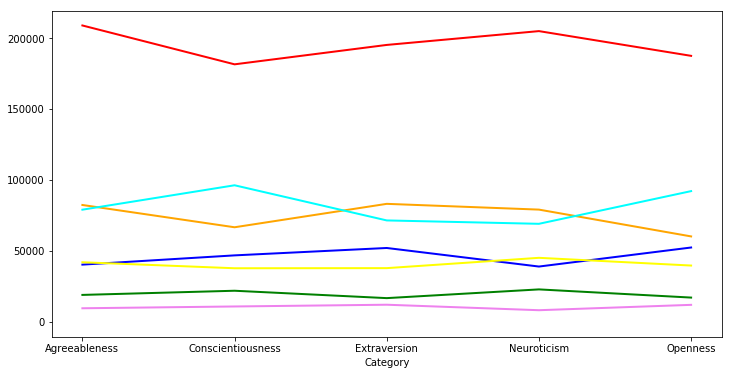

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ImageCategorywhole.Category, ImageCategorywhole.Cyan/2, c='white')
ImageCategorywhole.groupby(ImageCategorywhole.Category).Red.mean().plot(ax=ax,color="red", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Blue.mean().plot(ax=ax,color="Blue", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Green.mean().plot(ax=ax,color="Green", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Yellow.mean().plot(ax=ax,color="Yellow", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Orange.mean().plot(ax=ax,color="Orange", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Violet.mean().plot(ax=ax,color="Violet", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).Cyan.mean().plot(ax=ax,color="Cyan", linewidth=2)

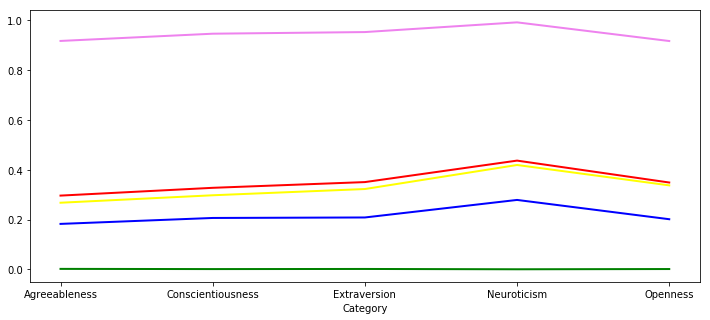

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ImageCategorywhole.Category, ImageCategorywhole.SaturationMean/2, c='white')
ImageCategorywhole.groupby(ImageCategorywhole.Category).SaturationMean.mean().plot(ax=ax,color="Red", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).SaturationStd.mean().plot(ax=ax,color="Blue", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).SaturationMin.mean().plot(ax=ax,color="Green", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).SaturationMedian.mean().plot(ax=ax,color="Yellow", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).SaturationMax.mean().plot(ax=ax,color="violet", linewidth=2)

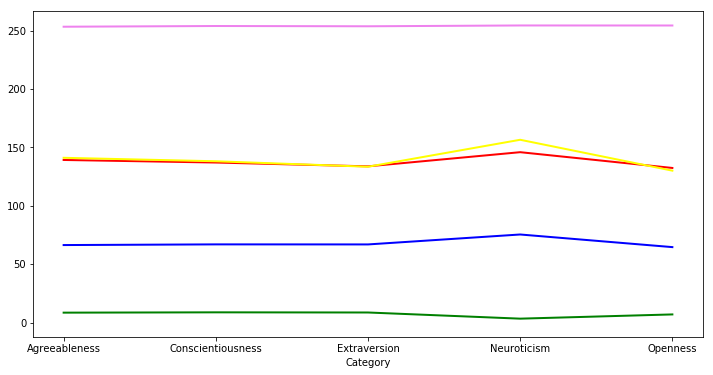

In [70]:
# 'ValueMean', 'ValueStd','ValueMin', 'ValueMedian', 'ValueMax'
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ImageCategorywhole.Category, ImageCategorywhole.ValueMean/2, c='white')
ImageCategorywhole.groupby(ImageCategorywhole.Category).ValueMean.mean().plot(ax=ax,color="Red", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).ValueStd.mean().plot(ax=ax,color="Blue", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).ValueMin.mean().plot(ax=ax,color="Green", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).ValueMedian.mean().plot(ax=ax,color="Yellow", linewidth=2)
ImageCategorywhole.groupby(ImageCategorywhole.Category).ValueMax.mean().plot(ax=ax,color="violet", linewidth=2)

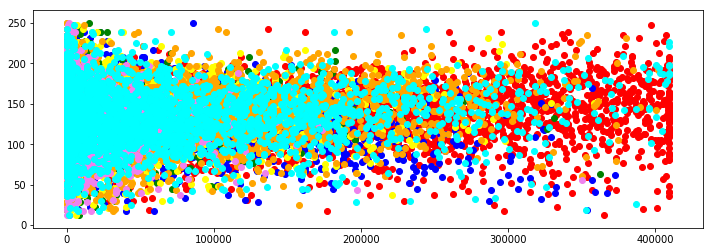

In [71]:
#'Neuroticism','Extraversion','Openness','Agreeableness','Conscientiousness'
Category='Extraversion'
    
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(ImageCategorywhole.Red[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Red')
ax.scatter(ImageCategorywhole.Blue[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Blue')
ax.scatter(ImageCategorywhole.Green[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Green')
ax.scatter(ImageCategorywhole.Yellow[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Yellow')
ax.scatter(ImageCategorywhole.Orange[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Orange')
ax.scatter(ImageCategorywhole.Violet[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Violet')
ax.scatter(ImageCategorywhole.Cyan[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Cyan')
#ax.scatter(ImageCategorywhole.Warm[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Black')
#ax.scatter(ImageCategorywhole.Cold[ImageCategorywhole.Category==Category], ImageCategorywhole.ValueMean[ImageCategorywhole.Category==Category], c='Magenta')


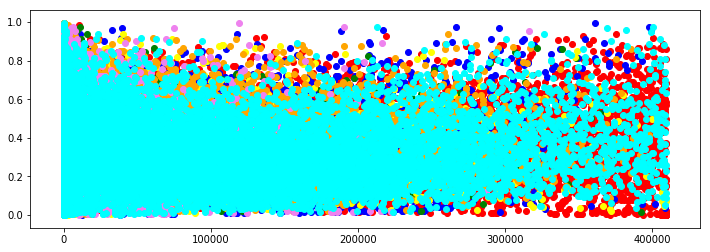

In [72]:
#'Neuroticism','Extraversion','Openness','Agreeableness','Conscientiousness'
Category='Conscientiousness'
    
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(ImageCategorywhole.Red[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Red')
ax.scatter(ImageCategorywhole.Blue[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Blue')
ax.scatter(ImageCategorywhole.Green[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Green')
ax.scatter(ImageCategorywhole.Yellow[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Yellow')
ax.scatter(ImageCategorywhole.Orange[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Orange')
ax.scatter(ImageCategorywhole.Violet[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Violet')
ax.scatter(ImageCategorywhole.Cyan[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Cyan')
#ax.scatter(ImageCategorywhole.Warm[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Black')
#ax.scatter(ImageCategorywhole.Cold[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Magenta')


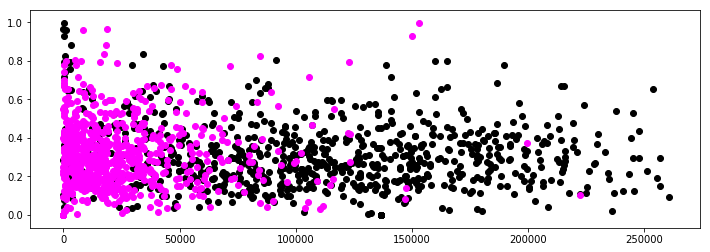

In [73]:
#'Neuroticism','Extraversion','Openness','Agreeableness','Conscientiousness'
Category='Agreeableness'
    
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(ImageCategorywhole.Warm[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Black')
ax.scatter(ImageCategorywhole.Cold[ImageCategorywhole.Category==Category], ImageCategorywhole.SaturationMean[ImageCategorywhole.Category==Category], c='Magenta')


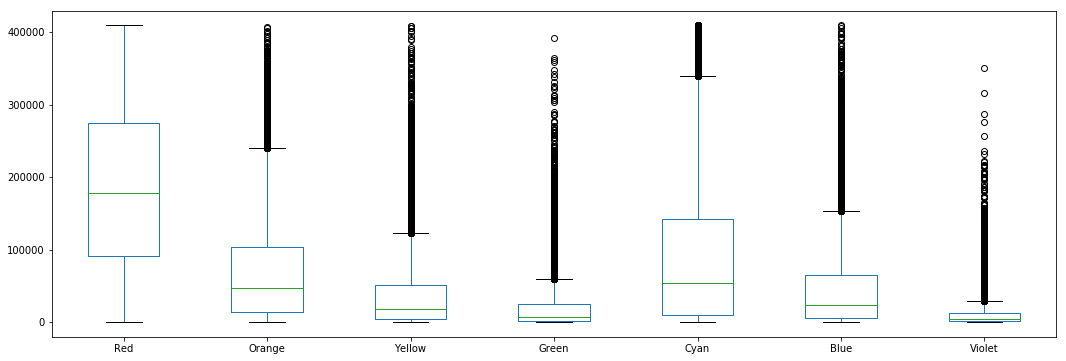

In [74]:
ImageCategorywhole[['Red','Orange', 'Yellow', 'Green', 'Cyan','Blue', 'Violet']].plot(kind="Box", figsize=(18,6), by= 'Category')

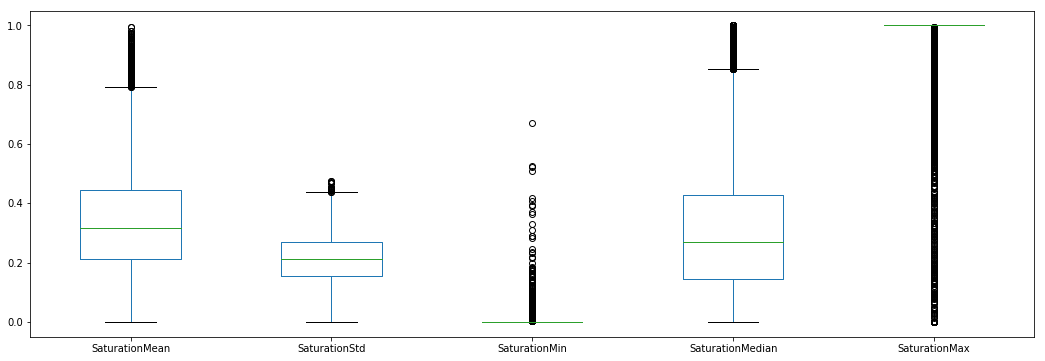

In [75]:
ImageCategory[[ 'SaturationMean', 'SaturationStd', 'SaturationMin','SaturationMedian', 'SaturationMax']].plot(kind="Box", figsize=(18,6))

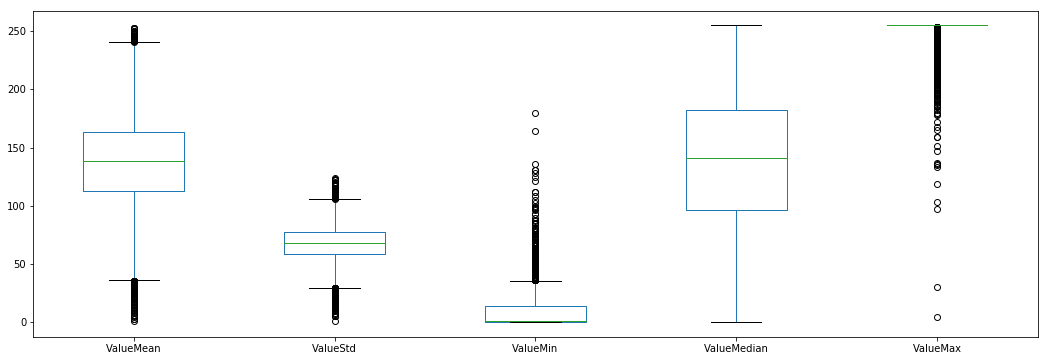

In [76]:
ImageCategory[[ 'ValueMean', 'ValueStd','ValueMin', 'ValueMedian', 'ValueMax']].plot(kind="Box", figsize=(18,6))

In [77]:
Features=['Red','Orange', 'Yellow', 'Green', 'Cyan',
       'Blue', 'Violet', 'SaturationMean', 'SaturationStd', 'SaturationMin',
       'SaturationMedian', 'SaturationMax', 'ValueMean', 'ValueStd',
       'ValueMin', 'ValueMedian', 'ValueMax', 'Faces','Cold','Warm','Pleasure','Arousal','Dominance']
Categories=['Neuroticism', 'Extraversion','Openness', 'Agreeableness', 'Conscientiousness']
corr_mat=ImageCategory.corr()[-5:]
corr_mat=corr_mat[['Red','Orange', 'Yellow', 'Green', 'Cyan',
       'Blue', 'Violet', 'SaturationMean', 'SaturationStd', 'SaturationMin',
       'SaturationMedian', 'SaturationMax', 'ValueMean', 'ValueStd',
       'ValueMin', 'ValueMedian', 'ValueMax', 'Faces','Cold','Warm','Pleasure','Arousal','Dominance']]


In [78]:
Pearsoncorr=[]
Pearsonp=[]

for i in Features :
    for j in Categories :
        Pearsoncorr.append(pearsonr(ImageCategory[i],ImageCategory[j])[0])
        Pearsonp.append(pearsonr(ImageCategory[i],ImageCategory[j])[1])

Pearsoncorr=np.asarray(Pearsoncorr).reshape(23,5)
Pearsonp=np.asarray(Pearsonp).reshape(23,5)

Pearsoncorr=pd.DataFrame(Pearsoncorr, columns=Categories)
Pearsoncorr.index=Features

Pearsonp=pd.DataFrame(Pearsonp, columns=Categories)
Pearsonp.index=Features


In [80]:
#Pearsonp.to_csv("D:\\Instagram\\ImageCategoryPearsonp.csv")
#Pearsoncorr.to_csv("D:\\Instagram\\ImageCategoryPearsoncorr.csv")

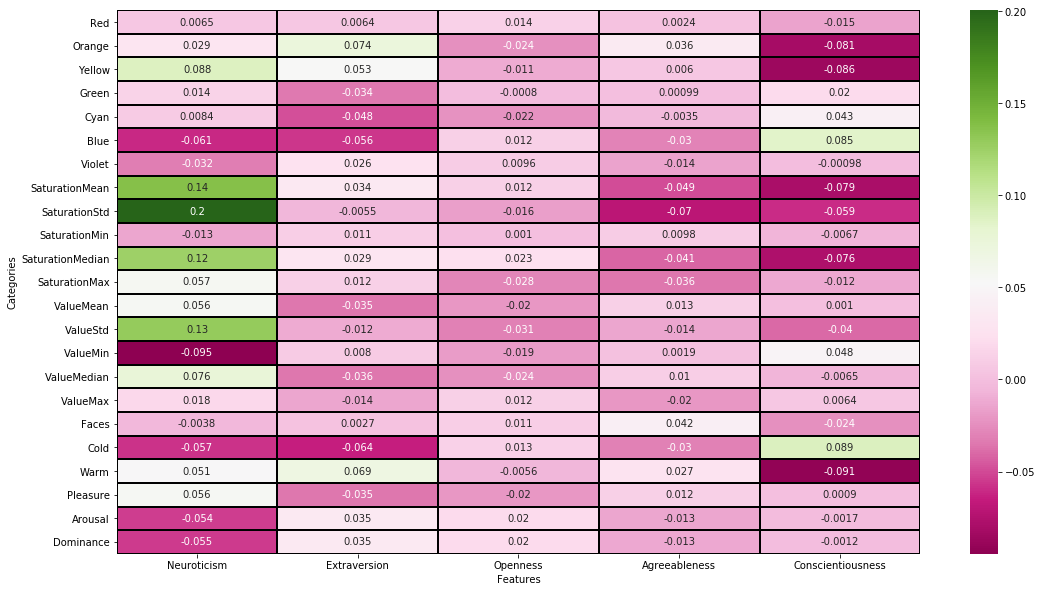

In [52]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(Pearsoncorr, annot=True,cmap="PiYG", linewidths=1, linecolor='black')
plt.ylabel('Categories')
plt.xlabel('Features')
plt.show()

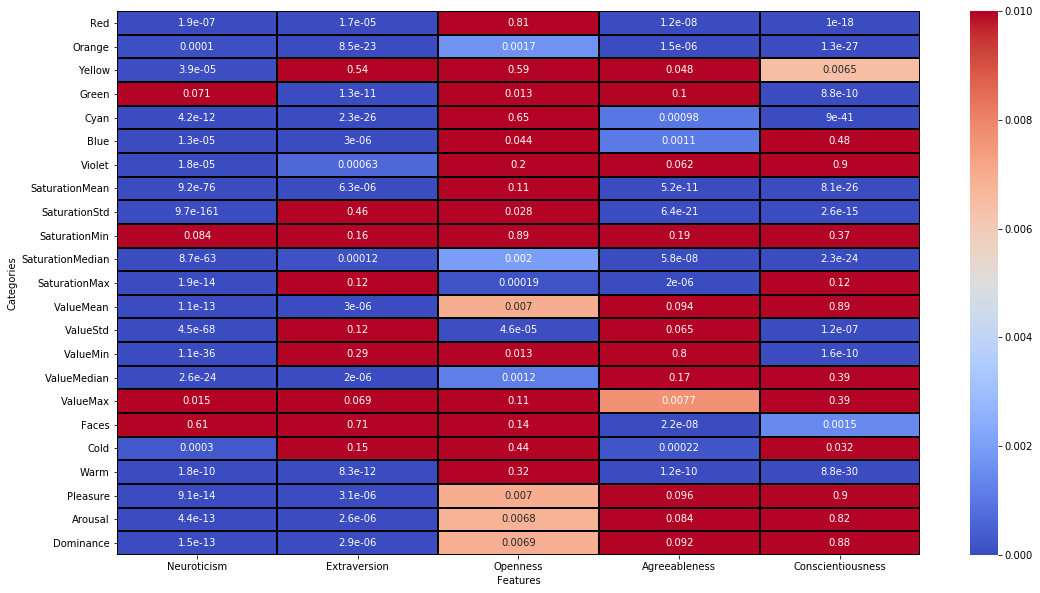

In [79]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(Pearsonp, annot=True,cmap="coolwarm", linewidths=1, vmin=0, vmax=0.01, linecolor='black')
plt.ylabel('Categories')
plt.xlabel('Features')
plt.show()

In [54]:
# Split the data into training/testing sets
ImageCategory_X_train = ImageCategory[:-200]
ImageCategory_X_test = ImageCategory[-200:]

# Split the targets into training/testing sets
ImageCategory_y_train = ImageCategorywhole.Category[:-200]
ImageCategory_y_test = ImageCategorywhole.Category[-200:]

# Create linear regression object
clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)#LogisticRegression()

# Train the model using the training sets
clf.fit(ImageCategory_X_train, ImageCategory_y_train)

print(clf.score(ImageCategory_X_train, ImageCategory_y_train))

# Make predictions using the testing set
ImageCategory_y_pred = clf.predict(ImageCategory_X_test)

#Equation coefficient and Intercept
#predicted= model.predict(x_test)

0.9902250511479882


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


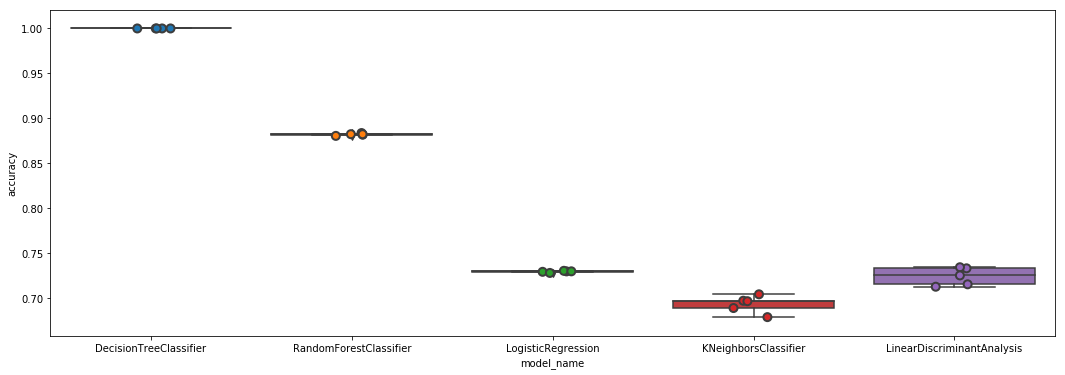

model_name
DecisionTreeClassifier        1.000000
KNeighborsClassifier          0.692998
LinearDiscriminantAnalysis    0.724028
LogisticRegression            0.729313
RandomForestClassifier        0.882075
Name: accuracy, dtype: float64

In [83]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, ImageCategory_X_train, ImageCategory_y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

fig, ax = plt.subplots(figsize=(18,6))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()


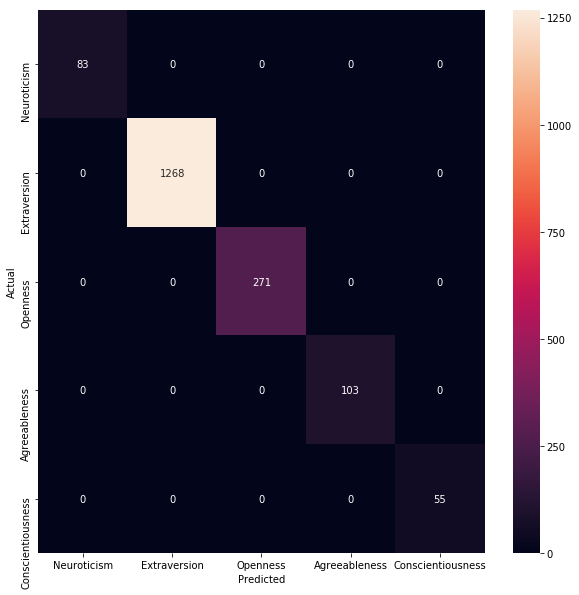

In [81]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(ImageCategory,ImageCategorywhole.Category, test_size=0.10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=Categories, yticklabels=Categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
